<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

In [3]:
y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0,
    1,
    0,
    1,
    1
]

#     [
#         0.1,
#         0.9,
#         0.4,
#         0.6,
#         0.61
#     ]

roc_auc_score(y_true, y_predictions)

0.5833333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
data.isna().mean().max() # нет nan-ов??

0.0

Сделаем кодирование по популярности, ибо категориальных признаков много для OneHot

In [15]:
# # зафиксируем сид для генератора случайных чисел, чтобы всегда добавлять одинаковый шум
# np.random.seed(42)  
# for cat in cat_cols:
#     data[cat] = data[cat].map(data[cat].value_counts()) + 0.1 * np.random.random(len(data))

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

1)

In [8]:
x = data[num_cols[2]]
x[(x == ' ')|(x=='')] = -1
x.astype('float64')
data[num_cols[2]] = x
data[num_cols[2]] = data[num_cols[2]].astype('float64')

C:\Users\anton\AppData\Local\Temp\ipykernel_4912\2525984910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[(x == ' ')|(x=='')] = -1


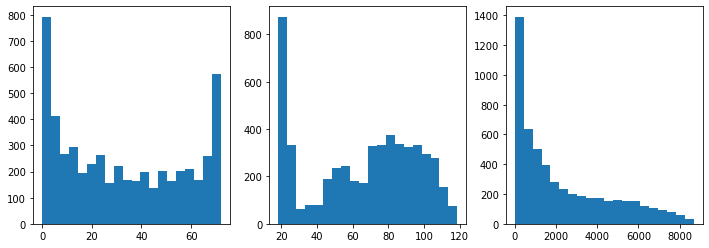

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 4))

for i in range(len(num_cols)):
    x = data.loc[:, num_cols[i]]
    ax[i].hist(x, bins=20)


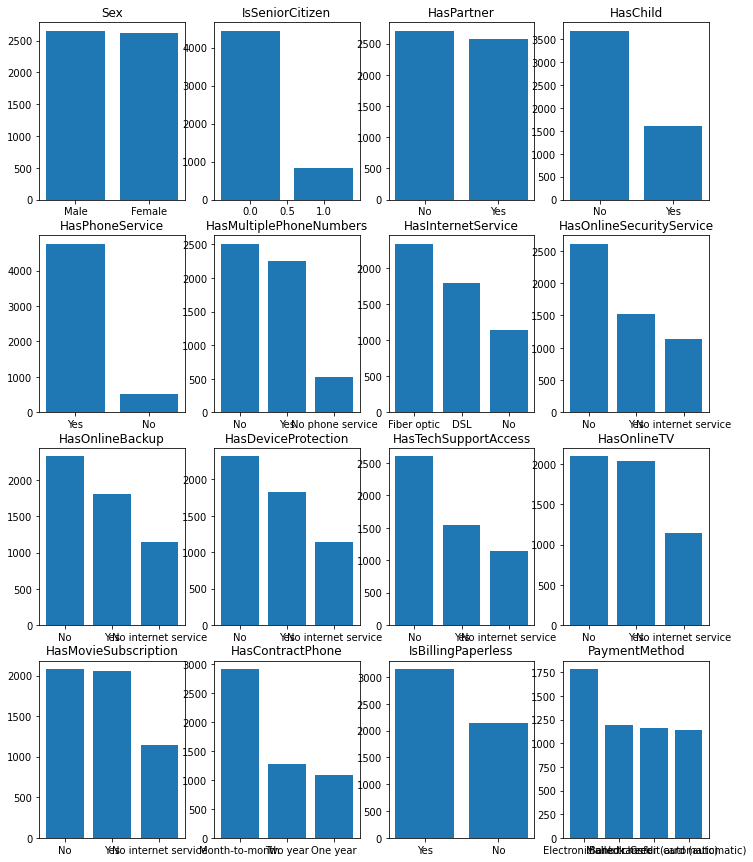

In [23]:
n = len(cat_cols)
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12, 15))

for i in range(4):
    for j in range(4):
        
        x = data.loc[:, cat_cols[4*i + j]]
        x.value_counts()
        ax[i][j].bar(x.value_counts().index, x.value_counts().values)
        ax[i][j].set_title(cat_cols[4*i + j])

2)

<BarContainer object of 2 artists>

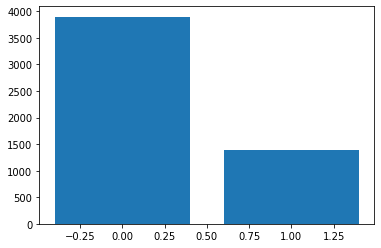

In [24]:
x = data.loc[:, 'Churn']
plt.bar(x.value_counts().index, x.value_counts().values)

In [26]:
x.value_counts().values[0] / x.value_counts().values[1]

2.816473988439306

Классы различаются меньше, чем в 3 раза. 

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [28]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn', axis=1), 
                                                    data['Churn'], 
                                                    train_size = 0.8,
                                                    random_state = 42, 
                                                    shuffle = True, 
                                                    stratify=data['Churn']                                                
                                                   )

In [42]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train_scaled_num = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_test_scaled_num = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols)

In [51]:
enc = OneHotEncoder(drop='if_binary').fit(X_train[cat_cols])
X_train_one_hot = pd.DataFrame(enc.transform(X_train[cat_cols]).toarray())
X_test_one_hot = pd.DataFrame(enc.transform(X_test[cat_cols]).toarray())

In [54]:
X_train_mod = pd.concat([X_train_scaled_num, X_train_one_hot], axis=1)
X_test_mod = pd.concat([X_test_scaled_num, X_test_one_hot], axis=1)

2)

In [78]:
cs = (100, 10, 1, 0.1, 0.01, 0.001)
lr = LogisticRegressionCV(Cs = cs, 
                        scoring='roc_auc', 
                        refit=True,
#                         class_weight='balanced', 
                        random_state=42, 
                        n_jobs=-1)
lr.fit(X_train_mod, y_train)


C:\Users\anton\anaconda3new\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegressionCV(Cs=(100, 10, 1, 0.1, 0.01, 0.001), n_jobs=-1,
                     random_state=42, scoring='roc_auc')

In [79]:
y_train_pred = lr.predict(X_train_mod)
y_test_pred = lr.predict(X_test_mod)

C:\Users\anton\anaconda3new\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\anton\anaconda3new\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [80]:
lr.C_

array([10.])

In [81]:
roc_auc_score(y_true=y_train.values, y_score=lr.predict_proba(X_train_mod)[:, 1])

C:\Users\anton\anaconda3new\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8468999827907193

In [82]:
roc_auc_score(y_true=y_test.values, y_score=lr.predict_proba(X_test_mod)[:, 1])

C:\Users\anton\anaconda3new\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8549569564009996

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучший параметр: С=1 (+ параметр class_weight='balanced')
train roc_auc = 0.8464176014434937
test roc_auc = 0.8545866888827176

Без параметра class_weight='balanced' лучший C=10, 
train roc_auc = 0.8468999827907193
test roc_auc = 0.8549569564009996

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

1)

In [156]:
data = pd.read_csv('./train.csv')

In [157]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data.drop('Churn', axis=1), 
                                                    data['Churn'], 
                                                    train_size = 0.8,
                                                    random_state = 42, 
                                                    shuffle = True, 
                                                    stratify=data['Churn']                                                
                                                   )

In [86]:
! pip install catboost

In [87]:
! pip install ipywidgets
! jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [88]:
from catboost import CatBoostRegressor

In [158]:
model = CatBoostRegressor(cat_features=cat_cols)
model.fit(X_train_b, y_train_b)
y_pred_train_b = model.predict(X_train_b)
y_pred_test_b = model.predict_proba(X_test_b)

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.051411
0:	learn: 0.4343648	total: 45.7ms	remaining: 45.6s
1:	learn: 0.4293702	total: 96.2ms	remaining: 48s
2:	learn: 0.4249294	total: 145ms	remaining: 48.3s
3:	learn: 0.4204681	total: 208ms	remaining: 51.7s
4:	learn: 0.4167361	total: 247ms	remaining: 49.1s
5:	learn: 0.4128771	total: 305ms	remaining: 50.5s
6:	learn: 0.4090293	total: 360ms	remaining: 51.1s
7:	learn: 0.4063728	total: 401ms	remaining: 49.8s
8:	learn: 0.4038567	total: 458ms	remaining: 50.4s
9:	learn: 0.4009323	total: 515ms	remaining: 51s
10:	learn: 0.3980943	total: 564ms	remaining: 50.7s
11:	learn: 0.3953681	total: 610ms	remaining: 50.3s
12:	learn: 0.3930064	total: 680ms	remaining: 51.6s
13:	learn: 0.3909299	total: 721ms	remaining: 50.8s
14:	learn: 0.3888695	total: 764ms	remaining: 50.1s
15:	learn: 0.3872464	total: 813ms	remaining: 50s
16:	learn: 0.3855753	total: 866ms	remaining: 50.1s
17:	learn: 0.3846640	total: 908ms	remaining: 49.5s
18:	learn: 0.3831077	total: 1s	remaining: 51.7s
19:	learn: 0.38165

163:	learn: 0.3505593	total: 9.39s	remaining: 47.9s
164:	learn: 0.3503274	total: 9.44s	remaining: 47.8s
165:	learn: 0.3502479	total: 9.48s	remaining: 47.6s
166:	learn: 0.3502428	total: 9.54s	remaining: 47.6s
167:	learn: 0.3501107	total: 9.6s	remaining: 47.5s
168:	learn: 0.3501064	total: 9.65s	remaining: 47.5s
169:	learn: 0.3499758	total: 9.71s	remaining: 47.4s
170:	learn: 0.3499498	total: 9.76s	remaining: 47.3s
171:	learn: 0.3498529	total: 9.83s	remaining: 47.3s
172:	learn: 0.3495940	total: 9.89s	remaining: 47.3s
173:	learn: 0.3494438	total: 9.94s	remaining: 47.2s
174:	learn: 0.3493091	total: 9.99s	remaining: 47.1s
175:	learn: 0.3491661	total: 10s	remaining: 47s
176:	learn: 0.3490924	total: 10.1s	remaining: 47s
177:	learn: 0.3490636	total: 10.2s	remaining: 46.9s
178:	learn: 0.3489941	total: 10.2s	remaining: 46.9s
179:	learn: 0.3489029	total: 10.3s	remaining: 46.8s
180:	learn: 0.3488265	total: 10.3s	remaining: 46.7s
181:	learn: 0.3486864	total: 10.4s	remaining: 46.6s
182:	learn: 0.34862

325:	learn: 0.3391729	total: 19s	remaining: 39.2s
326:	learn: 0.3391183	total: 19.1s	remaining: 39.2s
327:	learn: 0.3389930	total: 19.1s	remaining: 39.2s
328:	learn: 0.3389703	total: 19.2s	remaining: 39.2s
329:	learn: 0.3389427	total: 19.3s	remaining: 39.2s
330:	learn: 0.3388926	total: 19.4s	remaining: 39.2s
331:	learn: 0.3388001	total: 19.5s	remaining: 39.2s
332:	learn: 0.3387191	total: 19.5s	remaining: 39.1s
333:	learn: 0.3386346	total: 19.6s	remaining: 39.1s
334:	learn: 0.3385966	total: 19.7s	remaining: 39.1s
335:	learn: 0.3385543	total: 19.8s	remaining: 39.1s
336:	learn: 0.3385020	total: 19.8s	remaining: 39s
337:	learn: 0.3384876	total: 19.9s	remaining: 39s
338:	learn: 0.3384526	total: 20s	remaining: 38.9s
339:	learn: 0.3384014	total: 20s	remaining: 38.9s
340:	learn: 0.3383841	total: 20.1s	remaining: 38.8s
341:	learn: 0.3382688	total: 20.2s	remaining: 38.8s
342:	learn: 0.3382555	total: 20.2s	remaining: 38.8s
343:	learn: 0.3381736	total: 20.3s	remaining: 38.7s
344:	learn: 0.3381715	

485:	learn: 0.3293094	total: 28.7s	remaining: 30.3s
486:	learn: 0.3292213	total: 28.7s	remaining: 30.3s
487:	learn: 0.3291351	total: 28.8s	remaining: 30.2s
488:	learn: 0.3290259	total: 28.9s	remaining: 30.2s
489:	learn: 0.3290210	total: 28.9s	remaining: 30.1s
490:	learn: 0.3290089	total: 29s	remaining: 30s
491:	learn: 0.3289859	total: 29s	remaining: 30s
492:	learn: 0.3288024	total: 29.1s	remaining: 29.9s
493:	learn: 0.3287649	total: 29.1s	remaining: 29.9s
494:	learn: 0.3287432	total: 29.2s	remaining: 29.8s
495:	learn: 0.3286388	total: 29.3s	remaining: 29.8s
496:	learn: 0.3285729	total: 29.3s	remaining: 29.7s
497:	learn: 0.3285408	total: 29.4s	remaining: 29.6s
498:	learn: 0.3283600	total: 29.4s	remaining: 29.6s
499:	learn: 0.3283151	total: 29.5s	remaining: 29.5s
500:	learn: 0.3282290	total: 29.6s	remaining: 29.5s
501:	learn: 0.3281527	total: 29.6s	remaining: 29.4s
502:	learn: 0.3281421	total: 29.7s	remaining: 29.3s
503:	learn: 0.3280816	total: 29.8s	remaining: 29.3s
504:	learn: 0.328076

645:	learn: 0.3184752	total: 38.1s	remaining: 20.9s
646:	learn: 0.3183731	total: 38.2s	remaining: 20.8s
647:	learn: 0.3183597	total: 38.3s	remaining: 20.8s
648:	learn: 0.3183107	total: 38.3s	remaining: 20.7s
649:	learn: 0.3181970	total: 38.4s	remaining: 20.7s
650:	learn: 0.3181624	total: 38.4s	remaining: 20.6s
651:	learn: 0.3180694	total: 38.5s	remaining: 20.5s
652:	learn: 0.3180445	total: 38.5s	remaining: 20.5s
653:	learn: 0.3178829	total: 38.6s	remaining: 20.4s
654:	learn: 0.3178251	total: 38.6s	remaining: 20.3s
655:	learn: 0.3177861	total: 38.7s	remaining: 20.3s
656:	learn: 0.3177520	total: 38.8s	remaining: 20.2s
657:	learn: 0.3176657	total: 38.8s	remaining: 20.2s
658:	learn: 0.3175415	total: 38.9s	remaining: 20.1s
659:	learn: 0.3174992	total: 38.9s	remaining: 20.1s
660:	learn: 0.3174655	total: 39s	remaining: 20s
661:	learn: 0.3174426	total: 39.1s	remaining: 19.9s
662:	learn: 0.3174102	total: 39.1s	remaining: 19.9s
663:	learn: 0.3173283	total: 39.2s	remaining: 19.8s
664:	learn: 0.31

805:	learn: 0.3085329	total: 47.4s	remaining: 11.4s
806:	learn: 0.3085142	total: 47.4s	remaining: 11.3s
807:	learn: 0.3085141	total: 47.5s	remaining: 11.3s
808:	learn: 0.3084398	total: 47.5s	remaining: 11.2s
809:	learn: 0.3083294	total: 47.6s	remaining: 11.2s
810:	learn: 0.3082087	total: 47.7s	remaining: 11.1s
811:	learn: 0.3081461	total: 47.7s	remaining: 11.1s
812:	learn: 0.3081033	total: 47.8s	remaining: 11s
813:	learn: 0.3080395	total: 47.8s	remaining: 10.9s
814:	learn: 0.3080168	total: 47.9s	remaining: 10.9s
815:	learn: 0.3079977	total: 48s	remaining: 10.8s
816:	learn: 0.3079800	total: 48s	remaining: 10.8s
817:	learn: 0.3078315	total: 48.1s	remaining: 10.7s
818:	learn: 0.3077883	total: 48.2s	remaining: 10.6s
819:	learn: 0.3077548	total: 48.2s	remaining: 10.6s
820:	learn: 0.3076941	total: 48.3s	remaining: 10.5s
821:	learn: 0.3076228	total: 48.4s	remaining: 10.5s
822:	learn: 0.3075942	total: 48.4s	remaining: 10.4s
823:	learn: 0.3075654	total: 48.4s	remaining: 10.3s
824:	learn: 0.3074

966:	learn: 0.2989363	total: 56.5s	remaining: 1.93s
967:	learn: 0.2989183	total: 56.6s	remaining: 1.87s
968:	learn: 0.2988828	total: 56.6s	remaining: 1.81s
969:	learn: 0.2988484	total: 56.7s	remaining: 1.75s
970:	learn: 0.2988453	total: 56.8s	remaining: 1.69s
971:	learn: 0.2987166	total: 56.8s	remaining: 1.64s
972:	learn: 0.2986471	total: 56.9s	remaining: 1.58s
973:	learn: 0.2985068	total: 56.9s	remaining: 1.52s
974:	learn: 0.2984693	total: 57s	remaining: 1.46s
975:	learn: 0.2984020	total: 57.1s	remaining: 1.4s
976:	learn: 0.2983931	total: 57.1s	remaining: 1.34s
977:	learn: 0.2983315	total: 57.2s	remaining: 1.28s
978:	learn: 0.2982799	total: 57.2s	remaining: 1.23s
979:	learn: 0.2982246	total: 57.3s	remaining: 1.17s
980:	learn: 0.2982202	total: 57.3s	remaining: 1.11s
981:	learn: 0.2982114	total: 57.4s	remaining: 1.05s
982:	learn: 0.2981396	total: 57.4s	remaining: 993ms
983:	learn: 0.2980866	total: 57.5s	remaining: 935ms
984:	learn: 0.2980038	total: 57.5s	remaining: 876ms
985:	learn: 0.2

AttributeError: 'CatBoostRegressor' object has no attribute 'predict_proba'

In [159]:
roc_auc_score(y_test, y_pred_test_b)

0.7442955660464685

2)

In [99]:
roc_aucs = []

for lr in (1e-3, 1e-2, 1e-1, 1):
    
    roc_aucs_cur = []
    
    for depth in (2, 5, 8, 11, 14, 16):
        

        model = CatBoostRegressor(cat_features=cat_cols, 
                                 learning_rate=lr, 
                                 depth = depth
                                 )

        model.fit(X_train_b, y_train_b)
        y_pred_train_b = model.predict(X_train_b)
        y_pred_test_b = model.predict(X_test_b)
        
        ra = roc_auc_score(y_test, y_pred_test_b)
        roc_aucs_cur.append(ra)
        
    roc_aucs.append(roc_aucs_cur)
        

0:	learn: 0.4396517	total: 7.29ms	remaining: 7.29s
1:	learn: 0.4395767	total: 13.3ms	remaining: 6.65s
2:	learn: 0.4394932	total: 21.9ms	remaining: 7.28s
3:	learn: 0.4394015	total: 29.5ms	remaining: 7.35s
4:	learn: 0.4393170	total: 36.2ms	remaining: 7.2s
5:	learn: 0.4392265	total: 42.7ms	remaining: 7.07s
6:	learn: 0.4391355	total: 49.5ms	remaining: 7.03s
7:	learn: 0.4390507	total: 56ms	remaining: 6.95s
8:	learn: 0.4389604	total: 63.6ms	remaining: 7s
9:	learn: 0.4388696	total: 70ms	remaining: 6.93s
10:	learn: 0.4387792	total: 76.3ms	remaining: 6.86s
11:	learn: 0.4386888	total: 83ms	remaining: 6.84s
12:	learn: 0.4386055	total: 89.5ms	remaining: 6.79s
13:	learn: 0.4385340	total: 95.9ms	remaining: 6.76s
14:	learn: 0.4384442	total: 102ms	remaining: 6.72s
15:	learn: 0.4383546	total: 109ms	remaining: 6.69s
16:	learn: 0.4382649	total: 115ms	remaining: 6.66s
17:	learn: 0.4381823	total: 122ms	remaining: 6.63s
18:	learn: 0.4381118	total: 129ms	remaining: 6.67s
19:	learn: 0.4380287	total: 136ms	rem

173:	learn: 0.4264574	total: 1.51s	remaining: 7.18s
174:	learn: 0.4263886	total: 1.52s	remaining: 7.17s
175:	learn: 0.4263190	total: 1.53s	remaining: 7.17s
176:	learn: 0.4262494	total: 1.54s	remaining: 7.16s
177:	learn: 0.4261774	total: 1.55s	remaining: 7.15s
178:	learn: 0.4261075	total: 1.56s	remaining: 7.14s
179:	learn: 0.4260381	total: 1.56s	remaining: 7.13s
180:	learn: 0.4259681	total: 1.58s	remaining: 7.13s
181:	learn: 0.4258986	total: 1.58s	remaining: 7.12s
182:	learn: 0.4258293	total: 1.6s	remaining: 7.13s
183:	learn: 0.4257601	total: 1.6s	remaining: 7.12s
184:	learn: 0.4256917	total: 1.61s	remaining: 7.11s
185:	learn: 0.4256228	total: 1.62s	remaining: 7.11s
186:	learn: 0.4255540	total: 1.63s	remaining: 7.09s
187:	learn: 0.4254860	total: 1.64s	remaining: 7.09s
188:	learn: 0.4254175	total: 1.65s	remaining: 7.07s
189:	learn: 0.4253477	total: 1.66s	remaining: 7.07s
190:	learn: 0.4252792	total: 1.66s	remaining: 7.05s
191:	learn: 0.4252115	total: 1.67s	remaining: 7.04s
192:	learn: 0.

346:	learn: 0.4161427	total: 2.8s	remaining: 5.27s
347:	learn: 0.4160902	total: 2.81s	remaining: 5.26s
348:	learn: 0.4160506	total: 2.81s	remaining: 5.25s
349:	learn: 0.4159974	total: 2.82s	remaining: 5.25s
350:	learn: 0.4159580	total: 2.83s	remaining: 5.23s
351:	learn: 0.4159051	total: 2.84s	remaining: 5.22s
352:	learn: 0.4158518	total: 2.85s	remaining: 5.22s
353:	learn: 0.4158124	total: 2.85s	remaining: 5.21s
354:	learn: 0.4157496	total: 2.86s	remaining: 5.2s
355:	learn: 0.4156977	total: 2.87s	remaining: 5.19s
356:	learn: 0.4156522	total: 2.87s	remaining: 5.18s
357:	learn: 0.4156128	total: 2.88s	remaining: 5.17s
358:	learn: 0.4155607	total: 2.89s	remaining: 5.16s
359:	learn: 0.4155027	total: 2.9s	remaining: 5.15s
360:	learn: 0.4154635	total: 2.91s	remaining: 5.15s
361:	learn: 0.4154117	total: 2.92s	remaining: 5.14s
362:	learn: 0.4153638	total: 2.92s	remaining: 5.13s
363:	learn: 0.4153115	total: 2.94s	remaining: 5.13s
364:	learn: 0.4152557	total: 2.94s	remaining: 5.12s
365:	learn: 0.4

518:	learn: 0.4080977	total: 4.31s	remaining: 4s
519:	learn: 0.4080517	total: 4.32s	remaining: 3.99s
520:	learn: 0.4080110	total: 4.33s	remaining: 3.98s
521:	learn: 0.4079722	total: 4.33s	remaining: 3.97s
522:	learn: 0.4079233	total: 4.34s	remaining: 3.96s
523:	learn: 0.4078818	total: 4.35s	remaining: 3.95s
524:	learn: 0.4078368	total: 4.36s	remaining: 3.94s
525:	learn: 0.4077962	total: 4.36s	remaining: 3.93s
526:	learn: 0.4077540	total: 4.37s	remaining: 3.92s
527:	learn: 0.4077115	total: 4.38s	remaining: 3.91s
528:	learn: 0.4076620	total: 4.39s	remaining: 3.9s
529:	learn: 0.4076127	total: 4.39s	remaining: 3.9s
530:	learn: 0.4075747	total: 4.4s	remaining: 3.89s
531:	learn: 0.4075346	total: 4.41s	remaining: 3.88s
532:	learn: 0.4074899	total: 4.42s	remaining: 3.87s
533:	learn: 0.4074466	total: 4.42s	remaining: 3.86s
534:	learn: 0.4074111	total: 4.43s	remaining: 3.85s
535:	learn: 0.4073814	total: 4.44s	remaining: 3.84s
536:	learn: 0.4073390	total: 4.45s	remaining: 3.83s
537:	learn: 0.4072

681:	learn: 0.4018087	total: 5.59s	remaining: 2.6s
682:	learn: 0.4017768	total: 5.6s	remaining: 2.6s
683:	learn: 0.4017334	total: 5.6s	remaining: 2.59s
684:	learn: 0.4016919	total: 5.61s	remaining: 2.58s
685:	learn: 0.4016594	total: 5.62s	remaining: 2.57s
686:	learn: 0.4016331	total: 5.63s	remaining: 2.56s
687:	learn: 0.4016008	total: 5.64s	remaining: 2.56s
688:	learn: 0.4015649	total: 5.65s	remaining: 2.55s
689:	learn: 0.4015224	total: 5.65s	remaining: 2.54s
690:	learn: 0.4014905	total: 5.66s	remaining: 2.53s
691:	learn: 0.4014539	total: 5.67s	remaining: 2.52s
692:	learn: 0.4014102	total: 5.68s	remaining: 2.51s
693:	learn: 0.4013788	total: 5.68s	remaining: 2.51s
694:	learn: 0.4013418	total: 5.69s	remaining: 2.5s
695:	learn: 0.4013048	total: 5.7s	remaining: 2.49s
696:	learn: 0.4012653	total: 5.71s	remaining: 2.48s
697:	learn: 0.4012326	total: 5.72s	remaining: 2.47s
698:	learn: 0.4011905	total: 5.72s	remaining: 2.46s
699:	learn: 0.4011479	total: 5.73s	remaining: 2.46s
700:	learn: 0.4011

849:	learn: 0.3965063	total: 6.89s	remaining: 1.22s
850:	learn: 0.3964940	total: 6.9s	remaining: 1.21s
851:	learn: 0.3964655	total: 6.9s	remaining: 1.2s
852:	learn: 0.3964466	total: 6.91s	remaining: 1.19s
853:	learn: 0.3964208	total: 6.92s	remaining: 1.18s
854:	learn: 0.3964011	total: 6.92s	remaining: 1.17s
855:	learn: 0.3963737	total: 6.93s	remaining: 1.17s
856:	learn: 0.3963433	total: 6.94s	remaining: 1.16s
857:	learn: 0.3963217	total: 6.94s	remaining: 1.15s
858:	learn: 0.3962919	total: 6.95s	remaining: 1.14s
859:	learn: 0.3962589	total: 6.96s	remaining: 1.13s
860:	learn: 0.3962286	total: 6.96s	remaining: 1.12s
861:	learn: 0.3961972	total: 6.97s	remaining: 1.12s
862:	learn: 0.3961708	total: 6.98s	remaining: 1.11s
863:	learn: 0.3961405	total: 6.99s	remaining: 1.1s
864:	learn: 0.3961104	total: 6.99s	remaining: 1.09s
865:	learn: 0.3960765	total: 7s	remaining: 1.08s
866:	learn: 0.3960459	total: 7s	remaining: 1.07s
867:	learn: 0.3960181	total: 7.01s	remaining: 1.07s
868:	learn: 0.3959869	

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4396271	total: 18.7ms	remaining: 18.7s
1:	learn: 0.4395251	total: 43ms	remaining: 21.4s
2:	learn: 0.4394228	total: 68.1ms	remaining: 22.6s
3:	learn: 0.4393234	total: 101ms	remaining: 25.2s
4:	learn: 0.4392128	total: 127ms	remaining: 25.2s
5:	learn: 0.4391061	total: 151ms	remaining: 24.9s
6:	learn: 0.4389949	total: 175ms	remaining: 24.8s
7:	learn: 0.4388825	total: 205ms	remaining: 25.4s
8:	learn: 0.4387634	total: 231ms	remaining: 25.4s
9:	learn: 0.4386496	total: 265ms	remaining: 26.2s
10:	learn: 0.4385459	total: 290ms	remaining: 26.1s
11:	learn: 0.4384338	total: 313ms	remaining: 25.8s
12:	learn: 0.4383262	total: 337ms	remaining: 25.5s
13:	learn: 0.4382429	total: 360ms	remaining: 25.4s
14:	learn: 0.4381283	total: 380ms	remaining: 24.9s
15:	learn: 0.4380347	total: 400ms	remaining: 24.6s
16:	learn: 0.4379283	total: 423ms	remaining: 24.5s
17:	learn: 0.4378192	total: 448ms	remaining: 24.4s
18:	learn: 0.4377120	total: 471ms	remaining: 24.3s
19:	learn: 0.4376011	total: 500ms	remain

167:	learn: 0.4235455	total: 3.54s	remaining: 17.6s
168:	learn: 0.4234564	total: 3.56s	remaining: 17.5s
169:	learn: 0.4233714	total: 3.58s	remaining: 17.5s
170:	learn: 0.4232894	total: 3.6s	remaining: 17.4s
171:	learn: 0.4231948	total: 3.62s	remaining: 17.4s
172:	learn: 0.4231097	total: 3.63s	remaining: 17.4s
173:	learn: 0.4230301	total: 3.65s	remaining: 17.3s
174:	learn: 0.4229400	total: 3.67s	remaining: 17.3s
175:	learn: 0.4228545	total: 3.69s	remaining: 17.3s
176:	learn: 0.4227629	total: 3.7s	remaining: 17.2s
177:	learn: 0.4226929	total: 3.72s	remaining: 17.2s
178:	learn: 0.4226022	total: 3.74s	remaining: 17.1s
179:	learn: 0.4225142	total: 3.75s	remaining: 17.1s
180:	learn: 0.4224253	total: 3.77s	remaining: 17.1s
181:	learn: 0.4223517	total: 3.79s	remaining: 17s
182:	learn: 0.4222634	total: 3.81s	remaining: 17s
183:	learn: 0.4221750	total: 3.83s	remaining: 17s
184:	learn: 0.4220969	total: 3.84s	remaining: 16.9s
185:	learn: 0.4220254	total: 3.86s	remaining: 16.9s
186:	learn: 0.421943

335:	learn: 0.4108188	total: 6.57s	remaining: 13s
336:	learn: 0.4107559	total: 6.59s	remaining: 13s
337:	learn: 0.4106831	total: 6.61s	remaining: 12.9s
338:	learn: 0.4106156	total: 6.63s	remaining: 12.9s
339:	learn: 0.4105462	total: 6.64s	remaining: 12.9s
340:	learn: 0.4104759	total: 6.66s	remaining: 12.9s
341:	learn: 0.4104070	total: 6.68s	remaining: 12.9s
342:	learn: 0.4103379	total: 6.7s	remaining: 12.8s
343:	learn: 0.4102702	total: 6.71s	remaining: 12.8s
344:	learn: 0.4102041	total: 6.73s	remaining: 12.8s
345:	learn: 0.4101381	total: 6.75s	remaining: 12.8s
346:	learn: 0.4100967	total: 6.76s	remaining: 12.7s
347:	learn: 0.4100472	total: 6.78s	remaining: 12.7s
348:	learn: 0.4099779	total: 6.8s	remaining: 12.7s
349:	learn: 0.4099117	total: 6.82s	remaining: 12.7s
350:	learn: 0.4098394	total: 6.83s	remaining: 12.6s
351:	learn: 0.4097722	total: 6.85s	remaining: 12.6s
352:	learn: 0.4097048	total: 6.87s	remaining: 12.6s
353:	learn: 0.4096537	total: 6.89s	remaining: 12.6s
354:	learn: 0.4095

495:	learn: 0.4014817	total: 9.41s	remaining: 9.56s
496:	learn: 0.4014267	total: 9.43s	remaining: 9.54s
497:	learn: 0.4013745	total: 9.45s	remaining: 9.52s
498:	learn: 0.4013158	total: 9.46s	remaining: 9.5s
499:	learn: 0.4012627	total: 9.48s	remaining: 9.48s
500:	learn: 0.4012181	total: 9.5s	remaining: 9.46s
501:	learn: 0.4011726	total: 9.52s	remaining: 9.44s
502:	learn: 0.4011211	total: 9.54s	remaining: 9.43s
503:	learn: 0.4010684	total: 9.56s	remaining: 9.41s
504:	learn: 0.4010172	total: 9.58s	remaining: 9.39s
505:	learn: 0.4009698	total: 9.6s	remaining: 9.37s
506:	learn: 0.4009158	total: 9.61s	remaining: 9.35s
507:	learn: 0.4008615	total: 9.63s	remaining: 9.33s
508:	learn: 0.4008073	total: 9.65s	remaining: 9.31s
509:	learn: 0.4007517	total: 9.67s	remaining: 9.29s
510:	learn: 0.4007012	total: 9.69s	remaining: 9.27s
511:	learn: 0.4006503	total: 9.7s	remaining: 9.25s
512:	learn: 0.4005975	total: 9.72s	remaining: 9.23s
513:	learn: 0.4005454	total: 9.74s	remaining: 9.21s
514:	learn: 0.40

655:	learn: 0.3941678	total: 12.3s	remaining: 6.42s
656:	learn: 0.3941286	total: 12.3s	remaining: 6.41s
657:	learn: 0.3940884	total: 12.3s	remaining: 6.39s
658:	learn: 0.3940491	total: 12.3s	remaining: 6.37s
659:	learn: 0.3940094	total: 12.3s	remaining: 6.35s
660:	learn: 0.3939679	total: 12.3s	remaining: 6.33s
661:	learn: 0.3939238	total: 12.4s	remaining: 6.31s
662:	learn: 0.3938830	total: 12.4s	remaining: 6.29s
663:	learn: 0.3938401	total: 12.4s	remaining: 6.27s
664:	learn: 0.3937996	total: 12.4s	remaining: 6.25s
665:	learn: 0.3937563	total: 12.4s	remaining: 6.24s
666:	learn: 0.3937183	total: 12.5s	remaining: 6.22s
667:	learn: 0.3936793	total: 12.5s	remaining: 6.2s
668:	learn: 0.3936417	total: 12.5s	remaining: 6.18s
669:	learn: 0.3935984	total: 12.5s	remaining: 6.16s
670:	learn: 0.3935604	total: 12.5s	remaining: 6.14s
671:	learn: 0.3935237	total: 12.5s	remaining: 6.12s
672:	learn: 0.3934811	total: 12.6s	remaining: 6.1s
673:	learn: 0.3934392	total: 12.6s	remaining: 6.08s
674:	learn: 0.

819:	learn: 0.3880019	total: 15.2s	remaining: 3.33s
820:	learn: 0.3879654	total: 15.2s	remaining: 3.31s
821:	learn: 0.3879298	total: 15.2s	remaining: 3.29s
822:	learn: 0.3878943	total: 15.2s	remaining: 3.27s
823:	learn: 0.3878562	total: 15.2s	remaining: 3.26s
824:	learn: 0.3878236	total: 15.3s	remaining: 3.24s
825:	learn: 0.3877858	total: 15.3s	remaining: 3.22s
826:	learn: 0.3877520	total: 15.3s	remaining: 3.2s
827:	learn: 0.3877187	total: 15.3s	remaining: 3.18s
828:	learn: 0.3876857	total: 15.3s	remaining: 3.16s
829:	learn: 0.3876505	total: 15.4s	remaining: 3.14s
830:	learn: 0.3876175	total: 15.4s	remaining: 3.13s
831:	learn: 0.3875827	total: 15.4s	remaining: 3.11s
832:	learn: 0.3875525	total: 15.4s	remaining: 3.09s
833:	learn: 0.3875176	total: 15.4s	remaining: 3.07s
834:	learn: 0.3874901	total: 15.4s	remaining: 3.05s
835:	learn: 0.3874566	total: 15.5s	remaining: 3.03s
836:	learn: 0.3874233	total: 15.5s	remaining: 3.01s
837:	learn: 0.3873888	total: 15.5s	remaining: 3s
838:	learn: 0.38

988:	learn: 0.3830335	total: 18.3s	remaining: 204ms
989:	learn: 0.3830059	total: 18.3s	remaining: 185ms
990:	learn: 0.3829855	total: 18.3s	remaining: 167ms
991:	learn: 0.3829557	total: 18.4s	remaining: 148ms
992:	learn: 0.3829256	total: 18.4s	remaining: 130ms
993:	learn: 0.3828984	total: 18.4s	remaining: 111ms
994:	learn: 0.3828711	total: 18.4s	remaining: 92.6ms
995:	learn: 0.3828409	total: 18.5s	remaining: 74.1ms
996:	learn: 0.3828199	total: 18.5s	remaining: 55.6ms
997:	learn: 0.3827912	total: 18.5s	remaining: 37.1ms
998:	learn: 0.3827641	total: 18.5s	remaining: 18.5ms
999:	learn: 0.3827359	total: 18.5s	remaining: 0us
0:	learn: 0.4396069	total: 33.8ms	remaining: 33.8s


C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


1:	learn: 0.4394853	total: 72.4ms	remaining: 36.1s
2:	learn: 0.4393695	total: 105ms	remaining: 34.9s
3:	learn: 0.4392555	total: 144ms	remaining: 35.9s
4:	learn: 0.4391693	total: 162ms	remaining: 32.1s
5:	learn: 0.4390638	total: 186ms	remaining: 30.8s
6:	learn: 0.4389617	total: 203ms	remaining: 28.7s
7:	learn: 0.4388547	total: 240ms	remaining: 29.8s
8:	learn: 0.4387316	total: 283ms	remaining: 31.2s
9:	learn: 0.4386168	total: 308ms	remaining: 30.4s
10:	learn: 0.4384955	total: 352ms	remaining: 31.7s
11:	learn: 0.4383779	total: 387ms	remaining: 31.8s
12:	learn: 0.4382591	total: 420ms	remaining: 31.9s
13:	learn: 0.4381448	total: 446ms	remaining: 31.4s
14:	learn: 0.4380261	total: 470ms	remaining: 30.9s
15:	learn: 0.4379086	total: 510ms	remaining: 31.3s
16:	learn: 0.4377959	total: 536ms	remaining: 31s
17:	learn: 0.4376736	total: 576ms	remaining: 31.4s
18:	learn: 0.4375534	total: 619ms	remaining: 31.9s
19:	learn: 0.4374441	total: 659ms	remaining: 32.3s
20:	learn: 0.4373341	total: 680ms	remaini

164:	learn: 0.4225055	total: 6.83s	remaining: 34.6s
165:	learn: 0.4224105	total: 6.89s	remaining: 34.6s
166:	learn: 0.4223099	total: 6.95s	remaining: 34.7s
167:	learn: 0.4222163	total: 7.02s	remaining: 34.7s
168:	learn: 0.4221152	total: 7.08s	remaining: 34.8s
169:	learn: 0.4220207	total: 7.14s	remaining: 34.8s
170:	learn: 0.4219274	total: 7.2s	remaining: 34.9s
171:	learn: 0.4218310	total: 7.25s	remaining: 34.9s
172:	learn: 0.4217356	total: 7.3s	remaining: 34.9s
173:	learn: 0.4216449	total: 7.34s	remaining: 34.8s
174:	learn: 0.4215505	total: 7.38s	remaining: 34.8s
175:	learn: 0.4214530	total: 7.43s	remaining: 34.8s
176:	learn: 0.4213657	total: 7.45s	remaining: 34.6s
177:	learn: 0.4212730	total: 7.49s	remaining: 34.6s
178:	learn: 0.4211766	total: 7.54s	remaining: 34.6s
179:	learn: 0.4210935	total: 7.56s	remaining: 34.4s
180:	learn: 0.4210062	total: 7.58s	remaining: 34.3s
181:	learn: 0.4209135	total: 7.62s	remaining: 34.3s
182:	learn: 0.4208277	total: 7.66s	remaining: 34.2s
183:	learn: 0.

323:	learn: 0.4091679	total: 13.2s	remaining: 27.5s
324:	learn: 0.4090959	total: 13.2s	remaining: 27.4s
325:	learn: 0.4090425	total: 13.2s	remaining: 27.3s
326:	learn: 0.4089665	total: 13.3s	remaining: 27.3s
327:	learn: 0.4088902	total: 13.3s	remaining: 27.2s
328:	learn: 0.4088245	total: 13.3s	remaining: 27.2s
329:	learn: 0.4087533	total: 13.3s	remaining: 27.1s
330:	learn: 0.4086970	total: 13.4s	remaining: 27s
331:	learn: 0.4086188	total: 13.4s	remaining: 27s
332:	learn: 0.4085453	total: 13.5s	remaining: 27s
333:	learn: 0.4084668	total: 13.5s	remaining: 26.9s
334:	learn: 0.4084003	total: 13.5s	remaining: 26.9s
335:	learn: 0.4083289	total: 13.6s	remaining: 26.8s
336:	learn: 0.4082552	total: 13.6s	remaining: 26.8s
337:	learn: 0.4081777	total: 13.7s	remaining: 26.8s
338:	learn: 0.4081011	total: 13.7s	remaining: 26.8s
339:	learn: 0.4080267	total: 13.8s	remaining: 26.7s
340:	learn: 0.4079568	total: 13.8s	remaining: 26.7s
341:	learn: 0.4078818	total: 13.9s	remaining: 26.7s
342:	learn: 0.4078

485:	learn: 0.3985646	total: 19.9s	remaining: 21.1s
486:	learn: 0.3985031	total: 19.9s	remaining: 21s
487:	learn: 0.3984441	total: 20s	remaining: 21s
488:	learn: 0.3983806	total: 20s	remaining: 20.9s
489:	learn: 0.3983186	total: 20.1s	remaining: 20.9s
490:	learn: 0.3982567	total: 20.1s	remaining: 20.9s
491:	learn: 0.3982023	total: 20.2s	remaining: 20.8s
492:	learn: 0.3981444	total: 20.2s	remaining: 20.8s
493:	learn: 0.3980859	total: 20.3s	remaining: 20.7s
494:	learn: 0.3980476	total: 20.3s	remaining: 20.7s
495:	learn: 0.3979793	total: 20.3s	remaining: 20.6s
496:	learn: 0.3979218	total: 20.3s	remaining: 20.6s
497:	learn: 0.3978723	total: 20.4s	remaining: 20.5s
498:	learn: 0.3978193	total: 20.4s	remaining: 20.5s
499:	learn: 0.3977572	total: 20.5s	remaining: 20.5s
500:	learn: 0.3977010	total: 20.5s	remaining: 20.4s
501:	learn: 0.3976465	total: 20.5s	remaining: 20.4s
502:	learn: 0.3975849	total: 20.6s	remaining: 20.3s
503:	learn: 0.3975301	total: 20.6s	remaining: 20.3s
504:	learn: 0.397491

648:	learn: 0.3901835	total: 26.7s	remaining: 14.4s
649:	learn: 0.3901393	total: 26.8s	remaining: 14.4s
650:	learn: 0.3900963	total: 26.8s	remaining: 14.4s
651:	learn: 0.3900684	total: 26.8s	remaining: 14.3s
652:	learn: 0.3900206	total: 26.9s	remaining: 14.3s
653:	learn: 0.3899704	total: 26.9s	remaining: 14.2s
654:	learn: 0.3899206	total: 27s	remaining: 14.2s
655:	learn: 0.3898771	total: 27s	remaining: 14.2s
656:	learn: 0.3898343	total: 27.1s	remaining: 14.1s
657:	learn: 0.3897926	total: 27.1s	remaining: 14.1s
658:	learn: 0.3897439	total: 27.2s	remaining: 14.1s
659:	learn: 0.3896989	total: 27.2s	remaining: 14s
660:	learn: 0.3896517	total: 27.3s	remaining: 14s
661:	learn: 0.3896087	total: 27.3s	remaining: 13.9s
662:	learn: 0.3895709	total: 27.3s	remaining: 13.9s
663:	learn: 0.3895274	total: 27.3s	remaining: 13.8s
664:	learn: 0.3894830	total: 27.4s	remaining: 13.8s
665:	learn: 0.3894319	total: 27.5s	remaining: 13.8s
666:	learn: 0.3893894	total: 27.6s	remaining: 13.8s
667:	learn: 0.389346

807:	learn: 0.3838031	total: 37.8s	remaining: 8.97s
808:	learn: 0.3837612	total: 37.9s	remaining: 8.94s
809:	learn: 0.3837317	total: 37.9s	remaining: 8.89s
810:	learn: 0.3836995	total: 38s	remaining: 8.87s
811:	learn: 0.3836574	total: 38.1s	remaining: 8.83s
812:	learn: 0.3836239	total: 38.2s	remaining: 8.79s
813:	learn: 0.3835818	total: 38.3s	remaining: 8.75s
814:	learn: 0.3835501	total: 38.3s	remaining: 8.7s
815:	learn: 0.3835093	total: 38.4s	remaining: 8.66s
816:	learn: 0.3834801	total: 38.4s	remaining: 8.61s
817:	learn: 0.3834576	total: 38.5s	remaining: 8.56s
818:	learn: 0.3834134	total: 38.5s	remaining: 8.52s
819:	learn: 0.3833856	total: 38.6s	remaining: 8.47s
820:	learn: 0.3833529	total: 38.6s	remaining: 8.42s
821:	learn: 0.3833081	total: 38.7s	remaining: 8.37s
822:	learn: 0.3832763	total: 38.7s	remaining: 8.32s
823:	learn: 0.3832377	total: 38.8s	remaining: 8.28s
824:	learn: 0.3831982	total: 38.8s	remaining: 8.24s
825:	learn: 0.3831619	total: 38.9s	remaining: 8.2s
826:	learn: 0.38

970:	learn: 0.3785098	total: 47.2s	remaining: 1.41s
971:	learn: 0.3784862	total: 47.2s	remaining: 1.36s
972:	learn: 0.3784480	total: 47.2s	remaining: 1.31s
973:	learn: 0.3784103	total: 47.3s	remaining: 1.26s
974:	learn: 0.3783807	total: 47.3s	remaining: 1.21s
975:	learn: 0.3783524	total: 47.4s	remaining: 1.17s
976:	learn: 0.3783259	total: 47.4s	remaining: 1.12s
977:	learn: 0.3782918	total: 47.5s	remaining: 1.07s
978:	learn: 0.3782621	total: 47.5s	remaining: 1.02s
979:	learn: 0.3782371	total: 47.5s	remaining: 970ms
980:	learn: 0.3782033	total: 47.6s	remaining: 922ms
981:	learn: 0.3781744	total: 47.6s	remaining: 873ms
982:	learn: 0.3781479	total: 47.7s	remaining: 824ms
983:	learn: 0.3781128	total: 47.7s	remaining: 776ms
984:	learn: 0.3780826	total: 47.8s	remaining: 727ms
985:	learn: 0.3780496	total: 47.8s	remaining: 679ms
986:	learn: 0.3780233	total: 47.9s	remaining: 630ms
987:	learn: 0.3779950	total: 47.9s	remaining: 582ms
988:	learn: 0.3779746	total: 47.9s	remaining: 533ms
989:	learn: 

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4396005	total: 133ms	remaining: 2m 13s
1:	learn: 0.4394955	total: 170ms	remaining: 1m 24s
2:	learn: 0.4393839	total: 215ms	remaining: 1m 11s
3:	learn: 0.4392731	total: 250ms	remaining: 1m 2s
4:	learn: 0.4391485	total: 396ms	remaining: 1m 18s
5:	learn: 0.4390206	total: 531ms	remaining: 1m 27s
6:	learn: 0.4389052	total: 652ms	remaining: 1m 32s
7:	learn: 0.4387784	total: 768ms	remaining: 1m 35s
8:	learn: 0.4386631	total: 838ms	remaining: 1m 32s
9:	learn: 0.4385519	total: 876ms	remaining: 1m 26s
10:	learn: 0.4384329	total: 1.08s	remaining: 1m 37s
11:	learn: 0.4383232	total: 1.16s	remaining: 1m 35s
12:	learn: 0.4382126	total: 1.27s	remaining: 1m 36s
13:	learn: 0.4380937	total: 1.37s	remaining: 1m 36s
14:	learn: 0.4379724	total: 1.59s	remaining: 1m 44s
15:	learn: 0.4378451	total: 1.76s	remaining: 1m 48s
16:	learn: 0.4377280	total: 1.82s	remaining: 1m 45s
17:	learn: 0.4376143	total: 1.91s	remaining: 1m 44s
18:	learn: 0.4374945	total: 2.06s	remaining: 1m 46s
19:	learn: 0.4373774	to

159:	learn: 0.4227606	total: 13.7s	remaining: 1m 12s
160:	learn: 0.4226580	total: 13.9s	remaining: 1m 12s
161:	learn: 0.4225558	total: 14s	remaining: 1m 12s
162:	learn: 0.4224608	total: 14s	remaining: 1m 11s
163:	learn: 0.4223566	total: 14.1s	remaining: 1m 12s
164:	learn: 0.4222865	total: 14.1s	remaining: 1m 11s
165:	learn: 0.4221928	total: 14.3s	remaining: 1m 11s
166:	learn: 0.4220889	total: 14.4s	remaining: 1m 11s
167:	learn: 0.4220189	total: 14.4s	remaining: 1m 11s
168:	learn: 0.4219361	total: 14.4s	remaining: 1m 10s
169:	learn: 0.4218435	total: 14.4s	remaining: 1m 10s
170:	learn: 0.4217443	total: 14.6s	remaining: 1m 10s
171:	learn: 0.4216481	total: 14.6s	remaining: 1m 10s
172:	learn: 0.4215512	total: 14.6s	remaining: 1m 9s
173:	learn: 0.4214754	total: 14.7s	remaining: 1m 9s
174:	learn: 0.4213787	total: 14.8s	remaining: 1m 9s
175:	learn: 0.4212791	total: 14.9s	remaining: 1m 9s
176:	learn: 0.4211938	total: 14.9s	remaining: 1m 9s
177:	learn: 0.4210977	total: 15s	remaining: 1m 9s
178:	

318:	learn: 0.4090303	total: 29.2s	remaining: 1m 2s
319:	learn: 0.4089369	total: 29.3s	remaining: 1m 2s
320:	learn: 0.4088572	total: 29.4s	remaining: 1m 2s
321:	learn: 0.4087864	total: 29.4s	remaining: 1m 1s
322:	learn: 0.4086961	total: 29.6s	remaining: 1m 2s
323:	learn: 0.4086082	total: 29.8s	remaining: 1m 2s
324:	learn: 0.4085362	total: 29.8s	remaining: 1m 1s
325:	learn: 0.4084524	total: 29.9s	remaining: 1m 1s
326:	learn: 0.4083707	total: 30s	remaining: 1m 1s
327:	learn: 0.4082803	total: 30.2s	remaining: 1m 1s
328:	learn: 0.4081906	total: 30.3s	remaining: 1m 1s
329:	learn: 0.4080984	total: 30.4s	remaining: 1m 1s
330:	learn: 0.4080296	total: 30.5s	remaining: 1m 1s
331:	learn: 0.4079610	total: 30.6s	remaining: 1m 1s
332:	learn: 0.4078936	total: 30.6s	remaining: 1m 1s
333:	learn: 0.4078268	total: 30.7s	remaining: 1m 1s
334:	learn: 0.4077447	total: 30.8s	remaining: 1m 1s
335:	learn: 0.4076756	total: 30.9s	remaining: 1m
336:	learn: 0.4075836	total: 31s	remaining: 1m
337:	learn: 0.4075109	

478:	learn: 0.3977690	total: 45.1s	remaining: 49.1s
479:	learn: 0.3977060	total: 45.3s	remaining: 49.1s
480:	learn: 0.3976390	total: 45.4s	remaining: 49s
481:	learn: 0.3975691	total: 45.6s	remaining: 49.1s
482:	learn: 0.3975093	total: 45.8s	remaining: 49.1s
483:	learn: 0.3974336	total: 46s	remaining: 49.1s
484:	learn: 0.3973646	total: 46.2s	remaining: 49s
485:	learn: 0.3972934	total: 46.3s	remaining: 49s
486:	learn: 0.3972289	total: 46.4s	remaining: 48.9s
487:	learn: 0.3971799	total: 46.5s	remaining: 48.8s
488:	learn: 0.3971239	total: 46.5s	remaining: 48.6s
489:	learn: 0.3970575	total: 46.7s	remaining: 48.6s
490:	learn: 0.3970005	total: 46.8s	remaining: 48.5s
491:	learn: 0.3969434	total: 46.8s	remaining: 48.4s
492:	learn: 0.3968850	total: 46.9s	remaining: 48.2s
493:	learn: 0.3968284	total: 46.9s	remaining: 48.1s
494:	learn: 0.3967491	total: 47.1s	remaining: 48s
495:	learn: 0.3966921	total: 47.1s	remaining: 47.9s
496:	learn: 0.3966530	total: 47.1s	remaining: 47.7s
497:	learn: 0.3966115	

638:	learn: 0.3885854	total: 1m	remaining: 34.4s
639:	learn: 0.3885472	total: 1m	remaining: 34.3s
640:	learn: 0.3885058	total: 1m	remaining: 34.1s
641:	learn: 0.3884535	total: 1m 1s	remaining: 34.1s
642:	learn: 0.3883878	total: 1m 1s	remaining: 34s
643:	learn: 0.3883548	total: 1m 1s	remaining: 33.9s
644:	learn: 0.3882921	total: 1m 1s	remaining: 33.8s
645:	learn: 0.3882369	total: 1m 1s	remaining: 33.7s
646:	learn: 0.3881795	total: 1m 1s	remaining: 33.7s
647:	learn: 0.3881200	total: 1m 1s	remaining: 33.6s
648:	learn: 0.3880771	total: 1m 1s	remaining: 33.5s
649:	learn: 0.3880363	total: 1m 1s	remaining: 33.4s
650:	learn: 0.3879775	total: 1m 2s	remaining: 33.3s
651:	learn: 0.3879263	total: 1m 2s	remaining: 33.2s
652:	learn: 0.3878726	total: 1m 2s	remaining: 33.1s
653:	learn: 0.3878159	total: 1m 2s	remaining: 33.1s
654:	learn: 0.3877527	total: 1m 2s	remaining: 33s
655:	learn: 0.3877259	total: 1m 2s	remaining: 32.8s
656:	learn: 0.3876673	total: 1m 2s	remaining: 32.8s
657:	learn: 0.3876272	tot

796:	learn: 0.3810977	total: 1m 18s	remaining: 20.1s
797:	learn: 0.3810622	total: 1m 18s	remaining: 20s
798:	learn: 0.3810122	total: 1m 19s	remaining: 19.9s
799:	learn: 0.3809731	total: 1m 19s	remaining: 19.8s
800:	learn: 0.3809474	total: 1m 19s	remaining: 19.7s
801:	learn: 0.3808907	total: 1m 19s	remaining: 19.6s
802:	learn: 0.3808346	total: 1m 19s	remaining: 19.5s
803:	learn: 0.3808123	total: 1m 19s	remaining: 19.4s
804:	learn: 0.3807618	total: 1m 19s	remaining: 19.3s
805:	learn: 0.3807161	total: 1m 19s	remaining: 19.2s
806:	learn: 0.3806866	total: 1m 19s	remaining: 19.1s
807:	learn: 0.3806566	total: 1m 19s	remaining: 19s
808:	learn: 0.3806115	total: 1m 20s	remaining: 18.9s
809:	learn: 0.3805723	total: 1m 20s	remaining: 18.8s
810:	learn: 0.3805453	total: 1m 20s	remaining: 18.7s
811:	learn: 0.3805101	total: 1m 20s	remaining: 18.6s
812:	learn: 0.3804614	total: 1m 20s	remaining: 18.5s
813:	learn: 0.3804188	total: 1m 20s	remaining: 18.4s
814:	learn: 0.3803653	total: 1m 20s	remaining: 18.

954:	learn: 0.3746547	total: 1m 34s	remaining: 4.43s
955:	learn: 0.3746356	total: 1m 34s	remaining: 4.33s
956:	learn: 0.3745874	total: 1m 34s	remaining: 4.23s
957:	learn: 0.3745424	total: 1m 34s	remaining: 4.14s
958:	learn: 0.3744931	total: 1m 34s	remaining: 4.04s
959:	learn: 0.3744634	total: 1m 34s	remaining: 3.94s
960:	learn: 0.3744251	total: 1m 34s	remaining: 3.84s
961:	learn: 0.3743791	total: 1m 34s	remaining: 3.75s
962:	learn: 0.3743248	total: 1m 35s	remaining: 3.65s
963:	learn: 0.3742684	total: 1m 35s	remaining: 3.56s
964:	learn: 0.3742399	total: 1m 35s	remaining: 3.46s
965:	learn: 0.3742042	total: 1m 35s	remaining: 3.36s
966:	learn: 0.3741718	total: 1m 35s	remaining: 3.26s
967:	learn: 0.3741496	total: 1m 35s	remaining: 3.16s
968:	learn: 0.3741038	total: 1m 35s	remaining: 3.06s
969:	learn: 0.3740646	total: 1m 35s	remaining: 2.96s
970:	learn: 0.3740145	total: 1m 36s	remaining: 2.87s
971:	learn: 0.3739880	total: 1m 36s	remaining: 2.77s
972:	learn: 0.3739531	total: 1m 36s	remaining:

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4395990	total: 1.05s	remaining: 17m 33s
1:	learn: 0.4394708	total: 2.36s	remaining: 19m 36s
2:	learn: 0.4393912	total: 2.41s	remaining: 13m 19s
3:	learn: 0.4392861	total: 2.56s	remaining: 10m 36s
4:	learn: 0.4391630	total: 2.63s	remaining: 8m 42s
5:	learn: 0.4390431	total: 3.81s	remaining: 10m 31s
6:	learn: 0.4389177	total: 5s	remaining: 11m 50s
7:	learn: 0.4387995	total: 5.09s	remaining: 10m 31s
8:	learn: 0.4386738	total: 6.2s	remaining: 11m 22s
9:	learn: 0.4385459	total: 7.5s	remaining: 12m 23s
10:	learn: 0.4384343	total: 7.58s	remaining: 11m 22s
11:	learn: 0.4383102	total: 8.15s	remaining: 11m 11s
12:	learn: 0.4381965	total: 8.21s	remaining: 10m 23s
13:	learn: 0.4380687	total: 9.44s	remaining: 11m 4s
14:	learn: 0.4379567	total: 9.52s	remaining: 10m 25s
15:	learn: 0.4378307	total: 10.7s	remaining: 10m 55s
16:	learn: 0.4377250	total: 10.7s	remaining: 10m 18s
17:	learn: 0.4376082	total: 10.7s	remaining: 9m 45s
18:	learn: 0.4374895	total: 10.9s	remaining: 9m 23s
19:	learn: 0

159:	learn: 0.4220108	total: 1m 25s	remaining: 7m 29s
160:	learn: 0.4219079	total: 1m 25s	remaining: 7m 26s
161:	learn: 0.4218080	total: 1m 25s	remaining: 7m 23s
162:	learn: 0.4217169	total: 1m 25s	remaining: 7m 20s
163:	learn: 0.4216101	total: 1m 27s	remaining: 7m 25s
164:	learn: 0.4215480	total: 1m 27s	remaining: 7m 22s
165:	learn: 0.4214569	total: 1m 27s	remaining: 7m 19s
166:	learn: 0.4213730	total: 1m 27s	remaining: 7m 16s
167:	learn: 0.4212869	total: 1m 27s	remaining: 7m 13s
168:	learn: 0.4211827	total: 1m 28s	remaining: 7m 17s
169:	learn: 0.4210716	total: 1m 30s	remaining: 7m 20s
170:	learn: 0.4209657	total: 1m 31s	remaining: 7m 23s
171:	learn: 0.4208745	total: 1m 33s	remaining: 7m 27s
172:	learn: 0.4207683	total: 1m 34s	remaining: 7m 30s
173:	learn: 0.4206571	total: 1m 35s	remaining: 7m 32s
174:	learn: 0.4205500	total: 1m 35s	remaining: 7m 31s
175:	learn: 0.4204505	total: 1m 35s	remaining: 7m 29s
176:	learn: 0.4203569	total: 1m 35s	remaining: 7m 26s
177:	learn: 0.4202654	total:

312:	learn: 0.4081292	total: 2m 52s	remaining: 6m 19s
313:	learn: 0.4080545	total: 2m 52s	remaining: 6m 17s
314:	learn: 0.4079973	total: 2m 52s	remaining: 6m 15s
315:	learn: 0.4079172	total: 2m 52s	remaining: 6m 14s
316:	learn: 0.4078522	total: 2m 52s	remaining: 6m 12s
317:	learn: 0.4077939	total: 2m 52s	remaining: 6m 10s
318:	learn: 0.4076956	total: 2m 54s	remaining: 6m 11s
319:	learn: 0.4075983	total: 2m 55s	remaining: 6m 12s
320:	learn: 0.4075202	total: 2m 55s	remaining: 6m 10s
321:	learn: 0.4074523	total: 2m 55s	remaining: 6m 8s
322:	learn: 0.4073743	total: 2m 55s	remaining: 6m 7s
323:	learn: 0.4072728	total: 2m 56s	remaining: 6m 7s
324:	learn: 0.4072036	total: 2m 56s	remaining: 6m 6s
325:	learn: 0.4071384	total: 2m 56s	remaining: 6m 4s
326:	learn: 0.4070500	total: 2m 56s	remaining: 6m 3s
327:	learn: 0.4069505	total: 2m 57s	remaining: 6m 3s
328:	learn: 0.4068817	total: 2m 57s	remaining: 6m 2s
329:	learn: 0.4068040	total: 2m 57s	remaining: 6m
330:	learn: 0.4067361	total: 2m 57s	rema

466:	learn: 0.3966310	total: 4m 11s	remaining: 4m 47s
467:	learn: 0.3965409	total: 4m 12s	remaining: 4m 47s
468:	learn: 0.3964532	total: 4m 14s	remaining: 4m 47s
469:	learn: 0.3963684	total: 4m 15s	remaining: 4m 48s
470:	learn: 0.3962865	total: 4m 16s	remaining: 4m 48s
471:	learn: 0.3962242	total: 4m 17s	remaining: 4m 47s
472:	learn: 0.3961594	total: 4m 17s	remaining: 4m 46s
473:	learn: 0.3960934	total: 4m 17s	remaining: 4m 45s
474:	learn: 0.3960258	total: 4m 17s	remaining: 4m 44s
475:	learn: 0.3959448	total: 4m 18s	remaining: 4m 44s
476:	learn: 0.3958960	total: 4m 18s	remaining: 4m 43s
477:	learn: 0.3958047	total: 4m 19s	remaining: 4m 43s
478:	learn: 0.3957259	total: 4m 20s	remaining: 4m 43s
479:	learn: 0.3956534	total: 4m 21s	remaining: 4m 43s
480:	learn: 0.3955935	total: 4m 22s	remaining: 4m 43s
481:	learn: 0.3955102	total: 4m 23s	remaining: 4m 43s
482:	learn: 0.3954510	total: 4m 23s	remaining: 4m 42s
483:	learn: 0.3953859	total: 4m 23s	remaining: 4m 41s
484:	learn: 0.3952967	total:

619:	learn: 0.3865277	total: 5m 51s	remaining: 3m 35s
620:	learn: 0.3864824	total: 5m 51s	remaining: 3m 34s
621:	learn: 0.3863955	total: 5m 52s	remaining: 3m 34s
622:	learn: 0.3863115	total: 5m 54s	remaining: 3m 34s
623:	learn: 0.3862679	total: 5m 54s	remaining: 3m 33s
624:	learn: 0.3862203	total: 5m 54s	remaining: 3m 32s
625:	learn: 0.3861497	total: 5m 55s	remaining: 3m 32s
626:	learn: 0.3860673	total: 5m 56s	remaining: 3m 32s
627:	learn: 0.3860018	total: 5m 57s	remaining: 3m 31s
628:	learn: 0.3859178	total: 5m 58s	remaining: 3m 31s
629:	learn: 0.3858575	total: 5m 59s	remaining: 3m 31s
630:	learn: 0.3857780	total: 6m	remaining: 3m 30s
631:	learn: 0.3857313	total: 6m	remaining: 3m 29s
632:	learn: 0.3856826	total: 6m	remaining: 3m 29s
633:	learn: 0.3856343	total: 6m	remaining: 3m 28s
634:	learn: 0.3855584	total: 6m 2s	remaining: 3m 28s
635:	learn: 0.3854863	total: 6m 3s	remaining: 3m 28s
636:	learn: 0.3854056	total: 6m 4s	remaining: 3m 27s
637:	learn: 0.3853429	total: 6m 5s	remaining: 3

773:	learn: 0.3773959	total: 7m 35s	remaining: 2m 13s
774:	learn: 0.3773338	total: 7m 36s	remaining: 2m 12s
775:	learn: 0.3772940	total: 7m 37s	remaining: 2m 11s
776:	learn: 0.3772354	total: 7m 38s	remaining: 2m 11s
777:	learn: 0.3771943	total: 7m 38s	remaining: 2m 10s
778:	learn: 0.3771713	total: 7m 38s	remaining: 2m 10s
779:	learn: 0.3771260	total: 7m 38s	remaining: 2m 9s
780:	learn: 0.3770564	total: 7m 40s	remaining: 2m 9s
781:	learn: 0.3769853	total: 7m 41s	remaining: 2m 8s
782:	learn: 0.3769109	total: 7m 43s	remaining: 2m 8s
783:	learn: 0.3768815	total: 7m 43s	remaining: 2m 7s
784:	learn: 0.3768165	total: 7m 44s	remaining: 2m 7s
785:	learn: 0.3767657	total: 7m 46s	remaining: 2m 6s
786:	learn: 0.3767069	total: 7m 47s	remaining: 2m 6s
787:	learn: 0.3766719	total: 7m 47s	remaining: 2m 5s
788:	learn: 0.3766298	total: 7m 47s	remaining: 2m 5s
789:	learn: 0.3765585	total: 7m 49s	remaining: 2m 4s
790:	learn: 0.3764850	total: 7m 50s	remaining: 2m 4s
791:	learn: 0.3764186	total: 7m 51s	rema

928:	learn: 0.3695133	total: 9m 23s	remaining: 43.1s
929:	learn: 0.3694832	total: 9m 23s	remaining: 42.4s
930:	learn: 0.3694447	total: 9m 24s	remaining: 41.8s
931:	learn: 0.3693749	total: 9m 25s	remaining: 41.2s
932:	learn: 0.3693190	total: 9m 26s	remaining: 40.7s
933:	learn: 0.3692670	total: 9m 27s	remaining: 40.1s
934:	learn: 0.3692126	total: 9m 28s	remaining: 39.5s
935:	learn: 0.3691581	total: 9m 29s	remaining: 39s
936:	learn: 0.3691245	total: 9m 29s	remaining: 38.3s
937:	learn: 0.3690929	total: 9m 29s	remaining: 37.7s
938:	learn: 0.3690610	total: 9m 29s	remaining: 37s
939:	learn: 0.3689897	total: 9m 31s	remaining: 36.5s
940:	learn: 0.3689663	total: 9m 31s	remaining: 35.8s
941:	learn: 0.3689324	total: 9m 31s	remaining: 35.2s
942:	learn: 0.3688617	total: 9m 32s	remaining: 34.6s
943:	learn: 0.3687995	total: 9m 33s	remaining: 34s
944:	learn: 0.3687707	total: 9m 33s	remaining: 33.4s
945:	learn: 0.3686983	total: 9m 34s	remaining: 32.8s
946:	learn: 0.3686303	total: 9m 35s	remaining: 32.2s

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4395999	total: 4.16s	remaining: 1h 9m 19s
1:	learn: 0.4394924	total: 4.21s	remaining: 34m 58s
2:	learn: 0.4393807	total: 4.66s	remaining: 25m 49s
3:	learn: 0.4392498	total: 8.72s	remaining: 36m 12s
4:	learn: 0.4391340	total: 8.77s	remaining: 29m 5s
5:	learn: 0.4390220	total: 8.81s	remaining: 24m 19s
6:	learn: 0.4388920	total: 13s	remaining: 30m 43s
7:	learn: 0.4387577	total: 16.6s	remaining: 34m 16s
8:	learn: 0.4386283	total: 20.8s	remaining: 38m 8s
9:	learn: 0.4385045	total: 24.9s	remaining: 41m 8s
10:	learn: 0.4383933	total: 25s	remaining: 37m 24s
11:	learn: 0.4382725	total: 25s	remaining: 34m 18s
12:	learn: 0.4381419	total: 28.9s	remaining: 36m 34s
13:	learn: 0.4380284	total: 28.9s	remaining: 33m 58s
14:	learn: 0.4379136	total: 29s	remaining: 31m 44s
15:	learn: 0.4378157	total: 29s	remaining: 29m 45s
16:	learn: 0.4376900	total: 29.1s	remaining: 28m 2s
17:	learn: 0.4375697	total: 29.2s	remaining: 26m 31s
18:	learn: 0.4374605	total: 29.2s	remaining: 25m 7s
19:	learn: 0.437

159:	learn: 0.4223826	total: 3m 4s	remaining: 16m 11s
160:	learn: 0.4222781	total: 3m 5s	remaining: 16m 6s
161:	learn: 0.4221648	total: 3m 9s	remaining: 16m 18s
162:	learn: 0.4220548	total: 3m 13s	remaining: 16m 31s
163:	learn: 0.4219716	total: 3m 13s	remaining: 16m 24s
164:	learn: 0.4218607	total: 3m 16s	remaining: 16m 36s
165:	learn: 0.4217751	total: 3m 16s	remaining: 16m 29s
166:	learn: 0.4216577	total: 3m 20s	remaining: 16m 41s
167:	learn: 0.4215504	total: 3m 24s	remaining: 16m 51s
168:	learn: 0.4214380	total: 3m 28s	remaining: 17m 4s
169:	learn: 0.4213369	total: 3m 28s	remaining: 16m 57s
170:	learn: 0.4212229	total: 3m 30s	remaining: 16m 59s
171:	learn: 0.4211037	total: 3m 33s	remaining: 17m 9s
172:	learn: 0.4209918	total: 3m 38s	remaining: 17m 23s
173:	learn: 0.4208895	total: 3m 39s	remaining: 17m 21s
174:	learn: 0.4207758	total: 3m 43s	remaining: 17m 32s
175:	learn: 0.4206669	total: 3m 43s	remaining: 17m 27s
176:	learn: 0.4205665	total: 3m 43s	remaining: 17m 20s
177:	learn: 0.42

311:	learn: 0.4082816	total: 7m 23s	remaining: 16m 18s
312:	learn: 0.4081800	total: 7m 28s	remaining: 16m 24s
313:	learn: 0.4080849	total: 7m 34s	remaining: 16m 32s
314:	learn: 0.4080176	total: 7m 34s	remaining: 16m 28s
315:	learn: 0.4079145	total: 7m 39s	remaining: 16m 33s
316:	learn: 0.4078457	total: 7m 39s	remaining: 16m 29s
317:	learn: 0.4077641	total: 7m 39s	remaining: 16m 25s
318:	learn: 0.4076631	total: 7m 44s	remaining: 16m 31s
319:	learn: 0.4075645	total: 7m 49s	remaining: 16m 37s
320:	learn: 0.4074680	total: 7m 53s	remaining: 16m 41s
321:	learn: 0.4073617	total: 7m 58s	remaining: 16m 47s
322:	learn: 0.4072836	total: 7m 58s	remaining: 16m 42s
323:	learn: 0.4071827	total: 8m 2s	remaining: 16m 47s
324:	learn: 0.4071109	total: 8m 2s	remaining: 16m 42s
325:	learn: 0.4070119	total: 8m 7s	remaining: 16m 47s
326:	learn: 0.4069260	total: 8m 7s	remaining: 16m 42s
327:	learn: 0.4068479	total: 8m 7s	remaining: 16m 38s
328:	learn: 0.4067626	total: 8m 11s	remaining: 16m 41s
329:	learn: 0.4

461:	learn: 0.3962094	total: 12m 46s	remaining: 14m 52s
462:	learn: 0.3961469	total: 12m 46s	remaining: 14m 49s
463:	learn: 0.3960817	total: 12m 46s	remaining: 14m 45s
464:	learn: 0.3959904	total: 12m 50s	remaining: 14m 46s
465:	learn: 0.3959389	total: 12m 50s	remaining: 14m 42s
466:	learn: 0.3958460	total: 12m 54s	remaining: 14m 43s
467:	learn: 0.3957529	total: 12m 57s	remaining: 14m 43s
468:	learn: 0.3956857	total: 12m 57s	remaining: 14m 40s
469:	learn: 0.3956336	total: 12m 57s	remaining: 14m 36s
470:	learn: 0.3955720	total: 12m 57s	remaining: 14m 33s
471:	learn: 0.3954800	total: 13m 1s	remaining: 14m 34s
472:	learn: 0.3953882	total: 13m 5s	remaining: 14m 35s
473:	learn: 0.3953360	total: 13m 5s	remaining: 14m 31s
474:	learn: 0.3952447	total: 13m 9s	remaining: 14m 32s
475:	learn: 0.3951559	total: 13m 13s	remaining: 14m 33s
476:	learn: 0.3950914	total: 13m 13s	remaining: 14m 29s
477:	learn: 0.3950344	total: 13m 13s	remaining: 14m 26s
478:	learn: 0.3949743	total: 13m 13s	remaining: 14m 

609:	learn: 0.3858369	total: 17m 58s	remaining: 11m 29s
610:	learn: 0.3857550	total: 18m 2s	remaining: 11m 29s
611:	learn: 0.3857126	total: 18m 2s	remaining: 11m 26s
612:	learn: 0.3856269	total: 18m 6s	remaining: 11m 26s
613:	learn: 0.3855439	total: 18m 10s	remaining: 11m 25s
614:	learn: 0.3854659	total: 18m 15s	remaining: 11m 25s
615:	learn: 0.3854055	total: 18m 15s	remaining: 11m 22s
616:	learn: 0.3853543	total: 18m 15s	remaining: 11m 20s
617:	learn: 0.3852682	total: 18m 19s	remaining: 11m 19s
618:	learn: 0.3852172	total: 18m 19s	remaining: 11m 16s
619:	learn: 0.3851748	total: 18m 19s	remaining: 11m 14s
620:	learn: 0.3850931	total: 18m 23s	remaining: 11m 13s
621:	learn: 0.3850473	total: 18m 23s	remaining: 11m 10s
622:	learn: 0.3849901	total: 18m 23s	remaining: 11m 7s
623:	learn: 0.3849058	total: 18m 28s	remaining: 11m 7s
624:	learn: 0.3848611	total: 18m 28s	remaining: 11m 4s
625:	learn: 0.3848084	total: 18m 28s	remaining: 11m 2s
626:	learn: 0.3847610	total: 18m 28s	remaining: 10m 59s

759:	learn: 0.3763200	total: 23m 7s	remaining: 7m 18s
760:	learn: 0.3762426	total: 23m 12s	remaining: 7m 17s
761:	learn: 0.3761701	total: 23m 16s	remaining: 7m 16s
762:	learn: 0.3760877	total: 23m 20s	remaining: 7m 14s
763:	learn: 0.3760121	total: 23m 24s	remaining: 7m 13s
764:	learn: 0.3759318	total: 23m 29s	remaining: 7m 12s
765:	learn: 0.3758548	total: 23m 33s	remaining: 7m 11s
766:	learn: 0.3757744	total: 23m 37s	remaining: 7m 10s
767:	learn: 0.3757300	total: 23m 37s	remaining: 7m 8s
768:	learn: 0.3756879	total: 23m 37s	remaining: 7m 5s
769:	learn: 0.3756332	total: 23m 37s	remaining: 7m 3s
770:	learn: 0.3755594	total: 23m 42s	remaining: 7m 2s
771:	learn: 0.3755200	total: 23m 42s	remaining: 7m
772:	learn: 0.3754798	total: 23m 42s	remaining: 6m 57s
773:	learn: 0.3753988	total: 23m 46s	remaining: 6m 56s
774:	learn: 0.3753202	total: 23m 50s	remaining: 6m 55s
775:	learn: 0.3752420	total: 23m 55s	remaining: 6m 54s
776:	learn: 0.3752005	total: 23m 55s	remaining: 6m 51s
777:	learn: 0.37511

911:	learn: 0.3672962	total: 28m 57s	remaining: 2m 47s
912:	learn: 0.3672593	total: 28m 57s	remaining: 2m 45s
913:	learn: 0.3671858	total: 29m	remaining: 2m 43s
914:	learn: 0.3671503	total: 29m	remaining: 2m 41s
915:	learn: 0.3670832	total: 29m 4s	remaining: 2m 39s
916:	learn: 0.3670088	total: 29m 8s	remaining: 2m 38s
917:	learn: 0.3669301	total: 29m 12s	remaining: 2m 36s
918:	learn: 0.3668890	total: 29m 12s	remaining: 2m 34s
919:	learn: 0.3668489	total: 29m 12s	remaining: 2m 32s
920:	learn: 0.3668150	total: 29m 12s	remaining: 2m 30s
921:	learn: 0.3667502	total: 29m 16s	remaining: 2m 28s
922:	learn: 0.3667089	total: 29m 16s	remaining: 2m 26s
923:	learn: 0.3666365	total: 29m 20s	remaining: 2m 24s
924:	learn: 0.3666076	total: 29m 20s	remaining: 2m 22s
925:	learn: 0.3665433	total: 29m 23s	remaining: 2m 20s
926:	learn: 0.3665071	total: 29m 24s	remaining: 2m 18s
927:	learn: 0.3664453	total: 29m 27s	remaining: 2m 17s
928:	learn: 0.3664110	total: 29m 27s	remaining: 2m 15s
929:	learn: 0.366351

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4389588	total: 23.9ms	remaining: 23.8s
1:	learn: 0.4382214	total: 37.4ms	remaining: 18.7s
2:	learn: 0.4374045	total: 45.3ms	remaining: 15.1s
3:	learn: 0.4365160	total: 53.2ms	remaining: 13.3s
4:	learn: 0.4356435	total: 60ms	remaining: 11.9s
5:	learn: 0.4347865	total: 68.8ms	remaining: 11.4s
6:	learn: 0.4339450	total: 82.1ms	remaining: 11.6s
7:	learn: 0.4331185	total: 93.4ms	remaining: 11.6s
8:	learn: 0.4323040	total: 104ms	remaining: 11.5s
9:	learn: 0.4314983	total: 114ms	remaining: 11.2s
10:	learn: 0.4307109	total: 123ms	remaining: 11.1s
11:	learn: 0.4299377	total: 134ms	remaining: 11s
12:	learn: 0.4291785	total: 144ms	remaining: 11s
13:	learn: 0.4285905	total: 154ms	remaining: 10.8s
14:	learn: 0.4278467	total: 164ms	remaining: 10.8s
15:	learn: 0.4271164	total: 175ms	remaining: 10.8s
16:	learn: 0.4263973	total: 185ms	remaining: 10.7s
17:	learn: 0.4257513	total: 195ms	remaining: 10.6s
18:	learn: 0.4252178	total: 206ms	remaining: 10.7s
19:	learn: 0.4245861	total: 219ms	remai

176:	learn: 0.3800334	total: 1.49s	remaining: 6.91s
177:	learn: 0.3799770	total: 1.5s	remaining: 6.91s
178:	learn: 0.3798573	total: 1.51s	remaining: 6.92s
179:	learn: 0.3797640	total: 1.52s	remaining: 6.91s
180:	learn: 0.3796727	total: 1.52s	remaining: 6.9s
181:	learn: 0.3795660	total: 1.53s	remaining: 6.89s
182:	learn: 0.3794702	total: 1.54s	remaining: 6.88s
183:	learn: 0.3793378	total: 1.55s	remaining: 6.87s
184:	learn: 0.3792305	total: 1.56s	remaining: 6.86s
185:	learn: 0.3791203	total: 1.56s	remaining: 6.85s
186:	learn: 0.3790367	total: 1.57s	remaining: 6.84s
187:	learn: 0.3789304	total: 1.58s	remaining: 6.83s
188:	learn: 0.3788263	total: 1.59s	remaining: 6.81s
189:	learn: 0.3787242	total: 1.59s	remaining: 6.8s
190:	learn: 0.3786354	total: 1.6s	remaining: 6.79s
191:	learn: 0.3785416	total: 1.61s	remaining: 6.78s
192:	learn: 0.3784605	total: 1.62s	remaining: 6.76s
193:	learn: 0.3783639	total: 1.63s	remaining: 6.75s
194:	learn: 0.3782784	total: 1.63s	remaining: 6.74s
195:	learn: 0.37

352:	learn: 0.3703214	total: 2.97s	remaining: 5.45s
353:	learn: 0.3702820	total: 2.98s	remaining: 5.44s
354:	learn: 0.3702617	total: 2.99s	remaining: 5.43s
355:	learn: 0.3702405	total: 3s	remaining: 5.43s
356:	learn: 0.3702220	total: 3.01s	remaining: 5.42s
357:	learn: 0.3701968	total: 3.02s	remaining: 5.41s
358:	learn: 0.3701703	total: 3.02s	remaining: 5.4s
359:	learn: 0.3701437	total: 3.03s	remaining: 5.39s
360:	learn: 0.3701221	total: 3.04s	remaining: 5.38s
361:	learn: 0.3700949	total: 3.05s	remaining: 5.37s
362:	learn: 0.3700615	total: 3.06s	remaining: 5.36s
363:	learn: 0.3700480	total: 3.06s	remaining: 5.35s
364:	learn: 0.3700275	total: 3.07s	remaining: 5.34s
365:	learn: 0.3700186	total: 3.08s	remaining: 5.33s
366:	learn: 0.3699956	total: 3.09s	remaining: 5.32s
367:	learn: 0.3699651	total: 3.09s	remaining: 5.31s
368:	learn: 0.3699398	total: 3.1s	remaining: 5.3s
369:	learn: 0.3699069	total: 3.11s	remaining: 5.29s
370:	learn: 0.3698875	total: 3.12s	remaining: 5.29s
371:	learn: 0.3698

515:	learn: 0.3676859	total: 4.28s	remaining: 4.02s
516:	learn: 0.3676746	total: 4.29s	remaining: 4.01s
517:	learn: 0.3676727	total: 4.3s	remaining: 4s
518:	learn: 0.3676721	total: 4.31s	remaining: 3.99s
519:	learn: 0.3676620	total: 4.32s	remaining: 3.98s
520:	learn: 0.3676484	total: 4.33s	remaining: 3.98s
521:	learn: 0.3676299	total: 4.33s	remaining: 3.97s
522:	learn: 0.3676222	total: 4.34s	remaining: 3.96s
523:	learn: 0.3675847	total: 4.35s	remaining: 3.95s
524:	learn: 0.3675810	total: 4.38s	remaining: 3.96s
525:	learn: 0.3675672	total: 4.39s	remaining: 3.95s
526:	learn: 0.3675583	total: 4.39s	remaining: 3.94s
527:	learn: 0.3675371	total: 4.4s	remaining: 3.94s
528:	learn: 0.3675305	total: 4.41s	remaining: 3.93s
529:	learn: 0.3675190	total: 4.42s	remaining: 3.92s
530:	learn: 0.3674987	total: 4.43s	remaining: 3.91s
531:	learn: 0.3674920	total: 4.43s	remaining: 3.9s
532:	learn: 0.3674848	total: 4.44s	remaining: 3.89s
533:	learn: 0.3674755	total: 4.45s	remaining: 3.88s
534:	learn: 0.3674

679:	learn: 0.3661822	total: 5.61s	remaining: 2.64s
680:	learn: 0.3661763	total: 5.62s	remaining: 2.63s
681:	learn: 0.3661597	total: 5.63s	remaining: 2.63s
682:	learn: 0.3661590	total: 5.64s	remaining: 2.62s
683:	learn: 0.3661517	total: 5.65s	remaining: 2.61s
684:	learn: 0.3661510	total: 5.66s	remaining: 2.6s
685:	learn: 0.3661363	total: 5.66s	remaining: 2.59s
686:	learn: 0.3661320	total: 5.67s	remaining: 2.58s
687:	learn: 0.3661308	total: 5.68s	remaining: 2.58s
688:	learn: 0.3661288	total: 5.69s	remaining: 2.57s
689:	learn: 0.3661269	total: 5.69s	remaining: 2.56s
690:	learn: 0.3661146	total: 5.7s	remaining: 2.55s
691:	learn: 0.3661007	total: 5.71s	remaining: 2.54s
692:	learn: 0.3660921	total: 5.72s	remaining: 2.53s
693:	learn: 0.3660866	total: 5.73s	remaining: 2.52s
694:	learn: 0.3660798	total: 5.73s	remaining: 2.52s
695:	learn: 0.3660732	total: 5.74s	remaining: 2.51s
696:	learn: 0.3660721	total: 5.75s	remaining: 2.5s
697:	learn: 0.3660681	total: 5.76s	remaining: 2.49s
698:	learn: 0.3

844:	learn: 0.3651362	total: 6.92s	remaining: 1.27s
845:	learn: 0.3651341	total: 6.93s	remaining: 1.26s
846:	learn: 0.3651235	total: 6.94s	remaining: 1.25s
847:	learn: 0.3651221	total: 6.95s	remaining: 1.25s
848:	learn: 0.3651064	total: 6.96s	remaining: 1.24s
849:	learn: 0.3650860	total: 6.97s	remaining: 1.23s
850:	learn: 0.3650764	total: 6.97s	remaining: 1.22s
851:	learn: 0.3650762	total: 6.98s	remaining: 1.21s
852:	learn: 0.3650734	total: 6.99s	remaining: 1.2s
853:	learn: 0.3650733	total: 7s	remaining: 1.2s
854:	learn: 0.3650721	total: 7s	remaining: 1.19s
855:	learn: 0.3650624	total: 7.01s	remaining: 1.18s
856:	learn: 0.3650490	total: 7.02s	remaining: 1.17s
857:	learn: 0.3650386	total: 7.03s	remaining: 1.16s
858:	learn: 0.3650253	total: 7.04s	remaining: 1.16s
859:	learn: 0.3650225	total: 7.04s	remaining: 1.15s
860:	learn: 0.3650160	total: 7.05s	remaining: 1.14s
861:	learn: 0.3650114	total: 7.06s	remaining: 1.13s
862:	learn: 0.3650044	total: 7.07s	remaining: 1.12s
863:	learn: 0.364999

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4387132	total: 18.8ms	remaining: 18.7s
1:	learn: 0.4377085	total: 39.5ms	remaining: 19.7s
2:	learn: 0.4367147	total: 59.8ms	remaining: 19.9s
3:	learn: 0.4357614	total: 78.9ms	remaining: 19.6s
4:	learn: 0.4347109	total: 100ms	remaining: 20s
5:	learn: 0.4337148	total: 120ms	remaining: 19.9s
6:	learn: 0.4326889	total: 140ms	remaining: 19.9s
7:	learn: 0.4316523	total: 164ms	remaining: 20.3s
8:	learn: 0.4305802	total: 185ms	remaining: 20.4s
9:	learn: 0.4295713	total: 205ms	remaining: 20.3s
10:	learn: 0.4286634	total: 230ms	remaining: 20.7s
11:	learn: 0.4277029	total: 251ms	remaining: 20.7s
12:	learn: 0.4267904	total: 273ms	remaining: 20.7s
13:	learn: 0.4260899	total: 292ms	remaining: 20.6s
14:	learn: 0.4251408	total: 312ms	remaining: 20.5s
15:	learn: 0.4245428	total: 329ms	remaining: 20.2s
16:	learn: 0.4235947	total: 352ms	remaining: 20.3s
17:	learn: 0.4227152	total: 373ms	remaining: 20.3s
18:	learn: 0.4218758	total: 393ms	remaining: 20.3s
19:	learn: 0.4210070	total: 414ms	remai

162:	learn: 0.3719525	total: 3.36s	remaining: 17.3s
163:	learn: 0.3718554	total: 3.38s	remaining: 17.3s
164:	learn: 0.3717356	total: 3.4s	remaining: 17.2s
165:	learn: 0.3716118	total: 3.42s	remaining: 17.2s
166:	learn: 0.3714836	total: 3.44s	remaining: 17.2s
167:	learn: 0.3714066	total: 3.46s	remaining: 17.2s
168:	learn: 0.3712860	total: 3.48s	remaining: 17.1s
169:	learn: 0.3711818	total: 3.5s	remaining: 17.1s
170:	learn: 0.3711118	total: 3.52s	remaining: 17.1s
171:	learn: 0.3709962	total: 3.54s	remaining: 17s
172:	learn: 0.3708689	total: 3.56s	remaining: 17s
173:	learn: 0.3707404	total: 3.58s	remaining: 17s
174:	learn: 0.3706324	total: 3.61s	remaining: 17s
175:	learn: 0.3705422	total: 3.63s	remaining: 17s
176:	learn: 0.3704554	total: 3.65s	remaining: 17s
177:	learn: 0.3703696	total: 3.67s	remaining: 17s
178:	learn: 0.3702730	total: 3.69s	remaining: 16.9s
179:	learn: 0.3701763	total: 3.71s	remaining: 16.9s
180:	learn: 0.3700555	total: 3.73s	remaining: 16.9s
181:	learn: 0.3699264	total:

328:	learn: 0.3618026	total: 6.97s	remaining: 14.2s
329:	learn: 0.3617660	total: 6.99s	remaining: 14.2s
330:	learn: 0.3617478	total: 7.01s	remaining: 14.2s
331:	learn: 0.3617236	total: 7.04s	remaining: 14.2s
332:	learn: 0.3617173	total: 7.06s	remaining: 14.1s
333:	learn: 0.3616916	total: 7.08s	remaining: 14.1s
334:	learn: 0.3616396	total: 7.1s	remaining: 14.1s
335:	learn: 0.3616207	total: 7.12s	remaining: 14.1s
336:	learn: 0.3615851	total: 7.15s	remaining: 14.1s
337:	learn: 0.3615527	total: 7.17s	remaining: 14s
338:	learn: 0.3615457	total: 7.19s	remaining: 14s
339:	learn: 0.3615155	total: 7.21s	remaining: 14s
340:	learn: 0.3614932	total: 7.24s	remaining: 14s
341:	learn: 0.3614639	total: 7.26s	remaining: 14s
342:	learn: 0.3614319	total: 7.28s	remaining: 13.9s
343:	learn: 0.3614024	total: 7.3s	remaining: 13.9s
344:	learn: 0.3613365	total: 7.33s	remaining: 13.9s
345:	learn: 0.3612981	total: 7.35s	remaining: 13.9s
346:	learn: 0.3612715	total: 7.37s	remaining: 13.9s
347:	learn: 0.3612371	to

498:	learn: 0.3582730	total: 10.6s	remaining: 10.6s
499:	learn: 0.3582506	total: 10.6s	remaining: 10.6s
500:	learn: 0.3582380	total: 10.6s	remaining: 10.6s
501:	learn: 0.3582202	total: 10.6s	remaining: 10.6s
502:	learn: 0.3582199	total: 10.6s	remaining: 10.5s
503:	learn: 0.3582141	total: 10.7s	remaining: 10.5s
504:	learn: 0.3581859	total: 10.7s	remaining: 10.5s
505:	learn: 0.3581682	total: 10.7s	remaining: 10.4s
506:	learn: 0.3581636	total: 10.7s	remaining: 10.4s
507:	learn: 0.3581597	total: 10.7s	remaining: 10.4s
508:	learn: 0.3581542	total: 10.8s	remaining: 10.4s
509:	learn: 0.3581513	total: 10.8s	remaining: 10.4s
510:	learn: 0.3581376	total: 10.8s	remaining: 10.3s
511:	learn: 0.3581137	total: 10.8s	remaining: 10.3s
512:	learn: 0.3580995	total: 10.8s	remaining: 10.3s
513:	learn: 0.3580758	total: 10.9s	remaining: 10.3s
514:	learn: 0.3580541	total: 10.9s	remaining: 10.2s
515:	learn: 0.3580509	total: 10.9s	remaining: 10.2s
516:	learn: 0.3580507	total: 10.9s	remaining: 10.2s
517:	learn: 

659:	learn: 0.3564096	total: 13.7s	remaining: 7.07s
660:	learn: 0.3564011	total: 13.7s	remaining: 7.04s
661:	learn: 0.3563859	total: 13.8s	remaining: 7.03s
662:	learn: 0.3563859	total: 13.8s	remaining: 7s
663:	learn: 0.3563839	total: 13.8s	remaining: 6.97s
664:	learn: 0.3563743	total: 13.8s	remaining: 6.95s
665:	learn: 0.3563681	total: 13.8s	remaining: 6.93s
666:	learn: 0.3563641	total: 13.8s	remaining: 6.91s
667:	learn: 0.3563608	total: 13.8s	remaining: 6.88s
668:	learn: 0.3563539	total: 13.9s	remaining: 6.86s
669:	learn: 0.3563490	total: 13.9s	remaining: 6.84s
670:	learn: 0.3563333	total: 13.9s	remaining: 6.82s
671:	learn: 0.3563292	total: 13.9s	remaining: 6.8s
672:	learn: 0.3563122	total: 14s	remaining: 6.78s
673:	learn: 0.3563122	total: 14s	remaining: 6.76s
674:	learn: 0.3563033	total: 14s	remaining: 6.74s
675:	learn: 0.3562943	total: 14s	remaining: 6.71s
676:	learn: 0.3562886	total: 14s	remaining: 6.69s
677:	learn: 0.3562870	total: 14s	remaining: 6.67s
678:	learn: 0.3562855	total:

820:	learn: 0.3548430	total: 17s	remaining: 3.71s
821:	learn: 0.3548384	total: 17.1s	remaining: 3.69s
822:	learn: 0.3548318	total: 17.1s	remaining: 3.67s
823:	learn: 0.3548304	total: 17.1s	remaining: 3.65s
824:	learn: 0.3548144	total: 17.1s	remaining: 3.63s
825:	learn: 0.3548089	total: 17.1s	remaining: 3.61s
826:	learn: 0.3548072	total: 17.2s	remaining: 3.59s
827:	learn: 0.3548054	total: 17.2s	remaining: 3.57s
828:	learn: 0.3547869	total: 17.2s	remaining: 3.55s
829:	learn: 0.3547636	total: 17.2s	remaining: 3.53s
830:	learn: 0.3547569	total: 17.3s	remaining: 3.51s
831:	learn: 0.3547399	total: 17.3s	remaining: 3.49s
832:	learn: 0.3547387	total: 17.3s	remaining: 3.47s
833:	learn: 0.3547039	total: 17.3s	remaining: 3.45s
834:	learn: 0.3547024	total: 17.3s	remaining: 3.42s
835:	learn: 0.3546999	total: 17.4s	remaining: 3.4s
836:	learn: 0.3546919	total: 17.4s	remaining: 3.38s
837:	learn: 0.3546780	total: 17.4s	remaining: 3.36s
838:	learn: 0.3546529	total: 17.4s	remaining: 3.34s
839:	learn: 0.3

981:	learn: 0.3530279	total: 20.6s	remaining: 378ms
982:	learn: 0.3530228	total: 20.6s	remaining: 357ms
983:	learn: 0.3530030	total: 20.7s	remaining: 336ms
984:	learn: 0.3530020	total: 20.7s	remaining: 315ms
985:	learn: 0.3529946	total: 20.7s	remaining: 294ms
986:	learn: 0.3529940	total: 20.7s	remaining: 273ms
987:	learn: 0.3529767	total: 20.8s	remaining: 252ms
988:	learn: 0.3529758	total: 20.8s	remaining: 231ms
989:	learn: 0.3529631	total: 20.8s	remaining: 210ms
990:	learn: 0.3529429	total: 20.8s	remaining: 189ms
991:	learn: 0.3529264	total: 20.9s	remaining: 168ms
992:	learn: 0.3529259	total: 20.9s	remaining: 147ms
993:	learn: 0.3529241	total: 20.9s	remaining: 126ms
994:	learn: 0.3529229	total: 20.9s	remaining: 105ms
995:	learn: 0.3529127	total: 20.9s	remaining: 84.1ms
996:	learn: 0.3529041	total: 21s	remaining: 63.1ms
997:	learn: 0.3528919	total: 21s	remaining: 42.1ms
998:	learn: 0.3528808	total: 21s	remaining: 21ms
999:	learn: 0.3528801	total: 21s	remaining: 0us


C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4385113	total: 39.8ms	remaining: 39.7s
1:	learn: 0.4373153	total: 81.9ms	remaining: 40.9s
2:	learn: 0.4361911	total: 120ms	remaining: 39.9s
3:	learn: 0.4351062	total: 168ms	remaining: 41.8s
4:	learn: 0.4342963	total: 194ms	remaining: 38.7s
5:	learn: 0.4333128	total: 228ms	remaining: 37.8s
6:	learn: 0.4323746	total: 252ms	remaining: 35.7s
7:	learn: 0.4315646	total: 276ms	remaining: 34.2s
8:	learn: 0.4306145	total: 304ms	remaining: 33.4s
9:	learn: 0.4296083	total: 344ms	remaining: 34.1s
10:	learn: 0.4284917	total: 391ms	remaining: 35.1s
11:	learn: 0.4274121	total: 435ms	remaining: 35.8s
12:	learn: 0.4264347	total: 468ms	remaining: 35.5s
13:	learn: 0.4254658	total: 510ms	remaining: 35.9s
14:	learn: 0.4244443	total: 553ms	remaining: 36.3s
15:	learn: 0.4234931	total: 596ms	remaining: 36.6s
16:	learn: 0.4227904	total: 610ms	remaining: 35.3s
17:	learn: 0.4218107	total: 650ms	remaining: 35.5s
18:	learn: 0.4211327	total: 669ms	remaining: 34.5s
19:	learn: 0.4201782	total: 710ms	remai

165:	learn: 0.3635714	total: 6.53s	remaining: 32.8s
166:	learn: 0.3634514	total: 6.57s	remaining: 32.8s
167:	learn: 0.3632826	total: 6.61s	remaining: 32.7s
168:	learn: 0.3632079	total: 6.63s	remaining: 32.6s
169:	learn: 0.3630503	total: 6.67s	remaining: 32.5s
170:	learn: 0.3628493	total: 6.71s	remaining: 32.5s
171:	learn: 0.3626841	total: 6.75s	remaining: 32.5s
172:	learn: 0.3625731	total: 6.8s	remaining: 32.5s
173:	learn: 0.3624698	total: 6.84s	remaining: 32.5s
174:	learn: 0.3623668	total: 6.88s	remaining: 32.4s
175:	learn: 0.3622594	total: 6.92s	remaining: 32.4s
176:	learn: 0.3621540	total: 6.96s	remaining: 32.4s
177:	learn: 0.3620083	total: 7.01s	remaining: 32.4s
178:	learn: 0.3619666	total: 7.03s	remaining: 32.2s
179:	learn: 0.3618994	total: 7.05s	remaining: 32.1s
180:	learn: 0.3618142	total: 7.08s	remaining: 32s
181:	learn: 0.3616415	total: 7.12s	remaining: 32s
182:	learn: 0.3615298	total: 7.17s	remaining: 32s
183:	learn: 0.3614011	total: 7.21s	remaining: 32s
184:	learn: 0.3612636

330:	learn: 0.3502826	total: 13s	remaining: 26.3s
331:	learn: 0.3502752	total: 13s	remaining: 26.2s
332:	learn: 0.3502093	total: 13s	remaining: 26.1s
333:	learn: 0.3501192	total: 13.1s	remaining: 26.1s
334:	learn: 0.3500158	total: 13.1s	remaining: 26.1s
335:	learn: 0.3499709	total: 13.2s	remaining: 26.1s
336:	learn: 0.3498789	total: 13.2s	remaining: 26s
337:	learn: 0.3498412	total: 13.3s	remaining: 26s
338:	learn: 0.3497501	total: 13.3s	remaining: 26s
339:	learn: 0.3496657	total: 13.4s	remaining: 25.9s
340:	learn: 0.3496239	total: 13.4s	remaining: 25.9s
341:	learn: 0.3494781	total: 13.5s	remaining: 25.9s
342:	learn: 0.3494133	total: 13.5s	remaining: 25.9s
343:	learn: 0.3493577	total: 13.5s	remaining: 25.8s
344:	learn: 0.3493090	total: 13.6s	remaining: 25.8s
345:	learn: 0.3492727	total: 13.6s	remaining: 25.8s
346:	learn: 0.3492521	total: 13.7s	remaining: 25.7s
347:	learn: 0.3492510	total: 13.7s	remaining: 25.6s
348:	learn: 0.3492193	total: 13.7s	remaining: 25.6s
349:	learn: 0.3492045	to

493:	learn: 0.3432326	total: 19.6s	remaining: 20.1s
494:	learn: 0.3432303	total: 19.6s	remaining: 20s
495:	learn: 0.3431946	total: 19.7s	remaining: 20s
496:	learn: 0.3431353	total: 19.7s	remaining: 19.9s
497:	learn: 0.3430953	total: 19.7s	remaining: 19.9s
498:	learn: 0.3430922	total: 19.8s	remaining: 19.8s
499:	learn: 0.3430448	total: 19.8s	remaining: 19.8s
500:	learn: 0.3430393	total: 19.9s	remaining: 19.8s
501:	learn: 0.3429977	total: 19.9s	remaining: 19.7s
502:	learn: 0.3429898	total: 19.9s	remaining: 19.7s
503:	learn: 0.3429684	total: 20s	remaining: 19.7s
504:	learn: 0.3429133	total: 20s	remaining: 19.6s
505:	learn: 0.3428805	total: 20.1s	remaining: 19.6s
506:	learn: 0.3428577	total: 20.1s	remaining: 19.6s
507:	learn: 0.3428446	total: 20.2s	remaining: 19.6s
508:	learn: 0.3428273	total: 20.2s	remaining: 19.5s
509:	learn: 0.3427451	total: 20.3s	remaining: 19.5s
510:	learn: 0.3427113	total: 20.3s	remaining: 19.4s
511:	learn: 0.3426408	total: 20.4s	remaining: 19.4s
512:	learn: 0.342620

656:	learn: 0.3386516	total: 26.5s	remaining: 13.8s
657:	learn: 0.3386508	total: 26.5s	remaining: 13.8s
658:	learn: 0.3386423	total: 26.6s	remaining: 13.8s
659:	learn: 0.3385869	total: 26.6s	remaining: 13.7s
660:	learn: 0.3385868	total: 26.6s	remaining: 13.7s
661:	learn: 0.3385866	total: 26.7s	remaining: 13.6s
662:	learn: 0.3385618	total: 26.7s	remaining: 13.6s
663:	learn: 0.3384899	total: 26.8s	remaining: 13.5s
664:	learn: 0.3384897	total: 26.8s	remaining: 13.5s
665:	learn: 0.3384800	total: 26.8s	remaining: 13.4s
666:	learn: 0.3384748	total: 26.9s	remaining: 13.4s
667:	learn: 0.3384715	total: 26.9s	remaining: 13.4s
668:	learn: 0.3384549	total: 26.9s	remaining: 13.3s
669:	learn: 0.3384366	total: 27s	remaining: 13.3s
670:	learn: 0.3384300	total: 27.1s	remaining: 13.3s
671:	learn: 0.3384249	total: 27.1s	remaining: 13.2s
672:	learn: 0.3384075	total: 27.2s	remaining: 13.2s
673:	learn: 0.3384024	total: 27.2s	remaining: 13.2s
674:	learn: 0.3383771	total: 27.3s	remaining: 13.1s
675:	learn: 0.

816:	learn: 0.3343535	total: 33.5s	remaining: 7.5s
817:	learn: 0.3343228	total: 33.5s	remaining: 7.46s
818:	learn: 0.3343106	total: 33.6s	remaining: 7.42s
819:	learn: 0.3342951	total: 33.6s	remaining: 7.38s
820:	learn: 0.3342176	total: 33.7s	remaining: 7.34s
821:	learn: 0.3342093	total: 33.7s	remaining: 7.3s
822:	learn: 0.3341780	total: 33.8s	remaining: 7.26s
823:	learn: 0.3341240	total: 33.8s	remaining: 7.22s
824:	learn: 0.3341140	total: 33.9s	remaining: 7.18s
825:	learn: 0.3341002	total: 33.9s	remaining: 7.14s
826:	learn: 0.3340279	total: 34s	remaining: 7.1s
827:	learn: 0.3340023	total: 34s	remaining: 7.07s
828:	learn: 0.3339514	total: 34.1s	remaining: 7.03s
829:	learn: 0.3338646	total: 34.1s	remaining: 6.99s
830:	learn: 0.3338624	total: 34.2s	remaining: 6.95s
831:	learn: 0.3338102	total: 34.2s	remaining: 6.91s
832:	learn: 0.3337449	total: 34.3s	remaining: 6.87s
833:	learn: 0.3337013	total: 34.3s	remaining: 6.83s
834:	learn: 0.3336501	total: 34.3s	remaining: 6.79s
835:	learn: 0.33362

979:	learn: 0.3295088	total: 40.8s	remaining: 833ms
980:	learn: 0.3295010	total: 40.9s	remaining: 792ms
981:	learn: 0.3294688	total: 40.9s	remaining: 750ms
982:	learn: 0.3294208	total: 41s	remaining: 709ms
983:	learn: 0.3293627	total: 41s	remaining: 667ms
984:	learn: 0.3293163	total: 41.1s	remaining: 625ms
985:	learn: 0.3292767	total: 41.1s	remaining: 584ms
986:	learn: 0.3292059	total: 41.2s	remaining: 542ms
987:	learn: 0.3292047	total: 41.2s	remaining: 500ms
988:	learn: 0.3291772	total: 41.2s	remaining: 458ms
989:	learn: 0.3291495	total: 41.3s	remaining: 417ms
990:	learn: 0.3291437	total: 41.3s	remaining: 375ms
991:	learn: 0.3291368	total: 41.4s	remaining: 334ms
992:	learn: 0.3290877	total: 41.4s	remaining: 292ms
993:	learn: 0.3290413	total: 41.4s	remaining: 250ms
994:	learn: 0.3289849	total: 41.5s	remaining: 209ms
995:	learn: 0.3289610	total: 41.5s	remaining: 167ms
996:	learn: 0.3289173	total: 41.6s	remaining: 125ms
997:	learn: 0.3288645	total: 41.6s	remaining: 83.4ms
998:	learn: 0.3

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4384469	total: 94.8ms	remaining: 1m 34s
1:	learn: 0.4374140	total: 122ms	remaining: 1m 1s
2:	learn: 0.4363292	total: 153ms	remaining: 50.8s
3:	learn: 0.4352682	total: 181ms	remaining: 45.1s
4:	learn: 0.4340838	total: 274ms	remaining: 54.4s
5:	learn: 0.4328779	total: 371ms	remaining: 1m 1s
6:	learn: 0.4318376	total: 435ms	remaining: 1m 1s
7:	learn: 0.4308689	total: 459ms	remaining: 57s
8:	learn: 0.4299311	total: 479ms	remaining: 52.8s
9:	learn: 0.4290604	total: 499ms	remaining: 49.4s
10:	learn: 0.4280851	total: 584ms	remaining: 52.5s
11:	learn: 0.4269840	total: 684ms	remaining: 56.3s
12:	learn: 0.4260140	total: 733ms	remaining: 55.7s
13:	learn: 0.4253059	total: 748ms	remaining: 52.7s
14:	learn: 0.4244578	total: 772ms	remaining: 50.7s
15:	learn: 0.4234517	total: 818ms	remaining: 50.3s
16:	learn: 0.4224402	total: 914ms	remaining: 52.9s
17:	learn: 0.4214882	total: 1.01s	remaining: 55.2s
18:	learn: 0.4205130	total: 1.11s	remaining: 57.2s
19:	learn: 0.4196840	total: 1.13s	remaini

161:	learn: 0.3556464	total: 11.5s	remaining: 59.5s
162:	learn: 0.3551948	total: 11.6s	remaining: 59.6s
163:	learn: 0.3548715	total: 11.7s	remaining: 59.6s
164:	learn: 0.3546266	total: 11.8s	remaining: 59.7s
165:	learn: 0.3544248	total: 11.9s	remaining: 59.8s
166:	learn: 0.3541742	total: 12s	remaining: 59.9s
167:	learn: 0.3537276	total: 12.1s	remaining: 1m
168:	learn: 0.3535127	total: 12.2s	remaining: 1m
169:	learn: 0.3531377	total: 12.3s	remaining: 1m
170:	learn: 0.3528418	total: 12.4s	remaining: 1m
171:	learn: 0.3525803	total: 12.5s	remaining: 1m
172:	learn: 0.3522395	total: 12.6s	remaining: 1m
173:	learn: 0.3519965	total: 12.7s	remaining: 1m
174:	learn: 0.3516818	total: 12.8s	remaining: 1m
175:	learn: 0.3514139	total: 12.9s	remaining: 1m
176:	learn: 0.3510930	total: 13s	remaining: 1m
177:	learn: 0.3507627	total: 13.1s	remaining: 1m
178:	learn: 0.3506637	total: 13.2s	remaining: 1m
179:	learn: 0.3505284	total: 13.2s	remaining: 1m
180:	learn: 0.3504264	total: 13.2s	remaining: 59.9s
181

322:	learn: 0.3300280	total: 24.6s	remaining: 51.6s
323:	learn: 0.3300153	total: 24.6s	remaining: 51.4s
324:	learn: 0.3299611	total: 24.7s	remaining: 51.3s
325:	learn: 0.3298793	total: 24.8s	remaining: 51.3s
326:	learn: 0.3297202	total: 24.9s	remaining: 51.3s
327:	learn: 0.3296044	total: 25s	remaining: 51.3s
328:	learn: 0.3294094	total: 25.1s	remaining: 51.3s
329:	learn: 0.3292331	total: 25.2s	remaining: 51.3s
330:	learn: 0.3290930	total: 25.4s	remaining: 51.2s
331:	learn: 0.3290844	total: 25.4s	remaining: 51s
332:	learn: 0.3290341	total: 25.5s	remaining: 51s
333:	learn: 0.3289534	total: 25.6s	remaining: 51s
334:	learn: 0.3287705	total: 25.7s	remaining: 51s
335:	learn: 0.3287525	total: 25.7s	remaining: 50.8s
336:	learn: 0.3285880	total: 25.8s	remaining: 50.8s
337:	learn: 0.3284968	total: 25.9s	remaining: 50.7s
338:	learn: 0.3284700	total: 25.9s	remaining: 50.6s
339:	learn: 0.3283492	total: 26s	remaining: 50.5s
340:	learn: 0.3283084	total: 26.1s	remaining: 50.5s
341:	learn: 0.3281490	to

483:	learn: 0.3160676	total: 37.8s	remaining: 40.3s
484:	learn: 0.3159334	total: 38s	remaining: 40.3s
485:	learn: 0.3157875	total: 38.1s	remaining: 40.3s
486:	learn: 0.3157654	total: 38.1s	remaining: 40.1s
487:	learn: 0.3156462	total: 38.2s	remaining: 40.1s
488:	learn: 0.3156400	total: 38.2s	remaining: 40s
489:	learn: 0.3154527	total: 38.3s	remaining: 39.9s
490:	learn: 0.3154473	total: 38.4s	remaining: 39.8s
491:	learn: 0.3154377	total: 38.4s	remaining: 39.7s
492:	learn: 0.3153452	total: 38.5s	remaining: 39.6s
493:	learn: 0.3153429	total: 38.5s	remaining: 39.5s
494:	learn: 0.3152000	total: 38.7s	remaining: 39.4s
495:	learn: 0.3150333	total: 38.8s	remaining: 39.4s
496:	learn: 0.3148702	total: 38.9s	remaining: 39.3s
497:	learn: 0.3147688	total: 39s	remaining: 39.3s
498:	learn: 0.3147332	total: 39.1s	remaining: 39.2s
499:	learn: 0.3147051	total: 39.2s	remaining: 39.2s
500:	learn: 0.3145794	total: 39.3s	remaining: 39.1s
501:	learn: 0.3144431	total: 39.4s	remaining: 39.1s
502:	learn: 0.3143

643:	learn: 0.3070994	total: 50.9s	remaining: 28.1s
644:	learn: 0.3069714	total: 51s	remaining: 28.1s
645:	learn: 0.3069172	total: 51.1s	remaining: 28s
646:	learn: 0.3069162	total: 51.2s	remaining: 27.9s
647:	learn: 0.3069077	total: 51.3s	remaining: 27.8s
648:	learn: 0.3068479	total: 51.4s	remaining: 27.8s
649:	learn: 0.3066967	total: 51.5s	remaining: 27.7s
650:	learn: 0.3066705	total: 51.6s	remaining: 27.6s
651:	learn: 0.3066304	total: 51.7s	remaining: 27.6s
652:	learn: 0.3064958	total: 51.8s	remaining: 27.5s
653:	learn: 0.3063767	total: 51.9s	remaining: 27.4s
654:	learn: 0.3062085	total: 52s	remaining: 27.4s
655:	learn: 0.3061629	total: 52.1s	remaining: 27.3s
656:	learn: 0.3060891	total: 52.2s	remaining: 27.3s
657:	learn: 0.3059398	total: 52.3s	remaining: 27.2s
658:	learn: 0.3058777	total: 52.4s	remaining: 27.1s
659:	learn: 0.3058742	total: 52.4s	remaining: 27s
660:	learn: 0.3058663	total: 52.5s	remaining: 26.9s
661:	learn: 0.3056831	total: 52.6s	remaining: 26.8s
662:	learn: 0.305532

803:	learn: 0.2975101	total: 1m 4s	remaining: 15.7s
804:	learn: 0.2974519	total: 1m 4s	remaining: 15.6s
805:	learn: 0.2972921	total: 1m 4s	remaining: 15.5s
806:	learn: 0.2971929	total: 1m 4s	remaining: 15.5s
807:	learn: 0.2970779	total: 1m 4s	remaining: 15.4s
808:	learn: 0.2969514	total: 1m 4s	remaining: 15.3s
809:	learn: 0.2966832	total: 1m 5s	remaining: 15.2s
810:	learn: 0.2965964	total: 1m 5s	remaining: 15.2s
811:	learn: 0.2964352	total: 1m 5s	remaining: 15.1s
812:	learn: 0.2964158	total: 1m 5s	remaining: 15s
813:	learn: 0.2964133	total: 1m 5s	remaining: 14.9s
814:	learn: 0.2964015	total: 1m 5s	remaining: 14.8s
815:	learn: 0.2963565	total: 1m 5s	remaining: 14.8s
816:	learn: 0.2963283	total: 1m 5s	remaining: 14.7s
817:	learn: 0.2962412	total: 1m 5s	remaining: 14.6s
818:	learn: 0.2961978	total: 1m 5s	remaining: 14.5s
819:	learn: 0.2961449	total: 1m 5s	remaining: 14.5s
820:	learn: 0.2961291	total: 1m 6s	remaining: 14.4s
821:	learn: 0.2960790	total: 1m 6s	remaining: 14.3s
822:	learn: 0.

960:	learn: 0.2864547	total: 1m 20s	remaining: 3.25s
961:	learn: 0.2863280	total: 1m 20s	remaining: 3.17s
962:	learn: 0.2863140	total: 1m 20s	remaining: 3.08s
963:	learn: 0.2863040	total: 1m 20s	remaining: 3s
964:	learn: 0.2862676	total: 1m 20s	remaining: 2.92s
965:	learn: 0.2860792	total: 1m 20s	remaining: 2.83s
966:	learn: 0.2860320	total: 1m 20s	remaining: 2.75s
967:	learn: 0.2860103	total: 1m 20s	remaining: 2.67s
968:	learn: 0.2860084	total: 1m 20s	remaining: 2.59s
969:	learn: 0.2860026	total: 1m 20s	remaining: 2.5s
970:	learn: 0.2859869	total: 1m 21s	remaining: 2.42s
971:	learn: 0.2859472	total: 1m 21s	remaining: 2.34s
972:	learn: 0.2858251	total: 1m 21s	remaining: 2.26s
973:	learn: 0.2857906	total: 1m 21s	remaining: 2.17s
974:	learn: 0.2857648	total: 1m 21s	remaining: 2.09s
975:	learn: 0.2857615	total: 1m 21s	remaining: 2s
976:	learn: 0.2857347	total: 1m 21s	remaining: 1.92s
977:	learn: 0.2857279	total: 1m 21s	remaining: 1.84s
978:	learn: 0.2857186	total: 1m 21s	remaining: 1.76s


C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4384305	total: 761ms	remaining: 12m 40s
1:	learn: 0.4371634	total: 1.53s	remaining: 12m 45s
2:	learn: 0.4363896	total: 1.55s	remaining: 8m 36s
3:	learn: 0.4353778	total: 1.63s	remaining: 6m 45s
4:	learn: 0.4342359	total: 1.66s	remaining: 5m 29s
5:	learn: 0.4329263	total: 2.46s	remaining: 6m 48s
6:	learn: 0.4318361	total: 2.58s	remaining: 6m 5s
7:	learn: 0.4308014	total: 2.63s	remaining: 5m 26s
8:	learn: 0.4296185	total: 3.58s	remaining: 6m 33s
9:	learn: 0.4285783	total: 3.63s	remaining: 5m 58s
10:	learn: 0.4274718	total: 3.73s	remaining: 5m 35s
11:	learn: 0.4263877	total: 3.84s	remaining: 5m 16s
12:	learn: 0.4252458	total: 4.75s	remaining: 6m
13:	learn: 0.4242038	total: 4.82s	remaining: 5m 39s
14:	learn: 0.4231847	total: 4.87s	remaining: 5m 19s
15:	learn: 0.4223465	total: 4.89s	remaining: 5m
16:	learn: 0.4215238	total: 4.91s	remaining: 4m 43s
17:	learn: 0.4205157	total: 5.71s	remaining: 5m 11s
18:	learn: 0.4195063	total: 6.65s	remaining: 5m 43s
19:	learn: 0.4186593	total: 6

160:	learn: 0.3424353	total: 1m 20s	remaining: 7m
161:	learn: 0.3418732	total: 1m 21s	remaining: 7m 2s
162:	learn: 0.3415913	total: 1m 22s	remaining: 7m 4s
163:	learn: 0.3414519	total: 1m 22s	remaining: 7m 1s
164:	learn: 0.3413782	total: 1m 22s	remaining: 6m 58s
165:	learn: 0.3409567	total: 1m 23s	remaining: 6m 59s
166:	learn: 0.3405548	total: 1m 24s	remaining: 7m 1s
167:	learn: 0.3401056	total: 1m 25s	remaining: 7m 3s
168:	learn: 0.3399502	total: 1m 25s	remaining: 7m
169:	learn: 0.3395113	total: 1m 26s	remaining: 7m 2s
170:	learn: 0.3390467	total: 1m 27s	remaining: 7m 3s
171:	learn: 0.3386485	total: 1m 28s	remaining: 7m 5s
172:	learn: 0.3381098	total: 1m 29s	remaining: 7m 6s
173:	learn: 0.3380306	total: 1m 29s	remaining: 7m 3s
174:	learn: 0.3379037	total: 1m 29s	remaining: 7m 1s
175:	learn: 0.3373035	total: 1m 30s	remaining: 7m 2s
176:	learn: 0.3368136	total: 1m 31s	remaining: 7m 4s
177:	learn: 0.3364051	total: 1m 32s	remaining: 7m 5s
178:	learn: 0.3359779	total: 1m 33s	remaining: 7m 

315:	learn: 0.3002277	total: 3m 21s	remaining: 7m 15s
316:	learn: 0.3001894	total: 3m 21s	remaining: 7m 13s
317:	learn: 0.3001460	total: 3m 21s	remaining: 7m 12s
318:	learn: 0.3000157	total: 3m 22s	remaining: 7m 12s
319:	learn: 0.2996866	total: 3m 23s	remaining: 7m 12s
320:	learn: 0.2993458	total: 3m 24s	remaining: 7m 12s
321:	learn: 0.2990246	total: 3m 25s	remaining: 7m 12s
322:	learn: 0.2990164	total: 3m 25s	remaining: 7m 10s
323:	learn: 0.2989993	total: 3m 25s	remaining: 7m 9s
324:	learn: 0.2988175	total: 3m 26s	remaining: 7m 9s
325:	learn: 0.2985171	total: 3m 27s	remaining: 7m 9s
326:	learn: 0.2982186	total: 3m 29s	remaining: 7m 10s
327:	learn: 0.2979605	total: 3m 30s	remaining: 7m 10s
328:	learn: 0.2979529	total: 3m 30s	remaining: 7m 8s
329:	learn: 0.2976304	total: 3m 31s	remaining: 7m 9s
330:	learn: 0.2976165	total: 3m 31s	remaining: 7m 7s
331:	learn: 0.2973611	total: 3m 32s	remaining: 7m 8s
332:	learn: 0.2971671	total: 3m 34s	remaining: 7m 9s
333:	learn: 0.2971550	total: 3m 34s	

469:	learn: 0.2767013	total: 5m 29s	remaining: 6m 11s
470:	learn: 0.2764351	total: 5m 30s	remaining: 6m 10s
471:	learn: 0.2762195	total: 5m 31s	remaining: 6m 10s
472:	learn: 0.2761015	total: 5m 32s	remaining: 6m 10s
473:	learn: 0.2759227	total: 5m 33s	remaining: 6m 10s
474:	learn: 0.2759169	total: 5m 33s	remaining: 6m 8s
475:	learn: 0.2757947	total: 5m 34s	remaining: 6m 8s
476:	learn: 0.2754732	total: 5m 36s	remaining: 6m 8s
477:	learn: 0.2753605	total: 5m 37s	remaining: 6m 8s
478:	learn: 0.2752673	total: 5m 38s	remaining: 6m 8s
479:	learn: 0.2750608	total: 5m 39s	remaining: 6m 8s
480:	learn: 0.2748751	total: 5m 41s	remaining: 6m 8s
481:	learn: 0.2748677	total: 5m 41s	remaining: 6m 6s
482:	learn: 0.2745276	total: 5m 42s	remaining: 6m 6s
483:	learn: 0.2742995	total: 5m 43s	remaining: 6m 6s
484:	learn: 0.2741153	total: 5m 44s	remaining: 6m 6s
485:	learn: 0.2741119	total: 5m 44s	remaining: 6m 4s
486:	learn: 0.2740075	total: 5m 46s	remaining: 6m 4s
487:	learn: 0.2739669	total: 5m 46s	remai

623:	learn: 0.2590695	total: 7m 32s	remaining: 4m 32s
624:	learn: 0.2588965	total: 7m 33s	remaining: 4m 32s
625:	learn: 0.2587510	total: 7m 34s	remaining: 4m 31s
626:	learn: 0.2586790	total: 7m 35s	remaining: 4m 31s
627:	learn: 0.2586781	total: 7m 35s	remaining: 4m 29s
628:	learn: 0.2584449	total: 7m 36s	remaining: 4m 29s
629:	learn: 0.2583121	total: 7m 37s	remaining: 4m 28s
630:	learn: 0.2583078	total: 7m 37s	remaining: 4m 27s
631:	learn: 0.2581947	total: 7m 38s	remaining: 4m 27s
632:	learn: 0.2581931	total: 7m 38s	remaining: 4m 26s
633:	learn: 0.2581927	total: 7m 38s	remaining: 4m 24s
634:	learn: 0.2581664	total: 7m 40s	remaining: 4m 24s
635:	learn: 0.2579544	total: 7m 41s	remaining: 4m 23s
636:	learn: 0.2577861	total: 7m 42s	remaining: 4m 23s
637:	learn: 0.2576716	total: 7m 43s	remaining: 4m 22s
638:	learn: 0.2574704	total: 7m 44s	remaining: 4m 22s
639:	learn: 0.2573630	total: 7m 45s	remaining: 4m 21s
640:	learn: 0.2572383	total: 7m 46s	remaining: 4m 21s
641:	learn: 0.2571404	total:

777:	learn: 0.2443297	total: 9m 36s	remaining: 2m 44s
778:	learn: 0.2443109	total: 9m 37s	remaining: 2m 43s
779:	learn: 0.2443067	total: 9m 37s	remaining: 2m 42s
780:	learn: 0.2440806	total: 9m 38s	remaining: 2m 42s
781:	learn: 0.2439430	total: 9m 39s	remaining: 2m 41s
782:	learn: 0.2438906	total: 9m 40s	remaining: 2m 40s
783:	learn: 0.2436829	total: 9m 41s	remaining: 2m 40s
784:	learn: 0.2436083	total: 9m 42s	remaining: 2m 39s
785:	learn: 0.2434778	total: 9m 44s	remaining: 2m 39s
786:	learn: 0.2434654	total: 9m 45s	remaining: 2m 38s
787:	learn: 0.2432118	total: 9m 46s	remaining: 2m 37s
788:	learn: 0.2432081	total: 9m 46s	remaining: 2m 36s
789:	learn: 0.2432043	total: 9m 46s	remaining: 2m 35s
790:	learn: 0.2431751	total: 9m 47s	remaining: 2m 35s
791:	learn: 0.2431177	total: 9m 48s	remaining: 2m 34s
792:	learn: 0.2430185	total: 9m 49s	remaining: 2m 33s
793:	learn: 0.2428770	total: 9m 50s	remaining: 2m 33s
794:	learn: 0.2426164	total: 9m 51s	remaining: 2m 32s
795:	learn: 0.2424424	total:

928:	learn: 0.2284959	total: 11m 57s	remaining: 54.9s
929:	learn: 0.2284463	total: 11m 58s	remaining: 54.1s
930:	learn: 0.2282041	total: 11m 59s	remaining: 53.3s
931:	learn: 0.2280391	total: 12m	remaining: 52.6s
932:	learn: 0.2278690	total: 12m 1s	remaining: 51.8s
933:	learn: 0.2277700	total: 12m 2s	remaining: 51.1s
934:	learn: 0.2277691	total: 12m 2s	remaining: 50.2s
935:	learn: 0.2276577	total: 12m 3s	remaining: 49.5s
936:	learn: 0.2275881	total: 12m 4s	remaining: 48.7s
937:	learn: 0.2275223	total: 12m 6s	remaining: 48s
938:	learn: 0.2274399	total: 12m 7s	remaining: 47.2s
939:	learn: 0.2274255	total: 12m 8s	remaining: 46.5s
940:	learn: 0.2272633	total: 12m 9s	remaining: 45.7s
941:	learn: 0.2272444	total: 12m 10s	remaining: 45s
942:	learn: 0.2271008	total: 12m 11s	remaining: 44.2s
943:	learn: 0.2269767	total: 12m 12s	remaining: 43.4s
944:	learn: 0.2268777	total: 12m 13s	remaining: 42.7s
945:	learn: 0.2267947	total: 12m 13s	remaining: 41.9s
946:	learn: 0.2267069	total: 12m 14s	remainin

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4384389	total: 3.71s	remaining: 1h 1m 43s
1:	learn: 0.4373762	total: 3.75s	remaining: 31m 11s
2:	learn: 0.4362851	total: 4.17s	remaining: 23m 7s
3:	learn: 0.4349844	total: 7.77s	remaining: 32m 14s
4:	learn: 0.4337771	total: 7.85s	remaining: 26m 1s
5:	learn: 0.4326207	total: 7.91s	remaining: 21m 49s
6:	learn: 0.4314702	total: 8.12s	remaining: 19m 12s
7:	learn: 0.4302528	total: 11.6s	remaining: 23m 56s
8:	learn: 0.4292431	total: 11.6s	remaining: 21m 21s
9:	learn: 0.4280965	total: 15.1s	remaining: 24m 51s
10:	learn: 0.4273059	total: 15.1s	remaining: 22m 36s
11:	learn: 0.4261576	total: 18.3s	remaining: 25m 10s
12:	learn: 0.4252599	total: 18.4s	remaining: 23m 15s
13:	learn: 0.4242653	total: 18.4s	remaining: 21m 36s
14:	learn: 0.4231603	total: 18.6s	remaining: 20m 22s
15:	learn: 0.4222974	total: 18.6s	remaining: 19m 6s
16:	learn: 0.4211640	total: 22.4s	remaining: 21m 35s
17:	learn: 0.4201012	total: 23.3s	remaining: 21m 11s
18:	learn: 0.4192943	total: 23.3s	remaining: 20m 5s
19:	l

153:	learn: 0.3361760	total: 5m 2s	remaining: 27m 41s
154:	learn: 0.3355685	total: 5m 7s	remaining: 27m 55s
155:	learn: 0.3353585	total: 5m 7s	remaining: 27m 44s
156:	learn: 0.3348679	total: 5m 12s	remaining: 27m 57s
157:	learn: 0.3342488	total: 5m 16s	remaining: 28m 8s
158:	learn: 0.3341369	total: 5m 16s	remaining: 27m 55s
159:	learn: 0.3335774	total: 5m 21s	remaining: 28m 6s
160:	learn: 0.3330885	total: 5m 25s	remaining: 28m 16s
161:	learn: 0.3324949	total: 5m 30s	remaining: 28m 29s
162:	learn: 0.3319442	total: 5m 34s	remaining: 28m 35s
163:	learn: 0.3313337	total: 5m 38s	remaining: 28m 43s
164:	learn: 0.3311482	total: 5m 38s	remaining: 28m 31s
165:	learn: 0.3308527	total: 5m 38s	remaining: 28m 19s
166:	learn: 0.3303261	total: 5m 42s	remaining: 28m 27s
167:	learn: 0.3297905	total: 5m 46s	remaining: 28m 35s
168:	learn: 0.3296420	total: 5m 46s	remaining: 28m 23s
169:	learn: 0.3294689	total: 5m 46s	remaining: 28m 11s
170:	learn: 0.3289059	total: 5m 50s	remaining: 28m 19s
171:	learn: 0.3

303:	learn: 0.2802233	total: 13m 3s	remaining: 29m 53s
304:	learn: 0.2798537	total: 13m 8s	remaining: 29m 57s
305:	learn: 0.2798193	total: 13m 8s	remaining: 29m 48s
306:	learn: 0.2797767	total: 13m 8s	remaining: 29m 40s
307:	learn: 0.2793174	total: 13m 14s	remaining: 29m 43s
308:	learn: 0.2789571	total: 13m 18s	remaining: 29m 46s
309:	learn: 0.2785990	total: 13m 24s	remaining: 29m 51s
310:	learn: 0.2781893	total: 13m 30s	remaining: 29m 54s
311:	learn: 0.2778994	total: 13m 33s	remaining: 29m 53s
312:	learn: 0.2778761	total: 13m 33s	remaining: 29m 45s
313:	learn: 0.2778413	total: 13m 33s	remaining: 29m 36s
314:	learn: 0.2775201	total: 13m 38s	remaining: 29m 40s
315:	learn: 0.2771138	total: 13m 43s	remaining: 29m 43s
316:	learn: 0.2767836	total: 13m 48s	remaining: 29m 45s
317:	learn: 0.2767278	total: 13m 48s	remaining: 29m 37s
318:	learn: 0.2762875	total: 13m 53s	remaining: 29m 38s
319:	learn: 0.2762682	total: 13m 53s	remaining: 29m 30s
320:	learn: 0.2759402	total: 13m 57s	remaining: 29m 

451:	learn: 0.2502035	total: 20m 23s	remaining: 24m 43s
452:	learn: 0.2501198	total: 20m 24s	remaining: 24m 38s
453:	learn: 0.2498217	total: 20m 29s	remaining: 24m 38s
454:	learn: 0.2495669	total: 20m 33s	remaining: 24m 37s
455:	learn: 0.2492017	total: 20m 38s	remaining: 24m 36s
456:	learn: 0.2491759	total: 20m 38s	remaining: 24m 31s
457:	learn: 0.2489689	total: 20m 43s	remaining: 24m 31s
458:	learn: 0.2487929	total: 20m 48s	remaining: 24m 31s
459:	learn: 0.2487836	total: 20m 48s	remaining: 24m 25s
460:	learn: 0.2486212	total: 20m 53s	remaining: 24m 25s
461:	learn: 0.2485788	total: 20m 53s	remaining: 24m 20s
462:	learn: 0.2485755	total: 20m 53s	remaining: 24m 14s
463:	learn: 0.2484327	total: 20m 54s	remaining: 24m 9s
464:	learn: 0.2481908	total: 20m 59s	remaining: 24m 9s
465:	learn: 0.2480601	total: 21m 4s	remaining: 24m 8s
466:	learn: 0.2477002	total: 21m 8s	remaining: 24m 8s
467:	learn: 0.2475076	total: 21m 13s	remaining: 24m 7s
468:	learn: 0.2471898	total: 21m 18s	remaining: 24m 7s


599:	learn: 0.2300276	total: 27m 49s	remaining: 18m 32s
600:	learn: 0.2299436	total: 27m 53s	remaining: 18m 31s
601:	learn: 0.2299436	total: 27m 53s	remaining: 18m 26s
602:	learn: 0.2298146	total: 27m 58s	remaining: 18m 24s
603:	learn: 0.2298074	total: 27m 58s	remaining: 18m 20s
604:	learn: 0.2295413	total: 28m 2s	remaining: 18m 18s
605:	learn: 0.2295384	total: 28m 2s	remaining: 18m 13s
606:	learn: 0.2292679	total: 28m 7s	remaining: 18m 12s
607:	learn: 0.2289864	total: 28m 11s	remaining: 18m 10s
608:	learn: 0.2288036	total: 28m 14s	remaining: 18m 7s
609:	learn: 0.2287454	total: 28m 18s	remaining: 18m 6s
610:	learn: 0.2287088	total: 28m 19s	remaining: 18m 1s
611:	learn: 0.2285212	total: 28m 23s	remaining: 18m
612:	learn: 0.2284967	total: 28m 24s	remaining: 17m 56s
613:	learn: 0.2284910	total: 28m 24s	remaining: 17m 51s
614:	learn: 0.2283051	total: 28m 28s	remaining: 17m 49s
615:	learn: 0.2282035	total: 28m 34s	remaining: 17m 48s
616:	learn: 0.2282032	total: 28m 34s	remaining: 17m 44s
61

748:	learn: 0.2128741	total: 35m 11s	remaining: 11m 47s
749:	learn: 0.2127265	total: 35m 16s	remaining: 11m 45s
750:	learn: 0.2127261	total: 35m 16s	remaining: 11m 41s
751:	learn: 0.2125184	total: 35m 21s	remaining: 11m 39s
752:	learn: 0.2124046	total: 35m 26s	remaining: 11m 37s
753:	learn: 0.2123504	total: 35m 30s	remaining: 11m 35s
754:	learn: 0.2121511	total: 35m 35s	remaining: 11m 33s
755:	learn: 0.2120648	total: 35m 40s	remaining: 11m 30s
756:	learn: 0.2120627	total: 35m 40s	remaining: 11m 27s
757:	learn: 0.2118552	total: 35m 44s	remaining: 11m 24s
758:	learn: 0.2116626	total: 35m 49s	remaining: 11m 22s
759:	learn: 0.2114995	total: 35m 54s	remaining: 11m 20s
760:	learn: 0.2113693	total: 35m 59s	remaining: 11m 18s
761:	learn: 0.2112383	total: 36m 4s	remaining: 11m 16s
762:	learn: 0.2111736	total: 36m 9s	remaining: 11m 13s
763:	learn: 0.2110737	total: 36m 13s	remaining: 11m 11s
764:	learn: 0.2109885	total: 36m 18s	remaining: 11m 9s
765:	learn: 0.2109249	total: 36m 23s	remaining: 11m

898:	learn: 0.1939527	total: 44m 55s	remaining: 5m 2s
899:	learn: 0.1938254	total: 45m	remaining: 5m
900:	learn: 0.1937416	total: 45m 4s	remaining: 4m 57s
901:	learn: 0.1936599	total: 45m 7s	remaining: 4m 54s
902:	learn: 0.1935752	total: 45m 11s	remaining: 4m 51s
903:	learn: 0.1933970	total: 45m 15s	remaining: 4m 48s
904:	learn: 0.1932385	total: 45m 20s	remaining: 4m 45s
905:	learn: 0.1930606	total: 45m 24s	remaining: 4m 42s
906:	learn: 0.1929806	total: 45m 29s	remaining: 4m 39s
907:	learn: 0.1928765	total: 45m 32s	remaining: 4m 36s
908:	learn: 0.1927690	total: 45m 37s	remaining: 4m 34s
909:	learn: 0.1926813	total: 45m 41s	remaining: 4m 31s
910:	learn: 0.1924900	total: 45m 45s	remaining: 4m 28s
911:	learn: 0.1924001	total: 45m 50s	remaining: 4m 25s
912:	learn: 0.1922827	total: 45m 54s	remaining: 4m 22s
913:	learn: 0.1920884	total: 45m 58s	remaining: 4m 19s
914:	learn: 0.1919104	total: 46m 2s	remaining: 4m 16s
915:	learn: 0.1917741	total: 46m 6s	remaining: 4m 13s
916:	learn: 0.1916346	t

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4323182	total: 25.9ms	remaining: 25.9s
1:	learn: 0.4262127	total: 33.1ms	remaining: 16.5s
2:	learn: 0.4196978	total: 42.6ms	remaining: 14.2s
3:	learn: 0.4132883	total: 51.9ms	remaining: 12.9s
4:	learn: 0.4080202	total: 61.3ms	remaining: 12.2s
5:	learn: 0.4042994	total: 73.3ms	remaining: 12.1s
6:	learn: 0.4003340	total: 83.4ms	remaining: 11.8s
7:	learn: 0.3972086	total: 105ms	remaining: 13s
8:	learn: 0.3947245	total: 114ms	remaining: 12.5s
9:	learn: 0.3926415	total: 124ms	remaining: 12.2s
10:	learn: 0.3901984	total: 133ms	remaining: 12s
11:	learn: 0.3881854	total: 142ms	remaining: 11.7s
12:	learn: 0.3860272	total: 150ms	remaining: 11.4s
13:	learn: 0.3841426	total: 159ms	remaining: 11.2s
14:	learn: 0.3826803	total: 168ms	remaining: 11.1s
15:	learn: 0.3813445	total: 178ms	remaining: 10.9s
16:	learn: 0.3803259	total: 186ms	remaining: 10.8s
17:	learn: 0.3793442	total: 195ms	remaining: 10.6s
18:	learn: 0.3781997	total: 203ms	remaining: 10.5s
19:	learn: 0.3771862	total: 212ms	rema

166:	learn: 0.3622914	total: 1.5s	remaining: 7.5s
167:	learn: 0.3622387	total: 1.51s	remaining: 7.49s
168:	learn: 0.3622346	total: 1.52s	remaining: 7.49s
169:	learn: 0.3622261	total: 1.53s	remaining: 7.48s
170:	learn: 0.3621885	total: 1.54s	remaining: 7.47s
171:	learn: 0.3621776	total: 1.55s	remaining: 7.45s
172:	learn: 0.3621718	total: 1.56s	remaining: 7.44s
173:	learn: 0.3621706	total: 1.56s	remaining: 7.42s
174:	learn: 0.3621674	total: 1.57s	remaining: 7.41s
175:	learn: 0.3620987	total: 1.58s	remaining: 7.39s
176:	learn: 0.3620938	total: 1.59s	remaining: 7.38s
177:	learn: 0.3620478	total: 1.59s	remaining: 7.37s
178:	learn: 0.3620478	total: 1.6s	remaining: 7.35s
179:	learn: 0.3620391	total: 1.61s	remaining: 7.33s
180:	learn: 0.3620201	total: 1.62s	remaining: 7.32s
181:	learn: 0.3620182	total: 1.63s	remaining: 7.31s
182:	learn: 0.3619985	total: 1.63s	remaining: 7.3s
183:	learn: 0.3619968	total: 1.64s	remaining: 7.28s
184:	learn: 0.3619926	total: 1.65s	remaining: 7.27s
185:	learn: 0.36

329:	learn: 0.3592823	total: 2.83s	remaining: 5.75s
330:	learn: 0.3592548	total: 2.84s	remaining: 5.74s
331:	learn: 0.3591959	total: 2.86s	remaining: 5.76s
332:	learn: 0.3591845	total: 2.87s	remaining: 5.75s
333:	learn: 0.3591843	total: 2.88s	remaining: 5.74s
334:	learn: 0.3591842	total: 2.88s	remaining: 5.73s
335:	learn: 0.3591259	total: 2.89s	remaining: 5.72s
336:	learn: 0.3590801	total: 2.9s	remaining: 5.71s
337:	learn: 0.3590369	total: 2.91s	remaining: 5.7s
338:	learn: 0.3589876	total: 2.92s	remaining: 5.69s
339:	learn: 0.3589876	total: 2.93s	remaining: 5.68s
340:	learn: 0.3589876	total: 2.93s	remaining: 5.67s
341:	learn: 0.3589874	total: 2.94s	remaining: 5.66s
342:	learn: 0.3589809	total: 2.95s	remaining: 5.65s
343:	learn: 0.3589800	total: 2.96s	remaining: 5.64s
344:	learn: 0.3589759	total: 2.96s	remaining: 5.63s
345:	learn: 0.3589377	total: 2.97s	remaining: 5.62s
346:	learn: 0.3589296	total: 2.98s	remaining: 5.61s
347:	learn: 0.3589290	total: 2.99s	remaining: 5.6s
348:	learn: 0.3

496:	learn: 0.3563248	total: 4.34s	remaining: 4.39s
497:	learn: 0.3563237	total: 4.35s	remaining: 4.38s
498:	learn: 0.3563233	total: 4.36s	remaining: 4.38s
499:	learn: 0.3563109	total: 4.37s	remaining: 4.37s
500:	learn: 0.3563083	total: 4.38s	remaining: 4.36s
501:	learn: 0.3562687	total: 4.39s	remaining: 4.36s
502:	learn: 0.3562363	total: 4.4s	remaining: 4.35s
503:	learn: 0.3562141	total: 4.41s	remaining: 4.34s
504:	learn: 0.3562140	total: 4.42s	remaining: 4.33s
505:	learn: 0.3561925	total: 4.43s	remaining: 4.33s
506:	learn: 0.3561849	total: 4.44s	remaining: 4.32s
507:	learn: 0.3561559	total: 4.45s	remaining: 4.31s
508:	learn: 0.3561329	total: 4.46s	remaining: 4.31s
509:	learn: 0.3561046	total: 4.47s	remaining: 4.3s
510:	learn: 0.3560848	total: 4.48s	remaining: 4.29s
511:	learn: 0.3560670	total: 4.5s	remaining: 4.29s
512:	learn: 0.3560623	total: 4.51s	remaining: 4.28s
513:	learn: 0.3560387	total: 4.52s	remaining: 4.27s
514:	learn: 0.3560383	total: 4.53s	remaining: 4.26s
515:	learn: 0.3

666:	learn: 0.3539869	total: 6.06s	remaining: 3.02s
667:	learn: 0.3539749	total: 6.07s	remaining: 3.02s
668:	learn: 0.3539654	total: 6.08s	remaining: 3.01s
669:	learn: 0.3539653	total: 6.09s	remaining: 3s
670:	learn: 0.3539400	total: 6.1s	remaining: 2.99s
671:	learn: 0.3539398	total: 6.11s	remaining: 2.98s
672:	learn: 0.3539314	total: 6.12s	remaining: 2.98s
673:	learn: 0.3539296	total: 6.13s	remaining: 2.97s
674:	learn: 0.3539253	total: 6.14s	remaining: 2.96s
675:	learn: 0.3539253	total: 6.15s	remaining: 2.95s
676:	learn: 0.3539169	total: 6.16s	remaining: 2.94s
677:	learn: 0.3539163	total: 6.17s	remaining: 2.93s
678:	learn: 0.3538664	total: 6.18s	remaining: 2.92s
679:	learn: 0.3538625	total: 6.19s	remaining: 2.91s
680:	learn: 0.3538393	total: 6.2s	remaining: 2.9s
681:	learn: 0.3538312	total: 6.21s	remaining: 2.9s
682:	learn: 0.3538231	total: 6.22s	remaining: 2.89s
683:	learn: 0.3538169	total: 6.23s	remaining: 2.88s
684:	learn: 0.3538168	total: 6.24s	remaining: 2.87s
685:	learn: 0.35381

835:	learn: 0.3522517	total: 7.82s	remaining: 1.53s
836:	learn: 0.3522502	total: 7.83s	remaining: 1.52s
837:	learn: 0.3522430	total: 7.84s	remaining: 1.51s
838:	learn: 0.3522396	total: 7.85s	remaining: 1.51s
839:	learn: 0.3522390	total: 7.86s	remaining: 1.5s
840:	learn: 0.3522385	total: 7.87s	remaining: 1.49s
841:	learn: 0.3522300	total: 7.88s	remaining: 1.48s
842:	learn: 0.3521963	total: 7.88s	remaining: 1.47s
843:	learn: 0.3521934	total: 7.89s	remaining: 1.46s
844:	learn: 0.3521931	total: 7.9s	remaining: 1.45s
845:	learn: 0.3521807	total: 7.91s	remaining: 1.44s
846:	learn: 0.3521612	total: 7.92s	remaining: 1.43s
847:	learn: 0.3521572	total: 7.93s	remaining: 1.42s
848:	learn: 0.3521516	total: 7.93s	remaining: 1.41s
849:	learn: 0.3521471	total: 7.94s	remaining: 1.4s
850:	learn: 0.3521439	total: 7.95s	remaining: 1.39s
851:	learn: 0.3521437	total: 7.96s	remaining: 1.38s
852:	learn: 0.3521354	total: 7.97s	remaining: 1.37s
853:	learn: 0.3521339	total: 7.97s	remaining: 1.36s
854:	learn: 0.3

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4299243	total: 18.6ms	remaining: 18.6s
1:	learn: 0.4214700	total: 40.3ms	remaining: 20.1s
2:	learn: 0.4141437	total: 63.3ms	remaining: 21s
3:	learn: 0.4078029	total: 86.2ms	remaining: 21.5s
4:	learn: 0.4019013	total: 110ms	remaining: 21.8s
5:	learn: 0.3972355	total: 132ms	remaining: 21.8s
6:	learn: 0.3927825	total: 156ms	remaining: 22.1s
7:	learn: 0.3889275	total: 181ms	remaining: 22.5s
8:	learn: 0.3857818	total: 206ms	remaining: 22.7s
9:	learn: 0.3830628	total: 232ms	remaining: 23s
10:	learn: 0.3809440	total: 256ms	remaining: 23s
11:	learn: 0.3789002	total: 281ms	remaining: 23.1s
12:	learn: 0.3774069	total: 304ms	remaining: 23.1s
13:	learn: 0.3756831	total: 329ms	remaining: 23.2s
14:	learn: 0.3745966	total: 347ms	remaining: 22.8s
15:	learn: 0.3730214	total: 372ms	remaining: 22.9s
16:	learn: 0.3720249	total: 392ms	remaining: 22.6s
17:	learn: 0.3709097	total: 413ms	remaining: 22.6s
18:	learn: 0.3699877	total: 435ms	remaining: 22.5s
19:	learn: 0.3687951	total: 457ms	remaining

165:	learn: 0.3464082	total: 3.56s	remaining: 17.9s
166:	learn: 0.3464025	total: 3.58s	remaining: 17.9s
167:	learn: 0.3463612	total: 3.61s	remaining: 17.9s
168:	learn: 0.3462640	total: 3.63s	remaining: 17.8s
169:	learn: 0.3461254	total: 3.65s	remaining: 17.8s
170:	learn: 0.3458796	total: 3.68s	remaining: 17.8s
171:	learn: 0.3458303	total: 3.7s	remaining: 17.8s
172:	learn: 0.3457732	total: 3.72s	remaining: 17.8s
173:	learn: 0.3457408	total: 3.74s	remaining: 17.8s
174:	learn: 0.3456385	total: 3.76s	remaining: 17.7s
175:	learn: 0.3456321	total: 3.79s	remaining: 17.7s
176:	learn: 0.3453513	total: 3.81s	remaining: 17.7s
177:	learn: 0.3452712	total: 3.83s	remaining: 17.7s
178:	learn: 0.3451722	total: 3.85s	remaining: 17.7s
179:	learn: 0.3450787	total: 3.87s	remaining: 17.6s
180:	learn: 0.3450522	total: 3.89s	remaining: 17.6s
181:	learn: 0.3450468	total: 3.92s	remaining: 17.6s
182:	learn: 0.3449961	total: 3.94s	remaining: 17.6s
183:	learn: 0.3449052	total: 3.96s	remaining: 17.6s
184:	learn: 0

329:	learn: 0.3332854	total: 7.58s	remaining: 15.4s
330:	learn: 0.3332676	total: 7.61s	remaining: 15.4s
331:	learn: 0.3331911	total: 7.63s	remaining: 15.4s
332:	learn: 0.3331706	total: 7.66s	remaining: 15.3s
333:	learn: 0.3329240	total: 7.68s	remaining: 15.3s
334:	learn: 0.3327945	total: 7.7s	remaining: 15.3s
335:	learn: 0.3327015	total: 7.73s	remaining: 15.3s
336:	learn: 0.3326886	total: 7.76s	remaining: 15.3s
337:	learn: 0.3325743	total: 7.78s	remaining: 15.2s
338:	learn: 0.3325013	total: 7.81s	remaining: 15.2s
339:	learn: 0.3323473	total: 7.83s	remaining: 15.2s
340:	learn: 0.3322501	total: 7.86s	remaining: 15.2s
341:	learn: 0.3321884	total: 7.88s	remaining: 15.2s
342:	learn: 0.3321618	total: 7.91s	remaining: 15.1s
343:	learn: 0.3321310	total: 7.93s	remaining: 15.1s
344:	learn: 0.3320822	total: 7.96s	remaining: 15.1s
345:	learn: 0.3320114	total: 7.98s	remaining: 15.1s
346:	learn: 0.3318395	total: 8s	remaining: 15.1s
347:	learn: 0.3318241	total: 8.02s	remaining: 15s
348:	learn: 0.3317

490:	learn: 0.3210551	total: 11.2s	remaining: 11.6s
491:	learn: 0.3208679	total: 11.2s	remaining: 11.6s
492:	learn: 0.3208424	total: 11.3s	remaining: 11.6s
493:	learn: 0.3206989	total: 11.3s	remaining: 11.5s
494:	learn: 0.3205369	total: 11.3s	remaining: 11.5s
495:	learn: 0.3205337	total: 11.3s	remaining: 11.5s
496:	learn: 0.3203563	total: 11.3s	remaining: 11.5s
497:	learn: 0.3203377	total: 11.4s	remaining: 11.4s
498:	learn: 0.3202623	total: 11.4s	remaining: 11.4s
499:	learn: 0.3201980	total: 11.4s	remaining: 11.4s
500:	learn: 0.3201535	total: 11.4s	remaining: 11.4s
501:	learn: 0.3201143	total: 11.4s	remaining: 11.4s
502:	learn: 0.3200009	total: 11.5s	remaining: 11.3s
503:	learn: 0.3199507	total: 11.5s	remaining: 11.3s
504:	learn: 0.3199498	total: 11.5s	remaining: 11.3s
505:	learn: 0.3199075	total: 11.5s	remaining: 11.3s
506:	learn: 0.3198544	total: 11.6s	remaining: 11.2s
507:	learn: 0.3198348	total: 11.6s	remaining: 11.2s
508:	learn: 0.3197248	total: 11.6s	remaining: 11.2s
509:	learn: 

650:	learn: 0.3088302	total: 14.7s	remaining: 7.9s
651:	learn: 0.3086691	total: 14.8s	remaining: 7.88s
652:	learn: 0.3085150	total: 14.8s	remaining: 7.85s
653:	learn: 0.3085041	total: 14.8s	remaining: 7.83s
654:	learn: 0.3083769	total: 14.8s	remaining: 7.81s
655:	learn: 0.3083687	total: 14.8s	remaining: 7.78s
656:	learn: 0.3083352	total: 14.9s	remaining: 7.76s
657:	learn: 0.3083308	total: 14.9s	remaining: 7.74s
658:	learn: 0.3082680	total: 14.9s	remaining: 7.71s
659:	learn: 0.3082482	total: 14.9s	remaining: 7.69s
660:	learn: 0.3082284	total: 15s	remaining: 7.67s
661:	learn: 0.3082189	total: 15s	remaining: 7.65s
662:	learn: 0.3081804	total: 15s	remaining: 7.62s
663:	learn: 0.3081277	total: 15s	remaining: 7.6s
664:	learn: 0.3080943	total: 15s	remaining: 7.58s
665:	learn: 0.3080710	total: 15.1s	remaining: 7.55s
666:	learn: 0.3080011	total: 15.1s	remaining: 7.53s
667:	learn: 0.3079769	total: 15.1s	remaining: 7.51s
668:	learn: 0.3078630	total: 15.1s	remaining: 7.49s
669:	learn: 0.3078540	to

817:	learn: 0.2987647	total: 18.4s	remaining: 4.1s
818:	learn: 0.2987557	total: 18.5s	remaining: 4.08s
819:	learn: 0.2985473	total: 18.5s	remaining: 4.06s
820:	learn: 0.2984966	total: 18.5s	remaining: 4.04s
821:	learn: 0.2984761	total: 18.5s	remaining: 4.01s
822:	learn: 0.2984242	total: 18.6s	remaining: 3.99s
823:	learn: 0.2984060	total: 18.6s	remaining: 3.97s
824:	learn: 0.2982731	total: 18.6s	remaining: 3.94s
825:	learn: 0.2982406	total: 18.6s	remaining: 3.92s
826:	learn: 0.2981156	total: 18.6s	remaining: 3.9s
827:	learn: 0.2980603	total: 18.7s	remaining: 3.88s
828:	learn: 0.2980245	total: 18.7s	remaining: 3.85s
829:	learn: 0.2979522	total: 18.7s	remaining: 3.83s
830:	learn: 0.2978689	total: 18.7s	remaining: 3.81s
831:	learn: 0.2978001	total: 18.8s	remaining: 3.79s
832:	learn: 0.2977323	total: 18.8s	remaining: 3.76s
833:	learn: 0.2976066	total: 18.8s	remaining: 3.74s
834:	learn: 0.2975957	total: 18.8s	remaining: 3.72s
835:	learn: 0.2975724	total: 18.8s	remaining: 3.69s
836:	learn: 0.

976:	learn: 0.2899831	total: 21.9s	remaining: 517ms
977:	learn: 0.2898868	total: 22s	remaining: 494ms
978:	learn: 0.2898515	total: 22s	remaining: 472ms
979:	learn: 0.2898340	total: 22s	remaining: 449ms
980:	learn: 0.2897541	total: 22s	remaining: 427ms
981:	learn: 0.2897192	total: 22.1s	remaining: 404ms
982:	learn: 0.2896140	total: 22.1s	remaining: 382ms
983:	learn: 0.2895443	total: 22.1s	remaining: 359ms
984:	learn: 0.2895302	total: 22.1s	remaining: 337ms
985:	learn: 0.2894616	total: 22.1s	remaining: 314ms
986:	learn: 0.2894349	total: 22.2s	remaining: 292ms
987:	learn: 0.2893103	total: 22.2s	remaining: 269ms
988:	learn: 0.2893017	total: 22.2s	remaining: 247ms
989:	learn: 0.2892168	total: 22.2s	remaining: 225ms
990:	learn: 0.2891822	total: 22.3s	remaining: 202ms
991:	learn: 0.2891591	total: 22.3s	remaining: 180ms
992:	learn: 0.2891372	total: 22.3s	remaining: 157ms
993:	learn: 0.2890412	total: 22.3s	remaining: 135ms
994:	learn: 0.2889296	total: 22.3s	remaining: 112ms
995:	learn: 0.288907

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4279283	total: 35.5ms	remaining: 35.5s
1:	learn: 0.4178707	total: 76.3ms	remaining: 38.1s
2:	learn: 0.4095290	total: 119ms	remaining: 39.4s
3:	learn: 0.4025039	total: 161ms	remaining: 40s
4:	learn: 0.3970373	total: 201ms	remaining: 40s
5:	learn: 0.3934966	total: 215ms	remaining: 35.6s
6:	learn: 0.3886720	total: 254ms	remaining: 36.1s
7:	learn: 0.3850465	total: 294ms	remaining: 36.5s
8:	learn: 0.3819872	total: 335ms	remaining: 36.9s
9:	learn: 0.3784010	total: 376ms	remaining: 37.3s
10:	learn: 0.3749846	total: 419ms	remaining: 37.7s
11:	learn: 0.3718459	total: 462ms	remaining: 38s
12:	learn: 0.3694964	total: 505ms	remaining: 38.3s
13:	learn: 0.3674471	total: 547ms	remaining: 38.5s
14:	learn: 0.3655551	total: 590ms	remaining: 38.8s
15:	learn: 0.3637351	total: 633ms	remaining: 38.9s
16:	learn: 0.3619590	total: 679ms	remaining: 39.2s
17:	learn: 0.3614995	total: 699ms	remaining: 38.1s
18:	learn: 0.3598269	total: 742ms	remaining: 38.3s
19:	learn: 0.3590453	total: 782ms	remaining: 

162:	learn: 0.3149556	total: 6.53s	remaining: 33.5s
163:	learn: 0.3144568	total: 6.58s	remaining: 33.5s
164:	learn: 0.3143580	total: 6.63s	remaining: 33.5s
165:	learn: 0.3140167	total: 6.67s	remaining: 33.5s
166:	learn: 0.3140114	total: 6.71s	remaining: 33.5s
167:	learn: 0.3137673	total: 6.76s	remaining: 33.5s
168:	learn: 0.3133175	total: 6.81s	remaining: 33.5s
169:	learn: 0.3132686	total: 6.87s	remaining: 33.5s
170:	learn: 0.3132463	total: 6.92s	remaining: 33.5s
171:	learn: 0.3131298	total: 6.98s	remaining: 33.6s
172:	learn: 0.3125616	total: 7.02s	remaining: 33.6s
173:	learn: 0.3120387	total: 7.07s	remaining: 33.5s
174:	learn: 0.3115495	total: 7.11s	remaining: 33.5s
175:	learn: 0.3114858	total: 7.16s	remaining: 33.5s
176:	learn: 0.3112114	total: 7.21s	remaining: 33.5s
177:	learn: 0.3111999	total: 7.25s	remaining: 33.5s
178:	learn: 0.3110655	total: 7.3s	remaining: 33.5s
179:	learn: 0.3107970	total: 7.35s	remaining: 33.5s
180:	learn: 0.3105655	total: 7.39s	remaining: 33.4s
181:	learn: 0

321:	learn: 0.2794155	total: 13.7s	remaining: 28.8s
322:	learn: 0.2793156	total: 13.7s	remaining: 28.7s
323:	learn: 0.2790761	total: 13.8s	remaining: 28.7s
324:	learn: 0.2787765	total: 13.8s	remaining: 28.7s
325:	learn: 0.2787242	total: 13.9s	remaining: 28.7s
326:	learn: 0.2782843	total: 13.9s	remaining: 28.6s
327:	learn: 0.2776124	total: 14s	remaining: 28.6s
328:	learn: 0.2769301	total: 14s	remaining: 28.6s
329:	learn: 0.2768084	total: 14s	remaining: 28.5s
330:	learn: 0.2767921	total: 14.1s	remaining: 28.5s
331:	learn: 0.2766314	total: 14.1s	remaining: 28.4s
332:	learn: 0.2766019	total: 14.2s	remaining: 28.4s
333:	learn: 0.2765152	total: 14.2s	remaining: 28.4s
334:	learn: 0.2764573	total: 14.3s	remaining: 28.3s
335:	learn: 0.2764515	total: 14.3s	remaining: 28.3s
336:	learn: 0.2759759	total: 14.4s	remaining: 28.2s
337:	learn: 0.2756842	total: 14.4s	remaining: 28.2s
338:	learn: 0.2753441	total: 14.4s	remaining: 28.2s
339:	learn: 0.2753058	total: 14.5s	remaining: 28.1s
340:	learn: 0.2748

481:	learn: 0.2456965	total: 20.9s	remaining: 22.5s
482:	learn: 0.2456115	total: 20.9s	remaining: 22.4s
483:	learn: 0.2452545	total: 21s	remaining: 22.4s
484:	learn: 0.2450471	total: 21s	remaining: 22.3s
485:	learn: 0.2445640	total: 21.1s	remaining: 22.3s
486:	learn: 0.2444372	total: 21.1s	remaining: 22.2s
487:	learn: 0.2440157	total: 21.2s	remaining: 22.2s
488:	learn: 0.2440143	total: 21.2s	remaining: 22.2s
489:	learn: 0.2436653	total: 21.2s	remaining: 22.1s
490:	learn: 0.2435895	total: 21.3s	remaining: 22.1s
491:	learn: 0.2431263	total: 21.3s	remaining: 22s
492:	learn: 0.2429070	total: 21.4s	remaining: 22s
493:	learn: 0.2427255	total: 21.4s	remaining: 21.9s
494:	learn: 0.2424716	total: 21.5s	remaining: 21.9s
495:	learn: 0.2420462	total: 21.5s	remaining: 21.9s
496:	learn: 0.2419662	total: 21.6s	remaining: 21.8s
497:	learn: 0.2418281	total: 21.6s	remaining: 21.8s
498:	learn: 0.2417712	total: 21.6s	remaining: 21.7s
499:	learn: 0.2415625	total: 21.7s	remaining: 21.7s
500:	learn: 0.241285

642:	learn: 0.2181421	total: 28.1s	remaining: 15.6s
643:	learn: 0.2180828	total: 28.2s	remaining: 15.6s
644:	learn: 0.2179384	total: 28.2s	remaining: 15.5s
645:	learn: 0.2177521	total: 28.3s	remaining: 15.5s
646:	learn: 0.2175326	total: 28.3s	remaining: 15.4s
647:	learn: 0.2173600	total: 28.4s	remaining: 15.4s
648:	learn: 0.2173258	total: 28.4s	remaining: 15.4s
649:	learn: 0.2170243	total: 28.4s	remaining: 15.3s
650:	learn: 0.2169182	total: 28.5s	remaining: 15.3s
651:	learn: 0.2168273	total: 28.5s	remaining: 15.2s
652:	learn: 0.2166932	total: 28.6s	remaining: 15.2s
653:	learn: 0.2165866	total: 28.6s	remaining: 15.1s
654:	learn: 0.2164352	total: 28.7s	remaining: 15.1s
655:	learn: 0.2163029	total: 28.7s	remaining: 15.1s
656:	learn: 0.2162431	total: 28.8s	remaining: 15s
657:	learn: 0.2160820	total: 28.8s	remaining: 15s
658:	learn: 0.2160458	total: 28.9s	remaining: 14.9s
659:	learn: 0.2158969	total: 28.9s	remaining: 14.9s
660:	learn: 0.2158207	total: 28.9s	remaining: 14.8s
661:	learn: 0.21

801:	learn: 0.1982659	total: 35.4s	remaining: 8.74s
802:	learn: 0.1981989	total: 35.5s	remaining: 8.7s
803:	learn: 0.1981046	total: 35.5s	remaining: 8.65s
804:	learn: 0.1980074	total: 35.6s	remaining: 8.61s
805:	learn: 0.1978234	total: 35.6s	remaining: 8.57s
806:	learn: 0.1974916	total: 35.7s	remaining: 8.53s
807:	learn: 0.1971862	total: 35.7s	remaining: 8.49s
808:	learn: 0.1970976	total: 35.8s	remaining: 8.45s
809:	learn: 0.1970069	total: 35.8s	remaining: 8.41s
810:	learn: 0.1968834	total: 35.9s	remaining: 8.37s
811:	learn: 0.1965929	total: 36s	remaining: 8.32s
812:	learn: 0.1965071	total: 36s	remaining: 8.28s
813:	learn: 0.1964940	total: 36.1s	remaining: 8.24s
814:	learn: 0.1964168	total: 36.1s	remaining: 8.2s
815:	learn: 0.1963592	total: 36.1s	remaining: 8.15s
816:	learn: 0.1959052	total: 36.2s	remaining: 8.11s
817:	learn: 0.1957174	total: 36.2s	remaining: 8.06s
818:	learn: 0.1956079	total: 36.3s	remaining: 8.02s
819:	learn: 0.1954476	total: 36.3s	remaining: 7.97s
820:	learn: 0.1954

964:	learn: 0.1804113	total: 42.8s	remaining: 1.55s
965:	learn: 0.1803455	total: 42.9s	remaining: 1.51s
966:	learn: 0.1802766	total: 42.9s	remaining: 1.47s
967:	learn: 0.1802332	total: 43s	remaining: 1.42s
968:	learn: 0.1800795	total: 43s	remaining: 1.38s
969:	learn: 0.1799524	total: 43.1s	remaining: 1.33s
970:	learn: 0.1799431	total: 43.1s	remaining: 1.29s
971:	learn: 0.1797549	total: 43.2s	remaining: 1.24s
972:	learn: 0.1796907	total: 43.2s	remaining: 1.2s
973:	learn: 0.1796097	total: 43.2s	remaining: 1.15s
974:	learn: 0.1795144	total: 43.3s	remaining: 1.11s
975:	learn: 0.1794876	total: 43.3s	remaining: 1.06s
976:	learn: 0.1794535	total: 43.4s	remaining: 1.02s
977:	learn: 0.1793487	total: 43.4s	remaining: 977ms
978:	learn: 0.1791989	total: 43.5s	remaining: 933ms
979:	learn: 0.1791665	total: 43.5s	remaining: 888ms
980:	learn: 0.1789663	total: 43.6s	remaining: 844ms
981:	learn: 0.1789232	total: 43.6s	remaining: 800ms
982:	learn: 0.1788708	total: 43.7s	remaining: 756ms
983:	learn: 0.178

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4272573	total: 85.9ms	remaining: 1m 25s
1:	learn: 0.4185735	total: 113ms	remaining: 56.4s
2:	learn: 0.4105576	total: 144ms	remaining: 48s
3:	learn: 0.4027283	total: 236ms	remaining: 58.9s
4:	learn: 0.3968941	total: 276ms	remaining: 54.9s
5:	learn: 0.3907713	total: 370ms	remaining: 1m 1s
6:	learn: 0.3863089	total: 468ms	remaining: 1m 6s
7:	learn: 0.3822955	total: 508ms	remaining: 1m 2s
8:	learn: 0.3806512	total: 520ms	remaining: 57.2s
9:	learn: 0.3775972	total: 557ms	remaining: 55.2s
10:	learn: 0.3734383	total: 654ms	remaining: 58.8s
11:	learn: 0.3687042	total: 751ms	remaining: 1m 1s
12:	learn: 0.3658946	total: 845ms	remaining: 1m 4s
13:	learn: 0.3638780	total: 883ms	remaining: 1m 2s
14:	learn: 0.3626613	total: 913ms	remaining: 60s
15:	learn: 0.3599089	total: 1.02s	remaining: 1m 2s
16:	learn: 0.3575229	total: 1.11s	remaining: 1m 4s
17:	learn: 0.3546206	total: 1.22s	remaining: 1m 6s
18:	learn: 0.3527357	total: 1.32s	remaining: 1m 8s
19:	learn: 0.3511872	total: 1.42s	remaining

160:	learn: 0.2592787	total: 14.4s	remaining: 1m 14s
161:	learn: 0.2588011	total: 14.5s	remaining: 1m 14s
162:	learn: 0.2580804	total: 14.6s	remaining: 1m 14s
163:	learn: 0.2566695	total: 14.6s	remaining: 1m 14s
164:	learn: 0.2562641	total: 14.7s	remaining: 1m 14s
165:	learn: 0.2554016	total: 14.8s	remaining: 1m 14s
166:	learn: 0.2552018	total: 14.9s	remaining: 1m 14s
167:	learn: 0.2546133	total: 15s	remaining: 1m 14s
168:	learn: 0.2543652	total: 15.1s	remaining: 1m 14s
169:	learn: 0.2535965	total: 15.2s	remaining: 1m 14s
170:	learn: 0.2533795	total: 15.3s	remaining: 1m 14s
171:	learn: 0.2525297	total: 15.4s	remaining: 1m 14s
172:	learn: 0.2524387	total: 15.5s	remaining: 1m 14s
173:	learn: 0.2523026	total: 15.6s	remaining: 1m 14s
174:	learn: 0.2517827	total: 15.7s	remaining: 1m 14s
175:	learn: 0.2511765	total: 15.8s	remaining: 1m 14s
176:	learn: 0.2503865	total: 15.9s	remaining: 1m 13s
177:	learn: 0.2503284	total: 16s	remaining: 1m 13s
178:	learn: 0.2500430	total: 16.1s	remaining: 1m 1

317:	learn: 0.1906894	total: 29.8s	remaining: 1m 3s
318:	learn: 0.1904725	total: 29.9s	remaining: 1m 3s
319:	learn: 0.1901536	total: 30s	remaining: 1m 3s
320:	learn: 0.1896545	total: 30.1s	remaining: 1m 3s
321:	learn: 0.1893606	total: 30.2s	remaining: 1m 3s
322:	learn: 0.1891027	total: 30.3s	remaining: 1m 3s
323:	learn: 0.1889832	total: 30.4s	remaining: 1m 3s
324:	learn: 0.1887344	total: 30.5s	remaining: 1m 3s
325:	learn: 0.1883672	total: 30.6s	remaining: 1m 3s
326:	learn: 0.1880217	total: 30.6s	remaining: 1m 3s
327:	learn: 0.1878340	total: 30.7s	remaining: 1m 2s
328:	learn: 0.1876252	total: 30.8s	remaining: 1m 2s
329:	learn: 0.1874424	total: 30.9s	remaining: 1m 2s
330:	learn: 0.1874265	total: 31.1s	remaining: 1m 2s
331:	learn: 0.1872171	total: 31.2s	remaining: 1m 2s
332:	learn: 0.1866438	total: 31.3s	remaining: 1m 2s
333:	learn: 0.1865272	total: 31.3s	remaining: 1m 2s
334:	learn: 0.1858052	total: 31.4s	remaining: 1m 2s
335:	learn: 0.1850544	total: 31.5s	remaining: 1m 2s
336:	learn: 0.

477:	learn: 0.1495575	total: 45.2s	remaining: 49.4s
478:	learn: 0.1494509	total: 45.3s	remaining: 49.3s
479:	learn: 0.1492683	total: 45.4s	remaining: 49.2s
480:	learn: 0.1490925	total: 45.5s	remaining: 49.1s
481:	learn: 0.1489150	total: 45.6s	remaining: 49s
482:	learn: 0.1488076	total: 45.7s	remaining: 48.9s
483:	learn: 0.1483657	total: 45.8s	remaining: 48.8s
484:	learn: 0.1482845	total: 45.9s	remaining: 48.7s
485:	learn: 0.1479744	total: 46s	remaining: 48.6s
486:	learn: 0.1478291	total: 46.1s	remaining: 48.5s
487:	learn: 0.1474539	total: 46.2s	remaining: 48.4s
488:	learn: 0.1473608	total: 46.2s	remaining: 48.3s
489:	learn: 0.1472225	total: 46.3s	remaining: 48.2s
490:	learn: 0.1466163	total: 46.4s	remaining: 48.1s
491:	learn: 0.1465299	total: 46.5s	remaining: 48s
492:	learn: 0.1459797	total: 46.6s	remaining: 47.9s
493:	learn: 0.1458432	total: 46.7s	remaining: 47.8s
494:	learn: 0.1457168	total: 46.8s	remaining: 47.8s
495:	learn: 0.1454799	total: 46.9s	remaining: 47.7s
496:	learn: 0.1454

637:	learn: 0.1166040	total: 1m	remaining: 34.6s
638:	learn: 0.1165474	total: 1m 1s	remaining: 34.5s
639:	learn: 0.1164858	total: 1m 1s	remaining: 34.4s
640:	learn: 0.1163916	total: 1m 1s	remaining: 34.3s
641:	learn: 0.1163153	total: 1m 1s	remaining: 34.2s
642:	learn: 0.1158926	total: 1m 1s	remaining: 34.1s
643:	learn: 0.1157518	total: 1m 1s	remaining: 34s
644:	learn: 0.1153122	total: 1m 1s	remaining: 33.9s
645:	learn: 0.1149716	total: 1m 1s	remaining: 33.8s
646:	learn: 0.1148407	total: 1m 1s	remaining: 33.7s
647:	learn: 0.1146794	total: 1m 1s	remaining: 33.6s
648:	learn: 0.1146374	total: 1m 2s	remaining: 33.5s
649:	learn: 0.1145063	total: 1m 2s	remaining: 33.4s
650:	learn: 0.1143261	total: 1m 2s	remaining: 33.3s
651:	learn: 0.1142097	total: 1m 2s	remaining: 33.3s
652:	learn: 0.1140225	total: 1m 2s	remaining: 33.2s
653:	learn: 0.1138491	total: 1m 2s	remaining: 33.1s
654:	learn: 0.1137910	total: 1m 2s	remaining: 33s
655:	learn: 0.1136468	total: 1m 2s	remaining: 32.9s
656:	learn: 0.11358

797:	learn: 0.0944185	total: 1m 16s	remaining: 19.4s
798:	learn: 0.0943295	total: 1m 16s	remaining: 19.3s
799:	learn: 0.0940337	total: 1m 16s	remaining: 19.2s
800:	learn: 0.0939318	total: 1m 16s	remaining: 19.1s
801:	learn: 0.0937334	total: 1m 16s	remaining: 19s
802:	learn: 0.0936537	total: 1m 17s	remaining: 18.9s
803:	learn: 0.0935497	total: 1m 17s	remaining: 18.8s
804:	learn: 0.0934819	total: 1m 17s	remaining: 18.7s
805:	learn: 0.0933122	total: 1m 17s	remaining: 18.6s
806:	learn: 0.0932173	total: 1m 17s	remaining: 18.5s
807:	learn: 0.0930399	total: 1m 17s	remaining: 18.4s
808:	learn: 0.0929930	total: 1m 17s	remaining: 18.3s
809:	learn: 0.0929047	total: 1m 17s	remaining: 18.2s
810:	learn: 0.0927555	total: 1m 17s	remaining: 18.1s
811:	learn: 0.0926912	total: 1m 17s	remaining: 18s
812:	learn: 0.0926092	total: 1m 17s	remaining: 17.9s
813:	learn: 0.0925832	total: 1m 18s	remaining: 17.8s
814:	learn: 0.0925205	total: 1m 18s	remaining: 17.7s
815:	learn: 0.0924200	total: 1m 18s	remaining: 17.

954:	learn: 0.0777647	total: 1m 31s	remaining: 4.33s
955:	learn: 0.0777174	total: 1m 32s	remaining: 4.24s
956:	learn: 0.0776396	total: 1m 32s	remaining: 4.14s
957:	learn: 0.0774917	total: 1m 32s	remaining: 4.04s
958:	learn: 0.0774038	total: 1m 32s	remaining: 3.95s
959:	learn: 0.0773426	total: 1m 32s	remaining: 3.85s
960:	learn: 0.0771930	total: 1m 32s	remaining: 3.75s
961:	learn: 0.0770368	total: 1m 32s	remaining: 3.66s
962:	learn: 0.0769447	total: 1m 32s	remaining: 3.56s
963:	learn: 0.0768930	total: 1m 32s	remaining: 3.47s
964:	learn: 0.0768080	total: 1m 32s	remaining: 3.37s
965:	learn: 0.0766080	total: 1m 33s	remaining: 3.27s
966:	learn: 0.0765693	total: 1m 33s	remaining: 3.18s
967:	learn: 0.0764466	total: 1m 33s	remaining: 3.08s
968:	learn: 0.0763672	total: 1m 33s	remaining: 2.98s
969:	learn: 0.0762205	total: 1m 33s	remaining: 2.89s
970:	learn: 0.0760674	total: 1m 33s	remaining: 2.79s
971:	learn: 0.0760277	total: 1m 33s	remaining: 2.69s
972:	learn: 0.0759486	total: 1m 33s	remaining:

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4269753	total: 752ms	remaining: 12m 31s
1:	learn: 0.4153319	total: 1.55s	remaining: 12m 54s
2:	learn: 0.4099918	total: 1.57s	remaining: 8m 40s
3:	learn: 0.4027642	total: 1.6s	remaining: 6m 38s
4:	learn: 0.3959806	total: 1.64s	remaining: 5m 25s
5:	learn: 0.3905114	total: 1.68s	remaining: 4m 38s
6:	learn: 0.3858069	total: 1.72s	remaining: 4m 4s
7:	learn: 0.3818084	total: 1.76s	remaining: 3m 38s
8:	learn: 0.3780136	total: 1.8s	remaining: 3m 17s
9:	learn: 0.3721943	total: 2.65s	remaining: 4m 21s
10:	learn: 0.3647318	total: 3.58s	remaining: 5m 22s
11:	learn: 0.3631984	total: 3.6s	remaining: 4m 56s
12:	learn: 0.3616153	total: 3.63s	remaining: 4m 35s
13:	learn: 0.3561287	total: 4.52s	remaining: 5m 18s
14:	learn: 0.3516353	total: 5.35s	remaining: 5m 51s
15:	learn: 0.3461998	total: 6.36s	remaining: 6m 31s
16:	learn: 0.3413077	total: 7.25s	remaining: 6m 59s
17:	learn: 0.3361223	total: 8.24s	remaining: 7m 29s
18:	learn: 0.3310402	total: 9.23s	remaining: 7m 56s
19:	learn: 0.3270269	tot

155:	learn: 0.1711252	total: 2m 1s	remaining: 10m 59s
156:	learn: 0.1709673	total: 2m 2s	remaining: 10m 57s
157:	learn: 0.1700603	total: 2m 3s	remaining: 10m 56s
158:	learn: 0.1699602	total: 2m 4s	remaining: 10m 57s
159:	learn: 0.1697991	total: 2m 5s	remaining: 10m 58s
160:	learn: 0.1694045	total: 2m 6s	remaining: 10m 58s
161:	learn: 0.1677235	total: 2m 7s	remaining: 10m 58s
162:	learn: 0.1673188	total: 2m 8s	remaining: 10m 57s
163:	learn: 0.1667615	total: 2m 9s	remaining: 10m 57s
164:	learn: 0.1665810	total: 2m 10s	remaining: 10m 58s
165:	learn: 0.1662270	total: 2m 11s	remaining: 10m 58s
166:	learn: 0.1654332	total: 2m 11s	remaining: 10m 57s
167:	learn: 0.1643939	total: 2m 12s	remaining: 10m 56s
168:	learn: 0.1639714	total: 2m 13s	remaining: 10m 56s
169:	learn: 0.1635650	total: 2m 14s	remaining: 10m 54s
170:	learn: 0.1627855	total: 2m 14s	remaining: 10m 53s
171:	learn: 0.1624691	total: 2m 15s	remaining: 10m 54s
172:	learn: 0.1618142	total: 2m 16s	remaining: 10m 54s
173:	learn: 0.16150

306:	learn: 0.1065196	total: 4m 14s	remaining: 9m 34s
307:	learn: 0.1063917	total: 4m 15s	remaining: 9m 33s
308:	learn: 0.1059787	total: 4m 15s	remaining: 9m 32s
309:	learn: 0.1057836	total: 4m 16s	remaining: 9m 31s
310:	learn: 0.1057033	total: 4m 17s	remaining: 9m 30s
311:	learn: 0.1054159	total: 4m 18s	remaining: 9m 29s
312:	learn: 0.1050526	total: 4m 19s	remaining: 9m 28s
313:	learn: 0.1048348	total: 4m 20s	remaining: 9m 28s
314:	learn: 0.1045991	total: 4m 21s	remaining: 9m 28s
315:	learn: 0.1044225	total: 4m 22s	remaining: 9m 27s
316:	learn: 0.1040585	total: 4m 23s	remaining: 9m 26s
317:	learn: 0.1038138	total: 4m 24s	remaining: 9m 26s
318:	learn: 0.1035823	total: 4m 25s	remaining: 9m 26s
319:	learn: 0.1033918	total: 4m 26s	remaining: 9m 25s
320:	learn: 0.1032637	total: 4m 27s	remaining: 9m 24s
321:	learn: 0.1031206	total: 4m 27s	remaining: 9m 24s
322:	learn: 0.1026924	total: 4m 28s	remaining: 9m 23s
323:	learn: 0.1023335	total: 4m 29s	remaining: 9m 22s
324:	learn: 0.1021556	total:

459:	learn: 0.0726559	total: 6m 29s	remaining: 7m 37s
460:	learn: 0.0724602	total: 6m 30s	remaining: 7m 36s
461:	learn: 0.0723509	total: 6m 31s	remaining: 7m 35s
462:	learn: 0.0722656	total: 6m 31s	remaining: 7m 34s
463:	learn: 0.0718656	total: 6m 32s	remaining: 7m 33s
464:	learn: 0.0715308	total: 6m 34s	remaining: 7m 33s
465:	learn: 0.0713062	total: 6m 34s	remaining: 7m 32s
466:	learn: 0.0711808	total: 6m 35s	remaining: 7m 31s
467:	learn: 0.0710561	total: 6m 36s	remaining: 7m 30s
468:	learn: 0.0709448	total: 6m 37s	remaining: 7m 30s
469:	learn: 0.0708978	total: 6m 38s	remaining: 7m 29s
470:	learn: 0.0706831	total: 6m 39s	remaining: 7m 28s
471:	learn: 0.0706357	total: 6m 40s	remaining: 7m 27s
472:	learn: 0.0705417	total: 6m 40s	remaining: 7m 26s
473:	learn: 0.0704111	total: 6m 41s	remaining: 7m 25s
474:	learn: 0.0703550	total: 6m 42s	remaining: 7m 24s
475:	learn: 0.0702028	total: 6m 43s	remaining: 7m 23s
476:	learn: 0.0700387	total: 6m 44s	remaining: 7m 22s
477:	learn: 0.0698485	total:

612:	learn: 0.0527423	total: 8m 56s	remaining: 5m 38s
613:	learn: 0.0527014	total: 8m 57s	remaining: 5m 37s
614:	learn: 0.0526528	total: 8m 58s	remaining: 5m 36s
615:	learn: 0.0525842	total: 8m 59s	remaining: 5m 36s
616:	learn: 0.0524938	total: 8m 59s	remaining: 5m 35s
617:	learn: 0.0524070	total: 9m	remaining: 5m 33s
618:	learn: 0.0522749	total: 9m 1s	remaining: 5m 33s
619:	learn: 0.0522437	total: 9m 2s	remaining: 5m 32s
620:	learn: 0.0521597	total: 9m 3s	remaining: 5m 31s
621:	learn: 0.0519961	total: 9m 4s	remaining: 5m 30s
622:	learn: 0.0518352	total: 9m 4s	remaining: 5m 29s
623:	learn: 0.0515134	total: 9m 6s	remaining: 5m 29s
624:	learn: 0.0513963	total: 9m 7s	remaining: 5m 28s
625:	learn: 0.0513285	total: 9m 8s	remaining: 5m 27s
626:	learn: 0.0512638	total: 9m 9s	remaining: 5m 26s
627:	learn: 0.0511944	total: 9m 9s	remaining: 5m 25s
628:	learn: 0.0511589	total: 9m 10s	remaining: 5m 24s
629:	learn: 0.0510522	total: 9m 11s	remaining: 5m 23s
630:	learn: 0.0509568	total: 9m 11s	remain

764:	learn: 0.0395472	total: 11m 6s	remaining: 3m 24s
765:	learn: 0.0394713	total: 11m 7s	remaining: 3m 23s
766:	learn: 0.0394226	total: 11m 8s	remaining: 3m 23s
767:	learn: 0.0392917	total: 11m 9s	remaining: 3m 22s
768:	learn: 0.0392587	total: 11m 9s	remaining: 3m 21s
769:	learn: 0.0392062	total: 11m 10s	remaining: 3m 20s
770:	learn: 0.0390741	total: 11m 11s	remaining: 3m 19s
771:	learn: 0.0390457	total: 11m 12s	remaining: 3m 18s
772:	learn: 0.0389681	total: 11m 12s	remaining: 3m 17s
773:	learn: 0.0388536	total: 11m 13s	remaining: 3m 16s
774:	learn: 0.0387875	total: 11m 14s	remaining: 3m 15s
775:	learn: 0.0387013	total: 11m 14s	remaining: 3m 14s
776:	learn: 0.0386528	total: 11m 15s	remaining: 3m 13s
777:	learn: 0.0385726	total: 11m 16s	remaining: 3m 13s
778:	learn: 0.0384652	total: 11m 17s	remaining: 3m 12s
779:	learn: 0.0383829	total: 11m 18s	remaining: 3m 11s
780:	learn: 0.0382644	total: 11m 19s	remaining: 3m 10s
781:	learn: 0.0382373	total: 11m 20s	remaining: 3m 9s
782:	learn: 0.03

915:	learn: 0.0311890	total: 13m 16s	remaining: 1m 13s
916:	learn: 0.0311687	total: 13m 16s	remaining: 1m 12s
917:	learn: 0.0311432	total: 13m 17s	remaining: 1m 11s
918:	learn: 0.0311353	total: 13m 18s	remaining: 1m 10s
919:	learn: 0.0310561	total: 13m 19s	remaining: 1m 9s
920:	learn: 0.0310200	total: 13m 20s	remaining: 1m 8s
921:	learn: 0.0309356	total: 13m 21s	remaining: 1m 7s
922:	learn: 0.0308600	total: 13m 22s	remaining: 1m 6s
923:	learn: 0.0308166	total: 13m 22s	remaining: 1m 6s
924:	learn: 0.0307556	total: 13m 23s	remaining: 1m 5s
925:	learn: 0.0307301	total: 13m 24s	remaining: 1m 4s
926:	learn: 0.0307246	total: 13m 25s	remaining: 1m 3s
927:	learn: 0.0306567	total: 13m 26s	remaining: 1m 2s
928:	learn: 0.0306282	total: 13m 27s	remaining: 1m 1s
929:	learn: 0.0306264	total: 13m 28s	remaining: 1m
930:	learn: 0.0304723	total: 13m 29s	remaining: 1m
931:	learn: 0.0304467	total: 13m 30s	remaining: 59.1s
932:	learn: 0.0303622	total: 13m 31s	remaining: 58.3s
933:	learn: 0.0302997	total: 1

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4269778	total: 3.65s	remaining: 1h 45s
1:	learn: 0.4156994	total: 3.76s	remaining: 31m 17s
2:	learn: 0.4078098	total: 3.79s	remaining: 21m
3:	learn: 0.3996089	total: 4.23s	remaining: 17m 33s
4:	learn: 0.3934197	total: 4.27s	remaining: 14m 9s
5:	learn: 0.3878896	total: 4.33s	remaining: 11m 56s
6:	learn: 0.3847284	total: 4.34s	remaining: 10m 15s
7:	learn: 0.3808379	total: 4.37s	remaining: 9m 2s
8:	learn: 0.3727373	total: 8.33s	remaining: 15m 17s
9:	learn: 0.3695841	total: 8.37s	remaining: 13m 48s
10:	learn: 0.3667952	total: 8.4s	remaining: 12m 34s
11:	learn: 0.3612277	total: 12.1s	remaining: 16m 35s
12:	learn: 0.3546539	total: 15.9s	remaining: 20m 6s
13:	learn: 0.3525980	total: 15.9s	remaining: 18m 42s
14:	learn: 0.3514680	total: 16s	remaining: 17m 29s
15:	learn: 0.3500835	total: 16s	remaining: 16m 26s
16:	learn: 0.3437157	total: 19.7s	remaining: 18m 57s
17:	learn: 0.3386826	total: 23.1s	remaining: 20m 58s
18:	learn: 0.3340430	total: 26.6s	remaining: 22m 55s
19:	learn: 0.3320

153:	learn: 0.1418311	total: 7m 46s	remaining: 42m 41s
154:	learn: 0.1408952	total: 7m 49s	remaining: 42m 40s
155:	learn: 0.1403984	total: 7m 52s	remaining: 42m 38s
156:	learn: 0.1395944	total: 7m 57s	remaining: 42m 41s
157:	learn: 0.1386853	total: 8m	remaining: 42m 40s
158:	learn: 0.1378017	total: 8m 4s	remaining: 42m 40s
159:	learn: 0.1375238	total: 8m 7s	remaining: 42m 37s
160:	learn: 0.1364196	total: 8m 10s	remaining: 42m 35s
161:	learn: 0.1362094	total: 8m 13s	remaining: 42m 33s
162:	learn: 0.1357974	total: 8m 16s	remaining: 42m 30s
163:	learn: 0.1356170	total: 8m 20s	remaining: 42m 32s
164:	learn: 0.1347272	total: 8m 24s	remaining: 42m 33s
165:	learn: 0.1342013	total: 8m 27s	remaining: 42m 30s
166:	learn: 0.1339083	total: 8m 30s	remaining: 42m 28s
167:	learn: 0.1334538	total: 8m 33s	remaining: 42m 24s
168:	learn: 0.1330921	total: 8m 36s	remaining: 42m 20s
169:	learn: 0.1323632	total: 8m 40s	remaining: 42m 20s
170:	learn: 0.1320302	total: 8m 42s	remaining: 42m 15s
171:	learn: 0.13

301:	learn: 0.0823412	total: 17m 26s	remaining: 40m 18s
302:	learn: 0.0820085	total: 17m 30s	remaining: 40m 16s
303:	learn: 0.0817142	total: 17m 33s	remaining: 40m 12s
304:	learn: 0.0815335	total: 17m 38s	remaining: 40m 12s
305:	learn: 0.0814610	total: 17m 42s	remaining: 40m 9s
306:	learn: 0.0813522	total: 17m 48s	remaining: 40m 12s
307:	learn: 0.0811447	total: 17m 52s	remaining: 40m 10s
308:	learn: 0.0809809	total: 17m 56s	remaining: 40m 7s
309:	learn: 0.0808579	total: 18m	remaining: 40m 5s
310:	learn: 0.0803682	total: 18m 5s	remaining: 40m 4s
311:	learn: 0.0797427	total: 18m 9s	remaining: 40m 2s
312:	learn: 0.0796785	total: 18m 14s	remaining: 40m 1s
313:	learn: 0.0794672	total: 18m 17s	remaining: 39m 58s
314:	learn: 0.0789667	total: 18m 22s	remaining: 39m 57s
315:	learn: 0.0786518	total: 18m 26s	remaining: 39m 56s
316:	learn: 0.0784229	total: 18m 30s	remaining: 39m 51s
317:	learn: 0.0783087	total: 18m 33s	remaining: 39m 48s
318:	learn: 0.0781492	total: 18m 37s	remaining: 39m 44s
319:

449:	learn: 0.0520186	total: 27m 8s	remaining: 33m 10s
450:	learn: 0.0519909	total: 27m 11s	remaining: 33m 6s
451:	learn: 0.0517581	total: 27m 15s	remaining: 33m 3s
452:	learn: 0.0514518	total: 27m 20s	remaining: 33m
453:	learn: 0.0513262	total: 27m 23s	remaining: 32m 56s
454:	learn: 0.0512220	total: 27m 26s	remaining: 32m 52s
455:	learn: 0.0512059	total: 27m 32s	remaining: 32m 50s
456:	learn: 0.0511895	total: 27m 35s	remaining: 32m 47s
457:	learn: 0.0510292	total: 27m 39s	remaining: 32m 43s
458:	learn: 0.0509630	total: 27m 42s	remaining: 32m 40s
459:	learn: 0.0508928	total: 27m 47s	remaining: 32m 37s
460:	learn: 0.0508686	total: 27m 50s	remaining: 32m 32s
461:	learn: 0.0507032	total: 27m 56s	remaining: 32m 32s
462:	learn: 0.0506473	total: 28m	remaining: 32m 29s
463:	learn: 0.0504451	total: 28m 4s	remaining: 32m 26s
464:	learn: 0.0502795	total: 28m 10s	remaining: 32m 24s
465:	learn: 0.0501806	total: 28m 13s	remaining: 32m 21s
466:	learn: 0.0501548	total: 28m 18s	remaining: 32m 18s
467:

597:	learn: 0.0354593	total: 36m 12s	remaining: 24m 20s
598:	learn: 0.0353654	total: 36m 15s	remaining: 24m 16s
599:	learn: 0.0352044	total: 36m 19s	remaining: 24m 12s
600:	learn: 0.0350726	total: 36m 22s	remaining: 24m 8s
601:	learn: 0.0350528	total: 36m 25s	remaining: 24m 4s
602:	learn: 0.0349874	total: 36m 28s	remaining: 24m
603:	learn: 0.0349183	total: 36m 31s	remaining: 23m 56s
604:	learn: 0.0348116	total: 36m 34s	remaining: 23m 52s
605:	learn: 0.0347471	total: 36m 37s	remaining: 23m 48s
606:	learn: 0.0347239	total: 36m 41s	remaining: 23m 45s
607:	learn: 0.0346873	total: 36m 44s	remaining: 23m 41s
608:	learn: 0.0346331	total: 36m 47s	remaining: 23m 37s
609:	learn: 0.0346123	total: 36m 50s	remaining: 23m 33s
610:	learn: 0.0344718	total: 36m 54s	remaining: 23m 29s
611:	learn: 0.0344375	total: 36m 57s	remaining: 23m 26s
612:	learn: 0.0343161	total: 37m 1s	remaining: 23m 22s
613:	learn: 0.0342563	total: 37m 4s	remaining: 23m 18s
614:	learn: 0.0342176	total: 37m 8s	remaining: 23m 14s
6

745:	learn: 0.0251412	total: 44m 24s	remaining: 15m 7s
746:	learn: 0.0250939	total: 44m 27s	remaining: 15m 3s
747:	learn: 0.0250232	total: 44m 31s	remaining: 14m 59s
748:	learn: 0.0249603	total: 44m 33s	remaining: 14m 55s
749:	learn: 0.0249116	total: 44m 36s	remaining: 14m 52s
750:	learn: 0.0248879	total: 44m 39s	remaining: 14m 48s
751:	learn: 0.0248552	total: 44m 43s	remaining: 14m 44s
752:	learn: 0.0247995	total: 44m 46s	remaining: 14m 41s
753:	learn: 0.0247381	total: 44m 49s	remaining: 14m 37s
754:	learn: 0.0246985	total: 44m 51s	remaining: 14m 33s
755:	learn: 0.0246321	total: 44m 55s	remaining: 14m 29s
756:	learn: 0.0245410	total: 44m 58s	remaining: 14m 26s
757:	learn: 0.0244830	total: 45m 2s	remaining: 14m 22s
758:	learn: 0.0244210	total: 45m 5s	remaining: 14m 18s
759:	learn: 0.0243915	total: 45m 8s	remaining: 14m 15s
760:	learn: 0.0243398	total: 45m 12s	remaining: 14m 11s
761:	learn: 0.0242935	total: 45m 15s	remaining: 14m 8s
762:	learn: 0.0242835	total: 45m 18s	remaining: 14m 4s

894:	learn: 0.0194437	total: 52m 32s	remaining: 6m 9s
895:	learn: 0.0194028	total: 52m 34s	remaining: 6m 6s
896:	learn: 0.0193790	total: 52m 37s	remaining: 6m 2s
897:	learn: 0.0193606	total: 52m 40s	remaining: 5m 59s
898:	learn: 0.0193482	total: 52m 44s	remaining: 5m 55s
899:	learn: 0.0193251	total: 52m 48s	remaining: 5m 52s
900:	learn: 0.0192934	total: 52m 50s	remaining: 5m 48s
901:	learn: 0.0192301	total: 52m 52s	remaining: 5m 44s
902:	learn: 0.0192234	total: 52m 55s	remaining: 5m 41s
903:	learn: 0.0192114	total: 52m 59s	remaining: 5m 37s
904:	learn: 0.0191911	total: 53m 2s	remaining: 5m 34s
905:	learn: 0.0191255	total: 53m 5s	remaining: 5m 30s
906:	learn: 0.0190706	total: 53m 9s	remaining: 5m 27s
907:	learn: 0.0190378	total: 53m 12s	remaining: 5m 23s
908:	learn: 0.0190085	total: 53m 16s	remaining: 5m 19s
909:	learn: 0.0189890	total: 53m 19s	remaining: 5m 16s
910:	learn: 0.0189698	total: 53m 22s	remaining: 5m 12s
911:	learn: 0.0189543	total: 53m 25s	remaining: 5m 9s
912:	learn: 0.018

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.3990468	total: 24.9ms	remaining: 24.8s
1:	learn: 0.3868148	total: 64.6ms	remaining: 32.2s
2:	learn: 0.3827047	total: 76ms	remaining: 25.3s
3:	learn: 0.3777423	total: 94.7ms	remaining: 23.6s
4:	learn: 0.3752492	total: 110ms	remaining: 21.9s
5:	learn: 0.3724568	total: 125ms	remaining: 20.7s
6:	learn: 0.3712293	total: 134ms	remaining: 19s
7:	learn: 0.3698442	total: 172ms	remaining: 21.3s
8:	learn: 0.3686965	total: 181ms	remaining: 19.9s
9:	learn: 0.3673954	total: 218ms	remaining: 21.6s
10:	learn: 0.3667452	total: 228ms	remaining: 20.5s
11:	learn: 0.3666539	total: 248ms	remaining: 20.4s
12:	learn: 0.3666289	total: 257ms	remaining: 19.5s
13:	learn: 0.3665825	total: 280ms	remaining: 19.7s
14:	learn: 0.3662923	total: 290ms	remaining: 19s
15:	learn: 0.3651058	total: 308ms	remaining: 18.9s
16:	learn: 0.3650737	total: 316ms	remaining: 18.3s
17:	learn: 0.3645796	total: 326ms	remaining: 17.8s
18:	learn: 0.3643437	total: 334ms	remaining: 17.3s
19:	learn: 0.3639123	total: 343ms	remaining

165:	learn: 0.3447170	total: 1.51s	remaining: 7.59s
166:	learn: 0.3447088	total: 1.52s	remaining: 7.57s
167:	learn: 0.3445726	total: 1.52s	remaining: 7.55s
168:	learn: 0.3443810	total: 1.53s	remaining: 7.53s
169:	learn: 0.3441808	total: 1.54s	remaining: 7.52s
170:	learn: 0.3441795	total: 1.55s	remaining: 7.5s
171:	learn: 0.3441483	total: 1.55s	remaining: 7.49s
172:	learn: 0.3439577	total: 1.56s	remaining: 7.47s
173:	learn: 0.3439385	total: 1.57s	remaining: 7.46s
174:	learn: 0.3437613	total: 1.58s	remaining: 7.44s
175:	learn: 0.3437355	total: 1.59s	remaining: 7.43s
176:	learn: 0.3437208	total: 1.59s	remaining: 7.41s
177:	learn: 0.3435804	total: 1.6s	remaining: 7.4s
178:	learn: 0.3435723	total: 1.61s	remaining: 7.39s
179:	learn: 0.3434981	total: 1.62s	remaining: 7.37s
180:	learn: 0.3434234	total: 1.63s	remaining: 7.36s
181:	learn: 0.3433180	total: 1.63s	remaining: 7.34s
182:	learn: 0.3432188	total: 1.64s	remaining: 7.33s
183:	learn: 0.3432142	total: 1.65s	remaining: 7.31s
184:	learn: 0.3

346:	learn: 0.3331623	total: 3.02s	remaining: 5.68s
347:	learn: 0.3331095	total: 3.02s	remaining: 5.67s
348:	learn: 0.3329462	total: 3.03s	remaining: 5.66s
349:	learn: 0.3328005	total: 3.04s	remaining: 5.65s
350:	learn: 0.3327929	total: 3.05s	remaining: 5.64s
351:	learn: 0.3327852	total: 3.06s	remaining: 5.63s
352:	learn: 0.3326959	total: 3.06s	remaining: 5.62s
353:	learn: 0.3325972	total: 3.07s	remaining: 5.61s
354:	learn: 0.3325899	total: 3.08s	remaining: 5.6s
355:	learn: 0.3325588	total: 3.09s	remaining: 5.59s
356:	learn: 0.3325479	total: 3.1s	remaining: 5.58s
357:	learn: 0.3324785	total: 3.1s	remaining: 5.57s
358:	learn: 0.3324752	total: 3.11s	remaining: 5.56s
359:	learn: 0.3323526	total: 3.12s	remaining: 5.55s
360:	learn: 0.3323405	total: 3.13s	remaining: 5.54s
361:	learn: 0.3323089	total: 3.14s	remaining: 5.53s
362:	learn: 0.3322823	total: 3.15s	remaining: 5.52s
363:	learn: 0.3322809	total: 3.15s	remaining: 5.51s
364:	learn: 0.3321226	total: 3.16s	remaining: 5.5s
365:	learn: 0.33

524:	learn: 0.3239210	total: 4.5s	remaining: 4.08s
525:	learn: 0.3239209	total: 4.51s	remaining: 4.07s
526:	learn: 0.3239207	total: 4.52s	remaining: 4.06s
527:	learn: 0.3238759	total: 4.53s	remaining: 4.05s
528:	learn: 0.3238442	total: 4.54s	remaining: 4.04s
529:	learn: 0.3237815	total: 4.55s	remaining: 4.03s
530:	learn: 0.3237436	total: 4.55s	remaining: 4.02s
531:	learn: 0.3236904	total: 4.56s	remaining: 4.01s
532:	learn: 0.3235224	total: 4.57s	remaining: 4.01s
533:	learn: 0.3235010	total: 4.58s	remaining: 4s
534:	learn: 0.3234985	total: 4.59s	remaining: 3.99s
535:	learn: 0.3234985	total: 4.6s	remaining: 3.98s
536:	learn: 0.3234593	total: 4.61s	remaining: 3.97s
537:	learn: 0.3234557	total: 4.62s	remaining: 3.96s
538:	learn: 0.3234446	total: 4.62s	remaining: 3.95s
539:	learn: 0.3234242	total: 4.63s	remaining: 3.94s
540:	learn: 0.3233798	total: 4.64s	remaining: 3.94s
541:	learn: 0.3233723	total: 4.65s	remaining: 3.93s
542:	learn: 0.3233708	total: 4.66s	remaining: 3.92s
543:	learn: 0.323

685:	learn: 0.3176286	total: 5.82s	remaining: 2.66s
686:	learn: 0.3175088	total: 5.83s	remaining: 2.65s
687:	learn: 0.3175018	total: 5.83s	remaining: 2.65s
688:	learn: 0.3174402	total: 5.84s	remaining: 2.64s
689:	learn: 0.3174395	total: 5.85s	remaining: 2.63s
690:	learn: 0.3173472	total: 5.86s	remaining: 2.62s
691:	learn: 0.3173366	total: 5.87s	remaining: 2.61s
692:	learn: 0.3173102	total: 5.87s	remaining: 2.6s
693:	learn: 0.3173099	total: 5.88s	remaining: 2.59s
694:	learn: 0.3172841	total: 5.89s	remaining: 2.58s
695:	learn: 0.3172757	total: 5.9s	remaining: 2.58s
696:	learn: 0.3172562	total: 5.91s	remaining: 2.57s
697:	learn: 0.3171950	total: 5.91s	remaining: 2.56s
698:	learn: 0.3171489	total: 5.92s	remaining: 2.55s
699:	learn: 0.3171474	total: 5.93s	remaining: 2.54s
700:	learn: 0.3170983	total: 5.94s	remaining: 2.53s
701:	learn: 0.3170581	total: 5.95s	remaining: 2.52s
702:	learn: 0.3170580	total: 5.96s	remaining: 2.52s
703:	learn: 0.3170239	total: 5.96s	remaining: 2.51s
704:	learn: 0.

864:	learn: 0.3122558	total: 7.28s	remaining: 1.14s
865:	learn: 0.3122328	total: 7.29s	remaining: 1.13s
866:	learn: 0.3121551	total: 7.29s	remaining: 1.12s
867:	learn: 0.3120475	total: 7.3s	remaining: 1.11s
868:	learn: 0.3119616	total: 7.31s	remaining: 1.1s
869:	learn: 0.3119543	total: 7.32s	remaining: 1.09s
870:	learn: 0.3118994	total: 7.33s	remaining: 1.08s
871:	learn: 0.3118994	total: 7.33s	remaining: 1.08s
872:	learn: 0.3118936	total: 7.34s	remaining: 1.07s
873:	learn: 0.3117625	total: 7.35s	remaining: 1.06s
874:	learn: 0.3117337	total: 7.36s	remaining: 1.05s
875:	learn: 0.3116841	total: 7.37s	remaining: 1.04s
876:	learn: 0.3116467	total: 7.38s	remaining: 1.03s
877:	learn: 0.3116418	total: 7.38s	remaining: 1.03s
878:	learn: 0.3114957	total: 7.39s	remaining: 1.02s
879:	learn: 0.3114889	total: 7.4s	remaining: 1.01s
880:	learn: 0.3114860	total: 7.41s	remaining: 1s
881:	learn: 0.3114324	total: 7.42s	remaining: 992ms
882:	learn: 0.3113931	total: 7.42s	remaining: 984ms
883:	learn: 0.3113

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.3844826	total: 17.8ms	remaining: 17.8s
1:	learn: 0.3754380	total: 37.6ms	remaining: 18.8s
2:	learn: 0.3720496	total: 57.6ms	remaining: 19.1s
3:	learn: 0.3701858	total: 69.5ms	remaining: 17.3s
4:	learn: 0.3668010	total: 90.2ms	remaining: 18s
5:	learn: 0.3632735	total: 110ms	remaining: 18.2s
6:	learn: 0.3632095	total: 128ms	remaining: 18.1s
7:	learn: 0.3608564	total: 147ms	remaining: 18.3s
8:	learn: 0.3607671	total: 170ms	remaining: 18.8s
9:	learn: 0.3603746	total: 190ms	remaining: 18.8s
10:	learn: 0.3601556	total: 208ms	remaining: 18.7s
11:	learn: 0.3579209	total: 229ms	remaining: 18.9s
12:	learn: 0.3554407	total: 249ms	remaining: 18.9s
13:	learn: 0.3538564	total: 269ms	remaining: 19s
14:	learn: 0.3522227	total: 290ms	remaining: 19s
15:	learn: 0.3519022	total: 310ms	remaining: 19s
16:	learn: 0.3509715	total: 330ms	remaining: 19.1s
17:	learn: 0.3497954	total: 350ms	remaining: 19.1s
18:	learn: 0.3496605	total: 371ms	remaining: 19.1s
19:	learn: 0.3495869	total: 390ms	remaining:

163:	learn: 0.2741726	total: 3.57s	remaining: 18.2s
164:	learn: 0.2732508	total: 3.6s	remaining: 18.2s
165:	learn: 0.2725994	total: 3.62s	remaining: 18.2s
166:	learn: 0.2718864	total: 3.64s	remaining: 18.2s
167:	learn: 0.2711888	total: 3.66s	remaining: 18.1s
168:	learn: 0.2710647	total: 3.68s	remaining: 18.1s
169:	learn: 0.2706330	total: 3.7s	remaining: 18.1s
170:	learn: 0.2700445	total: 3.72s	remaining: 18s
171:	learn: 0.2697557	total: 3.74s	remaining: 18s
172:	learn: 0.2695459	total: 3.76s	remaining: 18s
173:	learn: 0.2693640	total: 3.79s	remaining: 18s
174:	learn: 0.2689665	total: 3.81s	remaining: 17.9s
175:	learn: 0.2685680	total: 3.83s	remaining: 17.9s
176:	learn: 0.2680517	total: 3.85s	remaining: 17.9s
177:	learn: 0.2671059	total: 3.87s	remaining: 17.9s
178:	learn: 0.2664519	total: 3.89s	remaining: 17.9s
179:	learn: 0.2656429	total: 3.91s	remaining: 17.8s
180:	learn: 0.2654575	total: 3.94s	remaining: 17.8s
181:	learn: 0.2654314	total: 3.96s	remaining: 17.8s
182:	learn: 0.2650191	

331:	learn: 0.2225283	total: 7.2s	remaining: 14.5s
332:	learn: 0.2223378	total: 7.22s	remaining: 14.5s
333:	learn: 0.2221646	total: 7.24s	remaining: 14.4s
334:	learn: 0.2218866	total: 7.26s	remaining: 14.4s
335:	learn: 0.2216047	total: 7.28s	remaining: 14.4s
336:	learn: 0.2212810	total: 7.3s	remaining: 14.4s
337:	learn: 0.2211387	total: 7.32s	remaining: 14.3s
338:	learn: 0.2208854	total: 7.35s	remaining: 14.3s
339:	learn: 0.2207690	total: 7.37s	remaining: 14.3s
340:	learn: 0.2205562	total: 7.39s	remaining: 14.3s
341:	learn: 0.2199445	total: 7.42s	remaining: 14.3s
342:	learn: 0.2197200	total: 7.44s	remaining: 14.2s
343:	learn: 0.2196323	total: 7.46s	remaining: 14.2s
344:	learn: 0.2195509	total: 7.48s	remaining: 14.2s
345:	learn: 0.2192034	total: 7.5s	remaining: 14.2s
346:	learn: 0.2188741	total: 7.52s	remaining: 14.2s
347:	learn: 0.2185731	total: 7.54s	remaining: 14.1s
348:	learn: 0.2179980	total: 7.57s	remaining: 14.1s
349:	learn: 0.2179963	total: 7.59s	remaining: 14.1s
350:	learn: 0.2

490:	learn: 0.1899779	total: 10.6s	remaining: 11s
491:	learn: 0.1896423	total: 10.6s	remaining: 11s
492:	learn: 0.1895235	total: 10.7s	remaining: 11s
493:	learn: 0.1891718	total: 10.7s	remaining: 10.9s
494:	learn: 0.1890632	total: 10.7s	remaining: 10.9s
495:	learn: 0.1890151	total: 10.7s	remaining: 10.9s
496:	learn: 0.1888311	total: 10.7s	remaining: 10.9s
497:	learn: 0.1886959	total: 10.8s	remaining: 10.8s
498:	learn: 0.1882615	total: 10.8s	remaining: 10.8s
499:	learn: 0.1881226	total: 10.8s	remaining: 10.8s
500:	learn: 0.1880961	total: 10.8s	remaining: 10.8s
501:	learn: 0.1879548	total: 10.8s	remaining: 10.8s
502:	learn: 0.1879111	total: 10.9s	remaining: 10.7s
503:	learn: 0.1878245	total: 10.9s	remaining: 10.7s
504:	learn: 0.1876537	total: 10.9s	remaining: 10.7s
505:	learn: 0.1874746	total: 10.9s	remaining: 10.7s
506:	learn: 0.1872320	total: 10.9s	remaining: 10.6s
507:	learn: 0.1871854	total: 11s	remaining: 10.6s
508:	learn: 0.1870107	total: 11s	remaining: 10.6s
509:	learn: 0.1868601	

656:	learn: 0.1656261	total: 14.2s	remaining: 7.43s
657:	learn: 0.1653776	total: 14.3s	remaining: 7.41s
658:	learn: 0.1652879	total: 14.3s	remaining: 7.39s
659:	learn: 0.1652879	total: 14.3s	remaining: 7.37s
660:	learn: 0.1652840	total: 14.3s	remaining: 7.35s
661:	learn: 0.1650000	total: 14.3s	remaining: 7.33s
662:	learn: 0.1648102	total: 14.4s	remaining: 7.3s
663:	learn: 0.1647296	total: 14.4s	remaining: 7.28s
664:	learn: 0.1645230	total: 14.4s	remaining: 7.26s
665:	learn: 0.1645073	total: 14.4s	remaining: 7.24s
666:	learn: 0.1644564	total: 14.5s	remaining: 7.22s
667:	learn: 0.1643670	total: 14.5s	remaining: 7.2s
668:	learn: 0.1641098	total: 14.5s	remaining: 7.18s
669:	learn: 0.1639829	total: 14.5s	remaining: 7.15s
670:	learn: 0.1638781	total: 14.5s	remaining: 7.13s
671:	learn: 0.1638304	total: 14.6s	remaining: 7.11s
672:	learn: 0.1637242	total: 14.6s	remaining: 7.09s
673:	learn: 0.1636150	total: 14.6s	remaining: 7.07s
674:	learn: 0.1634056	total: 14.6s	remaining: 7.05s
675:	learn: 0.

818:	learn: 0.1442871	total: 17.8s	remaining: 3.94s
819:	learn: 0.1442694	total: 17.8s	remaining: 3.92s
820:	learn: 0.1440377	total: 17.9s	remaining: 3.89s
821:	learn: 0.1438120	total: 17.9s	remaining: 3.87s
822:	learn: 0.1437401	total: 17.9s	remaining: 3.85s
823:	learn: 0.1437372	total: 17.9s	remaining: 3.83s
824:	learn: 0.1436839	total: 17.9s	remaining: 3.81s
825:	learn: 0.1436247	total: 18s	remaining: 3.78s
826:	learn: 0.1434898	total: 18s	remaining: 3.76s
827:	learn: 0.1434284	total: 18s	remaining: 3.74s
828:	learn: 0.1433707	total: 18s	remaining: 3.72s
829:	learn: 0.1429878	total: 18.1s	remaining: 3.7s
830:	learn: 0.1428183	total: 18.1s	remaining: 3.68s
831:	learn: 0.1427251	total: 18.1s	remaining: 3.65s
832:	learn: 0.1427025	total: 18.1s	remaining: 3.63s
833:	learn: 0.1426864	total: 18.1s	remaining: 3.61s
834:	learn: 0.1426645	total: 18.2s	remaining: 3.59s
835:	learn: 0.1425053	total: 18.2s	remaining: 3.57s
836:	learn: 0.1422907	total: 18.2s	remaining: 3.54s
837:	learn: 0.1421152

977:	learn: 0.1288218	total: 21.7s	remaining: 488ms
978:	learn: 0.1287956	total: 21.7s	remaining: 466ms
979:	learn: 0.1287551	total: 21.8s	remaining: 444ms
980:	learn: 0.1286708	total: 21.8s	remaining: 422ms
981:	learn: 0.1286100	total: 21.8s	remaining: 400ms
982:	learn: 0.1283774	total: 21.8s	remaining: 378ms
983:	learn: 0.1280191	total: 21.9s	remaining: 356ms
984:	learn: 0.1277874	total: 21.9s	remaining: 333ms
985:	learn: 0.1276937	total: 21.9s	remaining: 311ms
986:	learn: 0.1276627	total: 21.9s	remaining: 289ms
987:	learn: 0.1274682	total: 22s	remaining: 267ms
988:	learn: 0.1273989	total: 22s	remaining: 245ms
989:	learn: 0.1273930	total: 22s	remaining: 222ms
990:	learn: 0.1273509	total: 22.1s	remaining: 200ms
991:	learn: 0.1271433	total: 22.1s	remaining: 178ms
992:	learn: 0.1271344	total: 22.1s	remaining: 156ms
993:	learn: 0.1270578	total: 22.1s	remaining: 134ms
994:	learn: 0.1270126	total: 22.2s	remaining: 111ms
995:	learn: 0.1269269	total: 22.2s	remaining: 89.1ms
996:	learn: 0.126

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.3695086	total: 39.6ms	remaining: 39.6s
1:	learn: 0.3600698	total: 85.4ms	remaining: 42.6s
2:	learn: 0.3587213	total: 130ms	remaining: 43.1s
3:	learn: 0.3536307	total: 176ms	remaining: 43.9s
4:	learn: 0.3536247	total: 191ms	remaining: 38s
5:	learn: 0.3532189	total: 217ms	remaining: 35.9s
6:	learn: 0.3529427	total: 244ms	remaining: 34.6s
7:	learn: 0.3516629	total: 288ms	remaining: 35.7s
8:	learn: 0.3495665	total: 336ms	remaining: 37s
9:	learn: 0.3473448	total: 387ms	remaining: 38.3s
10:	learn: 0.3442008	total: 437ms	remaining: 39.3s
11:	learn: 0.3410583	total: 488ms	remaining: 40.2s
12:	learn: 0.3356164	total: 539ms	remaining: 40.9s
13:	learn: 0.3341254	total: 588ms	remaining: 41.4s
14:	learn: 0.3311321	total: 639ms	remaining: 41.9s
15:	learn: 0.3280134	total: 691ms	remaining: 42.5s
16:	learn: 0.3256241	total: 752ms	remaining: 43.5s
17:	learn: 0.3236477	total: 809ms	remaining: 44.2s
18:	learn: 0.3203467	total: 859ms	remaining: 44.4s
19:	learn: 0.3174010	total: 915ms	remaining

163:	learn: 0.1464156	total: 7.91s	remaining: 40.3s
164:	learn: 0.1455243	total: 7.96s	remaining: 40.3s
165:	learn: 0.1444128	total: 8s	remaining: 40.2s
166:	learn: 0.1439095	total: 8.06s	remaining: 40.2s
167:	learn: 0.1434573	total: 8.13s	remaining: 40.3s
168:	learn: 0.1423072	total: 8.18s	remaining: 40.2s
169:	learn: 0.1410718	total: 8.22s	remaining: 40.1s
170:	learn: 0.1408184	total: 8.28s	remaining: 40.1s
171:	learn: 0.1403321	total: 8.33s	remaining: 40.1s
172:	learn: 0.1402174	total: 8.38s	remaining: 40.1s
173:	learn: 0.1401787	total: 8.41s	remaining: 39.9s
174:	learn: 0.1398898	total: 8.46s	remaining: 39.9s
175:	learn: 0.1396444	total: 8.51s	remaining: 39.8s
176:	learn: 0.1393841	total: 8.56s	remaining: 39.8s
177:	learn: 0.1392167	total: 8.61s	remaining: 39.7s
178:	learn: 0.1387135	total: 8.66s	remaining: 39.7s
179:	learn: 0.1382280	total: 8.71s	remaining: 39.7s
180:	learn: 0.1376916	total: 8.76s	remaining: 39.6s
181:	learn: 0.1367360	total: 8.81s	remaining: 39.6s
182:	learn: 0.1

325:	learn: 0.0781765	total: 16.4s	remaining: 34s
326:	learn: 0.0781555	total: 16.5s	remaining: 34s
327:	learn: 0.0778605	total: 16.6s	remaining: 33.9s
328:	learn: 0.0776367	total: 16.6s	remaining: 33.9s
329:	learn: 0.0771989	total: 16.7s	remaining: 33.9s
330:	learn: 0.0769745	total: 16.8s	remaining: 33.9s
331:	learn: 0.0768072	total: 16.8s	remaining: 33.8s
332:	learn: 0.0766472	total: 16.9s	remaining: 33.8s
333:	learn: 0.0765442	total: 16.9s	remaining: 33.7s
334:	learn: 0.0764266	total: 17s	remaining: 33.7s
335:	learn: 0.0762577	total: 17s	remaining: 33.6s
336:	learn: 0.0760210	total: 17.1s	remaining: 33.6s
337:	learn: 0.0758130	total: 17.1s	remaining: 33.5s
338:	learn: 0.0755236	total: 17.2s	remaining: 33.5s
339:	learn: 0.0752323	total: 17.2s	remaining: 33.4s
340:	learn: 0.0746093	total: 17.3s	remaining: 33.4s
341:	learn: 0.0744818	total: 17.3s	remaining: 33.4s
342:	learn: 0.0743375	total: 17.4s	remaining: 33.3s
343:	learn: 0.0736162	total: 17.4s	remaining: 33.3s
344:	learn: 0.073593

484:	learn: 0.0470015	total: 23.8s	remaining: 25.2s
485:	learn: 0.0467302	total: 23.8s	remaining: 25.2s
486:	learn: 0.0466650	total: 23.9s	remaining: 25.1s
487:	learn: 0.0465570	total: 23.9s	remaining: 25.1s
488:	learn: 0.0465441	total: 23.9s	remaining: 25s
489:	learn: 0.0462164	total: 24s	remaining: 25s
490:	learn: 0.0460705	total: 24s	remaining: 24.9s
491:	learn: 0.0458059	total: 24.1s	remaining: 24.9s
492:	learn: 0.0457553	total: 24.1s	remaining: 24.8s
493:	learn: 0.0454384	total: 24.2s	remaining: 24.8s
494:	learn: 0.0452468	total: 24.2s	remaining: 24.7s
495:	learn: 0.0451369	total: 24.2s	remaining: 24.6s
496:	learn: 0.0450162	total: 24.3s	remaining: 24.6s
497:	learn: 0.0449698	total: 24.3s	remaining: 24.5s
498:	learn: 0.0447232	total: 24.4s	remaining: 24.5s
499:	learn: 0.0443754	total: 24.4s	remaining: 24.4s
500:	learn: 0.0443637	total: 24.5s	remaining: 24.4s
501:	learn: 0.0442309	total: 24.5s	remaining: 24.3s
502:	learn: 0.0440671	total: 24.6s	remaining: 24.3s
503:	learn: 0.043934

646:	learn: 0.0289301	total: 31.3s	remaining: 17.1s
647:	learn: 0.0289195	total: 31.4s	remaining: 17s
648:	learn: 0.0289029	total: 31.4s	remaining: 17s
649:	learn: 0.0288483	total: 31.5s	remaining: 16.9s
650:	learn: 0.0288210	total: 31.5s	remaining: 16.9s
651:	learn: 0.0287165	total: 31.6s	remaining: 16.9s
652:	learn: 0.0286636	total: 31.6s	remaining: 16.8s
653:	learn: 0.0286172	total: 31.7s	remaining: 16.8s
654:	learn: 0.0285979	total: 31.7s	remaining: 16.7s
655:	learn: 0.0285940	total: 31.8s	remaining: 16.7s
656:	learn: 0.0285580	total: 31.8s	remaining: 16.6s
657:	learn: 0.0285024	total: 31.9s	remaining: 16.6s
658:	learn: 0.0284321	total: 31.9s	remaining: 16.5s
659:	learn: 0.0283403	total: 32s	remaining: 16.5s
660:	learn: 0.0282725	total: 32s	remaining: 16.4s
661:	learn: 0.0281608	total: 32.1s	remaining: 16.4s
662:	learn: 0.0281478	total: 32.1s	remaining: 16.3s
663:	learn: 0.0281033	total: 32.2s	remaining: 16.3s
664:	learn: 0.0280807	total: 32.2s	remaining: 16.2s
665:	learn: 0.028033

806:	learn: 0.0198870	total: 38.6s	remaining: 9.23s
807:	learn: 0.0198508	total: 38.6s	remaining: 9.18s
808:	learn: 0.0198333	total: 38.7s	remaining: 9.13s
809:	learn: 0.0197972	total: 38.7s	remaining: 9.08s
810:	learn: 0.0197667	total: 38.8s	remaining: 9.04s
811:	learn: 0.0197236	total: 38.8s	remaining: 8.99s
812:	learn: 0.0196948	total: 38.9s	remaining: 8.94s
813:	learn: 0.0196868	total: 38.9s	remaining: 8.89s
814:	learn: 0.0196630	total: 39s	remaining: 8.84s
815:	learn: 0.0196306	total: 39s	remaining: 8.79s
816:	learn: 0.0195420	total: 39s	remaining: 8.75s
817:	learn: 0.0195130	total: 39.1s	remaining: 8.7s
818:	learn: 0.0192970	total: 39.1s	remaining: 8.65s
819:	learn: 0.0192161	total: 39.2s	remaining: 8.6s
820:	learn: 0.0192036	total: 39.2s	remaining: 8.55s
821:	learn: 0.0191330	total: 39.3s	remaining: 8.5s
822:	learn: 0.0190801	total: 39.3s	remaining: 8.46s
823:	learn: 0.0190093	total: 39.4s	remaining: 8.41s
824:	learn: 0.0189913	total: 39.4s	remaining: 8.36s
825:	learn: 0.0189907

969:	learn: 0.0142202	total: 45.8s	remaining: 1.42s
970:	learn: 0.0141735	total: 45.8s	remaining: 1.37s
971:	learn: 0.0141672	total: 45.8s	remaining: 1.32s
972:	learn: 0.0140658	total: 45.9s	remaining: 1.27s
973:	learn: 0.0140624	total: 45.9s	remaining: 1.23s
974:	learn: 0.0140087	total: 46s	remaining: 1.18s
975:	learn: 0.0138668	total: 46s	remaining: 1.13s
976:	learn: 0.0138284	total: 46.1s	remaining: 1.08s
977:	learn: 0.0137952	total: 46.1s	remaining: 1.04s
978:	learn: 0.0137870	total: 46.2s	remaining: 990ms
979:	learn: 0.0137838	total: 46.2s	remaining: 942ms
980:	learn: 0.0137554	total: 46.2s	remaining: 895ms
981:	learn: 0.0137489	total: 46.3s	remaining: 848ms
982:	learn: 0.0137165	total: 46.3s	remaining: 801ms
983:	learn: 0.0137093	total: 46.3s	remaining: 754ms
984:	learn: 0.0136763	total: 46.4s	remaining: 707ms
985:	learn: 0.0136644	total: 46.4s	remaining: 659ms
986:	learn: 0.0136542	total: 46.5s	remaining: 612ms
987:	learn: 0.0136075	total: 46.5s	remaining: 565ms
988:	learn: 0.01

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.3604526	total: 83.6ms	remaining: 1m 23s
1:	learn: 0.3411723	total: 187ms	remaining: 1m 33s
2:	learn: 0.3383142	total: 215ms	remaining: 1m 11s
3:	learn: 0.3357308	total: 312ms	remaining: 1m 17s
4:	learn: 0.3263297	total: 412ms	remaining: 1m 21s
5:	learn: 0.3262631	total: 430ms	remaining: 1m 11s
6:	learn: 0.3237375	total: 531ms	remaining: 1m 15s
7:	learn: 0.3181817	total: 625ms	remaining: 1m 17s
8:	learn: 0.2995143	total: 724ms	remaining: 1m 19s
9:	learn: 0.2927996	total: 830ms	remaining: 1m 22s
10:	learn: 0.2927991	total: 839ms	remaining: 1m 15s
11:	learn: 0.2835439	total: 932ms	remaining: 1m 16s
12:	learn: 0.2753121	total: 1.02s	remaining: 1m 17s
13:	learn: 0.2689385	total: 1.12s	remaining: 1m 19s
14:	learn: 0.2656372	total: 1.23s	remaining: 1m 20s
15:	learn: 0.2523059	total: 1.32s	remaining: 1m 21s
16:	learn: 0.2516224	total: 1.42s	remaining: 1m 22s
17:	learn: 0.2453865	total: 1.52s	remaining: 1m 22s
18:	learn: 0.2449627	total: 1.62s	remaining: 1m 23s
19:	learn: 0.2409483	

160:	learn: 0.0443393	total: 15.1s	remaining: 1m 18s
161:	learn: 0.0439425	total: 15.2s	remaining: 1m 18s
162:	learn: 0.0432860	total: 15.3s	remaining: 1m 18s
163:	learn: 0.0430650	total: 15.4s	remaining: 1m 18s
164:	learn: 0.0428699	total: 15.5s	remaining: 1m 18s
165:	learn: 0.0424074	total: 15.6s	remaining: 1m 18s
166:	learn: 0.0421239	total: 15.7s	remaining: 1m 18s
167:	learn: 0.0419843	total: 15.7s	remaining: 1m 17s
168:	learn: 0.0417397	total: 15.8s	remaining: 1m 17s
169:	learn: 0.0417024	total: 15.9s	remaining: 1m 17s
170:	learn: 0.0413427	total: 16s	remaining: 1m 17s
171:	learn: 0.0404891	total: 16.1s	remaining: 1m 17s
172:	learn: 0.0404444	total: 16.2s	remaining: 1m 17s
173:	learn: 0.0397933	total: 16.3s	remaining: 1m 17s
174:	learn: 0.0396437	total: 16.4s	remaining: 1m 17s
175:	learn: 0.0390742	total: 16.5s	remaining: 1m 17s
176:	learn: 0.0388589	total: 16.6s	remaining: 1m 17s
177:	learn: 0.0386589	total: 16.7s	remaining: 1m 17s
178:	learn: 0.0384222	total: 16.8s	remaining: 1m

319:	learn: 0.0135177	total: 30s	remaining: 1m 3s
320:	learn: 0.0134884	total: 30.1s	remaining: 1m 3s
321:	learn: 0.0133207	total: 30.2s	remaining: 1m 3s
322:	learn: 0.0132756	total: 30.3s	remaining: 1m 3s
323:	learn: 0.0132393	total: 30.4s	remaining: 1m 3s
324:	learn: 0.0132170	total: 30.5s	remaining: 1m 3s
325:	learn: 0.0131348	total: 30.6s	remaining: 1m 3s
326:	learn: 0.0130927	total: 30.7s	remaining: 1m 3s
327:	learn: 0.0130474	total: 30.8s	remaining: 1m 3s
328:	learn: 0.0130090	total: 30.9s	remaining: 1m 2s
329:	learn: 0.0129824	total: 31s	remaining: 1m 2s
330:	learn: 0.0128896	total: 31.1s	remaining: 1m 2s
331:	learn: 0.0128450	total: 31.2s	remaining: 1m 2s
332:	learn: 0.0127473	total: 31.3s	remaining: 1m 2s
333:	learn: 0.0126078	total: 31.4s	remaining: 1m 2s
334:	learn: 0.0125752	total: 31.5s	remaining: 1m 2s
335:	learn: 0.0125255	total: 31.6s	remaining: 1m 2s
336:	learn: 0.0123041	total: 31.6s	remaining: 1m 2s
337:	learn: 0.0122435	total: 31.7s	remaining: 1m 2s
338:	learn: 0.01

481:	learn: 0.0062881	total: 45.3s	remaining: 48.7s
482:	learn: 0.0062436	total: 45.4s	remaining: 48.6s
483:	learn: 0.0062319	total: 45.5s	remaining: 48.5s
484:	learn: 0.0062122	total: 45.6s	remaining: 48.4s
485:	learn: 0.0062022	total: 45.7s	remaining: 48.3s
486:	learn: 0.0061872	total: 45.8s	remaining: 48.2s
487:	learn: 0.0061720	total: 45.9s	remaining: 48.1s
488:	learn: 0.0061700	total: 46s	remaining: 48s
489:	learn: 0.0061592	total: 46.1s	remaining: 48s
490:	learn: 0.0060975	total: 46.2s	remaining: 47.8s
491:	learn: 0.0060884	total: 46.2s	remaining: 47.7s
492:	learn: 0.0060799	total: 46.3s	remaining: 47.6s
493:	learn: 0.0059885	total: 46.4s	remaining: 47.5s
494:	learn: 0.0059317	total: 46.5s	remaining: 47.4s
495:	learn: 0.0059214	total: 46.6s	remaining: 47.4s
496:	learn: 0.0059071	total: 46.7s	remaining: 47.3s
497:	learn: 0.0058945	total: 46.8s	remaining: 47.2s
498:	learn: 0.0058845	total: 46.9s	remaining: 47.1s
499:	learn: 0.0058830	total: 47s	remaining: 47s
500:	learn: 0.0057657	

641:	learn: 0.0027715	total: 1m	remaining: 33.8s
642:	learn: 0.0027649	total: 1m	remaining: 33.7s
643:	learn: 0.0027624	total: 1m	remaining: 33.6s
644:	learn: 0.0027463	total: 1m	remaining: 33.5s
645:	learn: 0.0027302	total: 1m	remaining: 33.4s
646:	learn: 0.0027259	total: 1m 1s	remaining: 33.3s
647:	learn: 0.0027229	total: 1m 1s	remaining: 33.2s
648:	learn: 0.0027188	total: 1m 1s	remaining: 33.1s
649:	learn: 0.0027159	total: 1m 1s	remaining: 33.1s
650:	learn: 0.0027151	total: 1m 1s	remaining: 33s
651:	learn: 0.0027101	total: 1m 1s	remaining: 32.9s
652:	learn: 0.0027065	total: 1m 1s	remaining: 32.8s
653:	learn: 0.0027035	total: 1m 1s	remaining: 32.7s
654:	learn: 0.0026897	total: 1m 1s	remaining: 32.6s
655:	learn: 0.0026846	total: 1m 2s	remaining: 32.5s
656:	learn: 0.0026611	total: 1m 2s	remaining: 32.4s
657:	learn: 0.0026565	total: 1m 2s	remaining: 32.4s
658:	learn: 0.0026541	total: 1m 2s	remaining: 32.2s
659:	learn: 0.0026456	total: 1m 2s	remaining: 32.2s
660:	learn: 0.0026267	total: 

800:	learn: 0.0015135	total: 1m 15s	remaining: 18.9s
801:	learn: 0.0015092	total: 1m 16s	remaining: 18.8s
802:	learn: 0.0015090	total: 1m 16s	remaining: 18.7s
803:	learn: 0.0015081	total: 1m 16s	remaining: 18.6s
804:	learn: 0.0015034	total: 1m 16s	remaining: 18.5s
805:	learn: 0.0015016	total: 1m 16s	remaining: 18.4s
806:	learn: 0.0015013	total: 1m 16s	remaining: 18.3s
807:	learn: 0.0014910	total: 1m 16s	remaining: 18.2s
808:	learn: 0.0014875	total: 1m 16s	remaining: 18.1s
809:	learn: 0.0014862	total: 1m 16s	remaining: 18s
810:	learn: 0.0014803	total: 1m 16s	remaining: 17.9s
811:	learn: 0.0014782	total: 1m 16s	remaining: 17.8s
812:	learn: 0.0014755	total: 1m 17s	remaining: 17.7s
813:	learn: 0.0014742	total: 1m 17s	remaining: 17.6s
814:	learn: 0.0014737	total: 1m 17s	remaining: 17.5s
815:	learn: 0.0014679	total: 1m 17s	remaining: 17.4s
816:	learn: 0.0014670	total: 1m 17s	remaining: 17.3s
817:	learn: 0.0014644	total: 1m 17s	remaining: 17.2s
818:	learn: 0.0014639	total: 1m 17s	remaining: 1

958:	learn: 0.0009673	total: 1m 30s	remaining: 3.88s
959:	learn: 0.0009670	total: 1m 30s	remaining: 3.79s
960:	learn: 0.0009635	total: 1m 30s	remaining: 3.69s
961:	learn: 0.0009629	total: 1m 31s	remaining: 3.6s
962:	learn: 0.0009628	total: 1m 31s	remaining: 3.5s
963:	learn: 0.0009568	total: 1m 31s	remaining: 3.41s
964:	learn: 0.0009566	total: 1m 31s	remaining: 3.31s
965:	learn: 0.0009559	total: 1m 31s	remaining: 3.22s
966:	learn: 0.0009556	total: 1m 31s	remaining: 3.13s
967:	learn: 0.0009553	total: 1m 31s	remaining: 3.03s
968:	learn: 0.0009467	total: 1m 31s	remaining: 2.94s
969:	learn: 0.0009458	total: 1m 31s	remaining: 2.84s
970:	learn: 0.0009443	total: 1m 31s	remaining: 2.75s
971:	learn: 0.0009419	total: 1m 32s	remaining: 2.65s
972:	learn: 0.0009167	total: 1m 32s	remaining: 2.56s
973:	learn: 0.0009154	total: 1m 32s	remaining: 2.46s
974:	learn: 0.0009125	total: 1m 32s	remaining: 2.37s
975:	learn: 0.0009100	total: 1m 32s	remaining: 2.27s
976:	learn: 0.0009098	total: 1m 32s	remaining: 2

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.3431656	total: 746ms	remaining: 12m 25s
1:	learn: 0.3316341	total: 788ms	remaining: 6m 33s
2:	learn: 0.2927372	total: 1.77s	remaining: 9m 47s
3:	learn: 0.2651549	total: 2.65s	remaining: 10m 59s
4:	learn: 0.2528193	total: 3.7s	remaining: 12m 16s
5:	learn: 0.2527299	total: 3.72s	remaining: 10m 16s
6:	learn: 0.2524431	total: 3.73s	remaining: 8m 49s
7:	learn: 0.2334711	total: 4.72s	remaining: 9m 46s
8:	learn: 0.2303574	total: 5.72s	remaining: 10m 29s
9:	learn: 0.2205878	total: 6.54s	remaining: 10m 46s
10:	learn: 0.2107682	total: 7.34s	remaining: 11m
11:	learn: 0.2009723	total: 8.24s	remaining: 11m 18s
12:	learn: 0.1939853	total: 9.07s	remaining: 11m 28s
13:	learn: 0.1903795	total: 9.86s	remaining: 11m 34s
14:	learn: 0.1856904	total: 10.6s	remaining: 11m 36s
15:	learn: 0.1779386	total: 11.5s	remaining: 11m 45s
16:	learn: 0.1726930	total: 12.2s	remaining: 11m 46s
17:	learn: 0.1671802	total: 13.1s	remaining: 11m 53s
18:	learn: 0.1609943	total: 13.9s	remaining: 12m
19:	learn: 0.150

154:	learn: 0.0147155	total: 2m 7s	remaining: 11m 36s
155:	learn: 0.0146844	total: 2m 7s	remaining: 11m 31s
156:	learn: 0.0143842	total: 2m 8s	remaining: 11m 30s
157:	learn: 0.0142662	total: 2m 9s	remaining: 11m 29s
158:	learn: 0.0139851	total: 2m 10s	remaining: 11m 27s
159:	learn: 0.0136851	total: 2m 10s	remaining: 11m 27s
160:	learn: 0.0133031	total: 2m 11s	remaining: 11m 27s
161:	learn: 0.0131725	total: 2m 12s	remaining: 11m 27s
162:	learn: 0.0129797	total: 2m 13s	remaining: 11m 26s
163:	learn: 0.0127244	total: 2m 14s	remaining: 11m 24s
164:	learn: 0.0125875	total: 2m 15s	remaining: 11m 23s
165:	learn: 0.0125209	total: 2m 15s	remaining: 11m 21s
166:	learn: 0.0119394	total: 2m 16s	remaining: 11m 19s
167:	learn: 0.0119008	total: 2m 16s	remaining: 11m 17s
168:	learn: 0.0118608	total: 2m 17s	remaining: 11m 16s
169:	learn: 0.0118006	total: 2m 18s	remaining: 11m 16s
170:	learn: 0.0115594	total: 2m 19s	remaining: 11m 16s
171:	learn: 0.0115078	total: 2m 20s	remaining: 11m 15s
172:	learn: 0.

306:	learn: 0.0033956	total: 4m 5s	remaining: 9m 15s
307:	learn: 0.0033920	total: 4m 6s	remaining: 9m 14s
308:	learn: 0.0033902	total: 4m 7s	remaining: 9m 13s
309:	learn: 0.0033862	total: 4m 8s	remaining: 9m 12s
310:	learn: 0.0033716	total: 4m 8s	remaining: 9m 10s
311:	learn: 0.0033652	total: 4m 9s	remaining: 9m 10s
312:	learn: 0.0033602	total: 4m 10s	remaining: 9m 9s
313:	learn: 0.0033046	total: 4m 11s	remaining: 9m 8s
314:	learn: 0.0033010	total: 4m 11s	remaining: 9m 7s
315:	learn: 0.0032335	total: 4m 12s	remaining: 9m 6s
316:	learn: 0.0032272	total: 4m 13s	remaining: 9m 6s
317:	learn: 0.0032268	total: 4m 14s	remaining: 9m 5s
318:	learn: 0.0032152	total: 4m 15s	remaining: 9m 4s
319:	learn: 0.0032010	total: 4m 16s	remaining: 9m 4s
320:	learn: 0.0031217	total: 4m 16s	remaining: 9m 3s
321:	learn: 0.0030749	total: 4m 17s	remaining: 9m 2s
322:	learn: 0.0030679	total: 4m 18s	remaining: 9m 1s
323:	learn: 0.0030643	total: 4m 19s	remaining: 9m
324:	learn: 0.0030295	total: 4m 19s	remaining: 8m

460:	learn: 0.0011769	total: 6m 3s	remaining: 7m 5s
461:	learn: 0.0011762	total: 6m 4s	remaining: 7m 4s
462:	learn: 0.0011664	total: 6m 5s	remaining: 7m 3s
463:	learn: 0.0011650	total: 6m 6s	remaining: 7m 2s
464:	learn: 0.0011643	total: 6m 6s	remaining: 7m 1s
465:	learn: 0.0011634	total: 6m 7s	remaining: 7m
466:	learn: 0.0011630	total: 6m 8s	remaining: 7m
467:	learn: 0.0011501	total: 6m 8s	remaining: 6m 59s
468:	learn: 0.0011348	total: 6m 9s	remaining: 6m 58s
469:	learn: 0.0011101	total: 6m 10s	remaining: 6m 57s
470:	learn: 0.0010563	total: 6m 10s	remaining: 6m 56s
471:	learn: 0.0010551	total: 6m 11s	remaining: 6m 55s
472:	learn: 0.0010546	total: 6m 12s	remaining: 6m 54s
473:	learn: 0.0010362	total: 6m 13s	remaining: 6m 54s
474:	learn: 0.0010345	total: 6m 13s	remaining: 6m 53s
475:	learn: 0.0010099	total: 6m 14s	remaining: 6m 52s
476:	learn: 0.0010086	total: 6m 15s	remaining: 6m 51s
477:	learn: 0.0009957	total: 6m 16s	remaining: 6m 50s
478:	learn: 0.0009932	total: 6m 16s	remaining: 6m 

614:	learn: 0.0004840	total: 8m 5s	remaining: 5m 3s
615:	learn: 0.0004830	total: 8m 6s	remaining: 5m 3s
616:	learn: 0.0004756	total: 8m 7s	remaining: 5m 2s
617:	learn: 0.0004755	total: 8m 7s	remaining: 5m 1s
618:	learn: 0.0004613	total: 8m 8s	remaining: 5m
619:	learn: 0.0004545	total: 8m 9s	remaining: 4m 59s
620:	learn: 0.0004539	total: 8m 10s	remaining: 4m 59s
621:	learn: 0.0004428	total: 8m 10s	remaining: 4m 58s
622:	learn: 0.0004413	total: 8m 11s	remaining: 4m 57s
623:	learn: 0.0004370	total: 8m 12s	remaining: 4m 56s
624:	learn: 0.0004369	total: 8m 13s	remaining: 4m 55s
625:	learn: 0.0004346	total: 8m 14s	remaining: 4m 55s
626:	learn: 0.0004303	total: 8m 15s	remaining: 4m 54s
627:	learn: 0.0004300	total: 8m 16s	remaining: 4m 54s
628:	learn: 0.0004295	total: 8m 17s	remaining: 4m 53s
629:	learn: 0.0004292	total: 8m 18s	remaining: 4m 52s
630:	learn: 0.0004175	total: 8m 19s	remaining: 4m 52s
631:	learn: 0.0004067	total: 8m 20s	remaining: 4m 51s
632:	learn: 0.0004045	total: 8m 21s	remain

767:	learn: 0.0001832	total: 10m 15s	remaining: 3m 5s
768:	learn: 0.0001831	total: 10m 16s	remaining: 3m 5s
769:	learn: 0.0001829	total: 10m 16s	remaining: 3m 4s
770:	learn: 0.0001825	total: 10m 17s	remaining: 3m 3s
771:	learn: 0.0001758	total: 10m 18s	remaining: 3m 2s
772:	learn: 0.0001756	total: 10m 19s	remaining: 3m 1s
773:	learn: 0.0001753	total: 10m 20s	remaining: 3m 1s
774:	learn: 0.0001752	total: 10m 20s	remaining: 3m
775:	learn: 0.0001749	total: 10m 21s	remaining: 2m 59s
776:	learn: 0.0001746	total: 10m 22s	remaining: 2m 58s
777:	learn: 0.0001745	total: 10m 22s	remaining: 2m 57s
778:	learn: 0.0001743	total: 10m 23s	remaining: 2m 56s
779:	learn: 0.0001742	total: 10m 24s	remaining: 2m 56s
780:	learn: 0.0001734	total: 10m 24s	remaining: 2m 55s
781:	learn: 0.0001734	total: 10m 25s	remaining: 2m 54s
782:	learn: 0.0001727	total: 10m 26s	remaining: 2m 53s
783:	learn: 0.0001549	total: 10m 27s	remaining: 2m 52s
784:	learn: 0.0001548	total: 10m 27s	remaining: 2m 51s
785:	learn: 0.0001534

918:	learn: 0.0000760	total: 12m 11s	remaining: 1m 4s
919:	learn: 0.0000742	total: 12m 12s	remaining: 1m 3s
920:	learn: 0.0000740	total: 12m 12s	remaining: 1m 2s
921:	learn: 0.0000740	total: 12m 13s	remaining: 1m 2s
922:	learn: 0.0000738	total: 12m 14s	remaining: 1m 1s
923:	learn: 0.0000737	total: 12m 15s	remaining: 1m
924:	learn: 0.0000725	total: 12m 16s	remaining: 59.7s
925:	learn: 0.0000725	total: 12m 16s	remaining: 58.9s
926:	learn: 0.0000725	total: 12m 17s	remaining: 58.1s
927:	learn: 0.0000725	total: 12m 17s	remaining: 57.2s
928:	learn: 0.0000723	total: 12m 18s	remaining: 56.4s
929:	learn: 0.0000723	total: 12m 19s	remaining: 55.6s
930:	learn: 0.0000721	total: 12m 19s	remaining: 54.8s
931:	learn: 0.0000719	total: 12m 21s	remaining: 54.1s
932:	learn: 0.0000719	total: 12m 21s	remaining: 53.3s
933:	learn: 0.0000718	total: 12m 22s	remaining: 52.5s
934:	learn: 0.0000716	total: 12m 23s	remaining: 51.7s
935:	learn: 0.0000715	total: 12m 24s	remaining: 50.9s
936:	learn: 0.0000715	total: 12

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.3325990	total: 3.64s	remaining: 1h 36s
1:	learn: 0.3189894	total: 3.67s	remaining: 30m 34s
2:	learn: 0.2808978	total: 7.68s	remaining: 42m 32s
3:	learn: 0.2496725	total: 11.6s	remaining: 48m 2s
4:	learn: 0.2370551	total: 15.1s	remaining: 50m 11s
5:	learn: 0.2194975	total: 18.7s	remaining: 51m 32s
6:	learn: 0.2194875	total: 18.7s	remaining: 44m 9s
7:	learn: 0.2025096	total: 22.1s	remaining: 45m 40s
8:	learn: 0.2017416	total: 22.1s	remaining: 40m 37s
9:	learn: 0.1953994	total: 25.8s	remaining: 42m 31s
10:	learn: 0.1825743	total: 28.9s	remaining: 43m 15s
11:	learn: 0.1655509	total: 33.2s	remaining: 45m 29s
12:	learn: 0.1595485	total: 37s	remaining: 46m 47s
13:	learn: 0.1471413	total: 41.4s	remaining: 48m 36s
14:	learn: 0.1425529	total: 44.8s	remaining: 49m 1s
15:	learn: 0.1348277	total: 48s	remaining: 49m 14s
16:	learn: 0.1290136	total: 51.2s	remaining: 49m 21s
17:	learn: 0.1251220	total: 54.1s	remaining: 49m 12s
18:	learn: 0.1228692	total: 58s	remaining: 49m 54s
19:	learn: 0.

153:	learn: 0.0086223	total: 8m 21s	remaining: 45m 56s
154:	learn: 0.0085320	total: 8m 24s	remaining: 45m 52s
155:	learn: 0.0084920	total: 8m 28s	remaining: 45m 48s
156:	learn: 0.0083851	total: 8m 31s	remaining: 45m 48s
157:	learn: 0.0079888	total: 8m 34s	remaining: 45m 41s
158:	learn: 0.0079652	total: 8m 37s	remaining: 45m 37s
159:	learn: 0.0078388	total: 8m 40s	remaining: 45m 32s
160:	learn: 0.0077529	total: 8m 43s	remaining: 45m 27s
161:	learn: 0.0075923	total: 8m 46s	remaining: 45m 23s
162:	learn: 0.0075027	total: 8m 49s	remaining: 45m 18s
163:	learn: 0.0074313	total: 8m 53s	remaining: 45m 18s
164:	learn: 0.0073379	total: 8m 56s	remaining: 45m 13s
165:	learn: 0.0073255	total: 8m 59s	remaining: 45m 11s
166:	learn: 0.0073198	total: 9m 2s	remaining: 45m 7s
167:	learn: 0.0072931	total: 9m 5s	remaining: 45m 3s
168:	learn: 0.0070721	total: 9m 8s	remaining: 44m 58s
169:	learn: 0.0070148	total: 9m 12s	remaining: 44m 57s
170:	learn: 0.0069569	total: 9m 16s	remaining: 44m 57s
171:	learn: 0.0

301:	learn: 0.0025528	total: 16m 9s	remaining: 37m 20s
302:	learn: 0.0025451	total: 16m 12s	remaining: 37m 16s
303:	learn: 0.0025435	total: 16m 14s	remaining: 37m 11s
304:	learn: 0.0025062	total: 16m 17s	remaining: 37m 7s
305:	learn: 0.0024988	total: 16m 20s	remaining: 37m 4s
306:	learn: 0.0024881	total: 16m 24s	remaining: 37m 1s
307:	learn: 0.0024858	total: 16m 27s	remaining: 36m 58s
308:	learn: 0.0024836	total: 16m 30s	remaining: 36m 55s
309:	learn: 0.0024786	total: 16m 35s	remaining: 36m 55s
310:	learn: 0.0024718	total: 16m 38s	remaining: 36m 52s
311:	learn: 0.0024709	total: 16m 42s	remaining: 36m 49s
312:	learn: 0.0024701	total: 16m 45s	remaining: 36m 47s
313:	learn: 0.0024677	total: 16m 49s	remaining: 36m 44s
314:	learn: 0.0024667	total: 16m 51s	remaining: 36m 40s
315:	learn: 0.0024661	total: 16m 55s	remaining: 36m 38s
316:	learn: 0.0024363	total: 16m 58s	remaining: 36m 35s
317:	learn: 0.0024334	total: 17m 2s	remaining: 36m 32s
318:	learn: 0.0024256	total: 17m 4s	remaining: 36m 27

449:	learn: 0.0011804	total: 24m 26s	remaining: 29m 52s
450:	learn: 0.0011802	total: 24m 31s	remaining: 29m 50s
451:	learn: 0.0011731	total: 24m 34s	remaining: 29m 48s
452:	learn: 0.0011729	total: 24m 37s	remaining: 29m 44s
453:	learn: 0.0011704	total: 24m 41s	remaining: 29m 41s
454:	learn: 0.0011703	total: 24m 45s	remaining: 29m 38s
455:	learn: 0.0011703	total: 24m 45s	remaining: 29m 31s
456:	learn: 0.0011662	total: 24m 49s	remaining: 29m 29s
457:	learn: 0.0011661	total: 24m 53s	remaining: 29m 27s
458:	learn: 0.0011661	total: 24m 55s	remaining: 29m 22s
459:	learn: 0.0011649	total: 24m 58s	remaining: 29m 19s
460:	learn: 0.0011648	total: 25m	remaining: 29m 14s
461:	learn: 0.0011634	total: 25m 3s	remaining: 29m 10s
462:	learn: 0.0011632	total: 25m 7s	remaining: 29m 8s
463:	learn: 0.0011572	total: 25m 10s	remaining: 29m 5s
464:	learn: 0.0011568	total: 25m 13s	remaining: 29m 1s
465:	learn: 0.0011567	total: 25m 16s	remaining: 28m 57s
466:	learn: 0.0011552	total: 25m 20s	remaining: 28m 55s
4

KeyboardInterrupt: 

In [110]:
# недосчитаось 1 значение

# roc_aucs.append(roc_aucs_cur)
# roc_aucs[-1].append(0)
roc_aucs.pop(-1)

[0.8263514764417291,
 0.7431153383319448,
 0.7336226048319912,
 0.7739771359807461,
 0.7442955660464685,
 0]

In [111]:
roc_aucs

[[0.8462302138294918,
  0.8511455151346847,
  0.8508516152920486,
  0.8507127649726927,
  0.8487989447375728,
  0.845498935480885],
 [0.8554938443025086,
  0.8551351476441731,
  0.8524183097287791,
  0.8471327409053041,
  0.8378876238082016,
  0.8345019901879107],
 [0.8535545681755068,
  0.8363186151994816,
  0.819052577987596,
  0.8088655928908638,
  0.8117768212533556,
  0.8119017865407757],
 [0.8263514764417291,
  0.7431153383319448,
  0.7336226048319912,
  0.7739771359807461,
  0.7442955660464685,
  0]]

In [112]:
ras = pd.DataFrame(roc_aucs, index =['1e-3', '1e-2', '1e-1', '1'], 
            columns = ['2', '5', '8', '11', '14', '16'])

In [123]:
ras 

,2,5,8,11,14,16
1e-3,0.846230,0.851146,0.850852,0.850713,0.848799,0.845499
1e-2,0.855494,0.855135,0.852418,0.847133,0.837888,0.834502
1e-1,0.853555,0.836319,0.819053,0.808866,0.811777,0.811902
1,0.826351,0.743115,0.733623,0.773977,0.744296,0.000000


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [132]:
print('Лучшее качество', ras.loc['1e-2', '2'])
print(f'Лучшие параметры: depth=1e-2, lr=2')

Лучшее качество 0.8554938443025086
Лучшие параметры: depth=1e-2, lr=2


In [163]:
lr = 1e-2
depth = 2

best_model = CatBoostRegressor(cat_features=cat_cols, 
                                 learning_rate=lr, 
                                 depth = depth
                                 )

In [165]:
best_model.fit(X_train_b, y_train_b)

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4389588	total: 12ms	remaining: 12s
1:	learn: 0.4382214	total: 24.2ms	remaining: 12.1s
2:	learn: 0.4374045	total: 37.5ms	remaining: 12.5s
3:	learn: 0.4365160	total: 51.1ms	remaining: 12.7s
4:	learn: 0.4356435	total: 68.4ms	remaining: 13.6s
5:	learn: 0.4347865	total: 84.5ms	remaining: 14s
6:	learn: 0.4339450	total: 103ms	remaining: 14.7s
7:	learn: 0.4331185	total: 124ms	remaining: 15.4s
8:	learn: 0.4323040	total: 141ms	remaining: 15.5s
9:	learn: 0.4314983	total: 155ms	remaining: 15.3s
10:	learn: 0.4307109	total: 171ms	remaining: 15.4s
11:	learn: 0.4299377	total: 189ms	remaining: 15.5s
12:	learn: 0.4291785	total: 208ms	remaining: 15.8s
13:	learn: 0.4285905	total: 224ms	remaining: 15.8s
14:	learn: 0.4278467	total: 243ms	remaining: 16s
15:	learn: 0.4271164	total: 259ms	remaining: 15.9s
16:	learn: 0.4263973	total: 274ms	remaining: 15.8s
17:	learn: 0.4257513	total: 290ms	remaining: 15.8s
18:	learn: 0.4252178	total: 307ms	remaining: 15.8s
19:	learn: 0.4245861	total: 324ms	remaining

168:	learn: 0.3809203	total: 3.03s	remaining: 14.9s
169:	learn: 0.3808329	total: 3.04s	remaining: 14.8s
170:	learn: 0.3807119	total: 3.06s	remaining: 14.8s
171:	learn: 0.3806068	total: 3.07s	remaining: 14.8s
172:	learn: 0.3805088	total: 3.09s	remaining: 14.8s
173:	learn: 0.3803611	total: 3.1s	remaining: 14.7s
174:	learn: 0.3802422	total: 3.12s	remaining: 14.7s
175:	learn: 0.3801510	total: 3.14s	remaining: 14.7s
176:	learn: 0.3800334	total: 3.15s	remaining: 14.7s
177:	learn: 0.3799770	total: 3.17s	remaining: 14.7s
178:	learn: 0.3798573	total: 3.19s	remaining: 14.6s
179:	learn: 0.3797640	total: 3.2s	remaining: 14.6s
180:	learn: 0.3796727	total: 3.22s	remaining: 14.6s
181:	learn: 0.3795660	total: 3.24s	remaining: 14.6s
182:	learn: 0.3794702	total: 3.27s	remaining: 14.6s
183:	learn: 0.3793378	total: 3.29s	remaining: 14.6s
184:	learn: 0.3792305	total: 3.3s	remaining: 14.5s
185:	learn: 0.3791203	total: 3.31s	remaining: 14.5s
186:	learn: 0.3790367	total: 3.33s	remaining: 14.5s
187:	learn: 0.3

333:	learn: 0.3708607	total: 6.1s	remaining: 12.2s
334:	learn: 0.3708346	total: 6.12s	remaining: 12.1s
335:	learn: 0.3708080	total: 6.13s	remaining: 12.1s
336:	learn: 0.3707633	total: 6.15s	remaining: 12.1s
337:	learn: 0.3707422	total: 6.17s	remaining: 12.1s
338:	learn: 0.3707049	total: 6.18s	remaining: 12.1s
339:	learn: 0.3706848	total: 6.2s	remaining: 12s
340:	learn: 0.3706588	total: 6.21s	remaining: 12s
341:	learn: 0.3706343	total: 6.24s	remaining: 12s
342:	learn: 0.3706136	total: 6.25s	remaining: 12s
343:	learn: 0.3705751	total: 6.27s	remaining: 12s
344:	learn: 0.3705387	total: 6.29s	remaining: 11.9s
345:	learn: 0.3705113	total: 6.3s	remaining: 11.9s
346:	learn: 0.3704890	total: 6.32s	remaining: 11.9s
347:	learn: 0.3704671	total: 6.33s	remaining: 11.9s
348:	learn: 0.3704391	total: 6.34s	remaining: 11.8s
349:	learn: 0.3704104	total: 6.35s	remaining: 11.8s
350:	learn: 0.3703745	total: 6.36s	remaining: 11.8s
351:	learn: 0.3703485	total: 6.38s	remaining: 11.7s
352:	learn: 0.3703214	tot

500:	learn: 0.3678624	total: 9.41s	remaining: 9.37s
501:	learn: 0.3678546	total: 9.43s	remaining: 9.35s
502:	learn: 0.3678320	total: 9.45s	remaining: 9.33s
503:	learn: 0.3678191	total: 9.47s	remaining: 9.32s
504:	learn: 0.3678078	total: 9.5s	remaining: 9.31s
505:	learn: 0.3677995	total: 9.52s	remaining: 9.29s
506:	learn: 0.3677930	total: 9.53s	remaining: 9.27s
507:	learn: 0.3677817	total: 9.55s	remaining: 9.25s
508:	learn: 0.3677670	total: 9.57s	remaining: 9.23s
509:	learn: 0.3677464	total: 9.6s	remaining: 9.22s
510:	learn: 0.3677332	total: 9.62s	remaining: 9.21s
511:	learn: 0.3677307	total: 9.65s	remaining: 9.2s
512:	learn: 0.3677083	total: 9.69s	remaining: 9.2s
513:	learn: 0.3677069	total: 9.71s	remaining: 9.18s
514:	learn: 0.3676944	total: 9.72s	remaining: 9.15s
515:	learn: 0.3676859	total: 9.73s	remaining: 9.13s
516:	learn: 0.3676746	total: 9.74s	remaining: 9.1s
517:	learn: 0.3676727	total: 9.76s	remaining: 9.08s
518:	learn: 0.3676721	total: 9.77s	remaining: 9.05s
519:	learn: 0.367

659:	learn: 0.3663038	total: 12.5s	remaining: 6.43s
660:	learn: 0.3662923	total: 12.5s	remaining: 6.42s
661:	learn: 0.3662920	total: 12.5s	remaining: 6.4s
662:	learn: 0.3662908	total: 12.6s	remaining: 6.38s
663:	learn: 0.3662885	total: 12.6s	remaining: 6.36s
664:	learn: 0.3662837	total: 12.6s	remaining: 6.35s
665:	learn: 0.3662784	total: 12.6s	remaining: 6.33s
666:	learn: 0.3662779	total: 12.6s	remaining: 6.31s
667:	learn: 0.3662625	total: 12.7s	remaining: 6.29s
668:	learn: 0.3662490	total: 12.7s	remaining: 6.27s
669:	learn: 0.3662437	total: 12.7s	remaining: 6.25s
670:	learn: 0.3662410	total: 12.7s	remaining: 6.23s
671:	learn: 0.3662396	total: 12.7s	remaining: 6.21s
672:	learn: 0.3662391	total: 12.8s	remaining: 6.2s
673:	learn: 0.3662315	total: 12.8s	remaining: 6.18s
674:	learn: 0.3662183	total: 12.8s	remaining: 6.16s
675:	learn: 0.3662120	total: 12.8s	remaining: 6.14s
676:	learn: 0.3662083	total: 12.8s	remaining: 6.12s
677:	learn: 0.3661993	total: 12.8s	remaining: 6.09s
678:	learn: 0.

822:	learn: 0.3653101	total: 15.4s	remaining: 3.31s
823:	learn: 0.3652982	total: 15.4s	remaining: 3.29s
824:	learn: 0.3652786	total: 15.4s	remaining: 3.27s
825:	learn: 0.3652751	total: 15.4s	remaining: 3.25s
826:	learn: 0.3652609	total: 15.4s	remaining: 3.23s
827:	learn: 0.3652511	total: 15.5s	remaining: 3.21s
828:	learn: 0.3652498	total: 15.5s	remaining: 3.19s
829:	learn: 0.3652465	total: 15.5s	remaining: 3.18s
830:	learn: 0.3652304	total: 15.5s	remaining: 3.16s
831:	learn: 0.3652262	total: 15.6s	remaining: 3.14s
832:	learn: 0.3652249	total: 15.6s	remaining: 3.12s
833:	learn: 0.3652221	total: 15.6s	remaining: 3.1s
834:	learn: 0.3652212	total: 15.6s	remaining: 3.09s
835:	learn: 0.3652073	total: 15.6s	remaining: 3.07s
836:	learn: 0.3652050	total: 15.7s	remaining: 3.05s
837:	learn: 0.3652043	total: 15.7s	remaining: 3.03s
838:	learn: 0.3651810	total: 15.7s	remaining: 3.01s
839:	learn: 0.3651703	total: 15.7s	remaining: 3s
840:	learn: 0.3651670	total: 15.8s	remaining: 2.98s
841:	learn: 0.36

990:	learn: 0.3641514	total: 18.2s	remaining: 165ms
991:	learn: 0.3641514	total: 18.2s	remaining: 147ms
992:	learn: 0.3641510	total: 18.2s	remaining: 129ms
993:	learn: 0.3641303	total: 18.2s	remaining: 110ms
994:	learn: 0.3641239	total: 18.3s	remaining: 91.7ms
995:	learn: 0.3641177	total: 18.3s	remaining: 73.4ms
996:	learn: 0.3641115	total: 18.3s	remaining: 55ms
997:	learn: 0.3641069	total: 18.3s	remaining: 36.7ms
998:	learn: 0.3641024	total: 18.3s	remaining: 18.3ms
999:	learn: 0.3641020	total: 18.3s	remaining: 0us


In [166]:
# Проверим порог

y_pred = best_model.predict(X_test_b) >= 0.5
y_pred = pd.DataFrame(y_pred).astype('int32')
print('0.5',roc_auc_score( y_test_b, y_pred))

y_pred = best_model.predict(X_test_b) >= 0.4
y_pred = pd.DataFrame(y_pred).astype('int32')
print('0.4',roc_auc_score( y_test_b, y_pred))

y_pred = best_model.predict(X_test_b) >= 0.3
y_pred = pd.DataFrame(y_pred).astype('int32')
print('0.3', roc_auc_score(y_test_b, y_pred))

y_pred = best_model.predict(X_test_b) >= 0.2
y_pred = pd.DataFrame(y_pred).astype('int32')
print('0.2', roc_auc_score(y_test_b, y_pred))


y_pred = best_model.predict(X_test_b) >= 0.3
y_pred = pd.DataFrame(y_pred).astype('int32')
print('0.35', roc_auc_score(y_test_b, y_pred))

y_pred = best_model.predict(X_test_b) >= 0.2
y_pred = pd.DataFrame(y_pred).astype('int32')
print('0.25', roc_auc_score(y_test_b, y_pred))


0.5 0.7061487549754697
0.4 0.7639452004072943
0.3 0.7655327223919282
0.2 0.763679070628529
0.35 0.7655327223919282
0.25 0.763679070628529


C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a 

# Предсказания

In [167]:
data_boost = pd.read_csv('./train.csv')
X, y = data.drop('Churn', axis=1), data['Churn']

lr = 1e-2
depth = 2

best_model = CatBoostRegressor(cat_features=cat_cols, 
                                 learning_rate=lr, 
                                 depth = depth
                                 )

best_model.fit(X, y)



C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.4389765	total: 16.9ms	remaining: 16.8s
1:	learn: 0.4382092	total: 34.1ms	remaining: 17s
2:	learn: 0.4374188	total: 52.3ms	remaining: 17.4s
3:	learn: 0.4366940	total: 66.6ms	remaining: 16.6s
4:	learn: 0.4359237	total: 84.9ms	remaining: 16.9s
5:	learn: 0.4351088	total: 101ms	remaining: 16.7s
6:	learn: 0.4343116	total: 118ms	remaining: 16.7s
7:	learn: 0.4335925	total: 133ms	remaining: 16.5s
8:	learn: 0.4329283	total: 147ms	remaining: 16.2s
9:	learn: 0.4321643	total: 162ms	remaining: 16.1s
10:	learn: 0.4314588	total: 177ms	remaining: 15.9s
11:	learn: 0.4307544	total: 193ms	remaining: 15.9s
12:	learn: 0.4299612	total: 217ms	remaining: 16.5s
13:	learn: 0.4292325	total: 245ms	remaining: 17.3s
14:	learn: 0.4284669	total: 268ms	remaining: 17.6s
15:	learn: 0.4277152	total: 285ms	remaining: 17.5s
16:	learn: 0.4269771	total: 304ms	remaining: 17.6s
17:	learn: 0.4262525	total: 321ms	remaining: 17.5s
18:	learn: 0.4255410	total: 338ms	remaining: 17.5s
19:	learn: 0.4248306	total: 359ms	rema

167:	learn: 0.3791746	total: 3.04s	remaining: 15.1s
168:	learn: 0.3790544	total: 3.05s	remaining: 15s
169:	learn: 0.3789316	total: 3.07s	remaining: 15s
170:	learn: 0.3788032	total: 3.09s	remaining: 15s
171:	learn: 0.3786711	total: 3.1s	remaining: 14.9s
172:	learn: 0.3785687	total: 3.12s	remaining: 14.9s
173:	learn: 0.3784341	total: 3.13s	remaining: 14.9s
174:	learn: 0.3783042	total: 3.15s	remaining: 14.8s
175:	learn: 0.3781982	total: 3.16s	remaining: 14.8s
176:	learn: 0.3780927	total: 3.17s	remaining: 14.8s
177:	learn: 0.3779822	total: 3.19s	remaining: 14.7s
178:	learn: 0.3778758	total: 3.2s	remaining: 14.7s
179:	learn: 0.3777503	total: 3.22s	remaining: 14.7s
180:	learn: 0.3776428	total: 3.24s	remaining: 14.6s
181:	learn: 0.3775298	total: 3.25s	remaining: 14.6s
182:	learn: 0.3774410	total: 3.27s	remaining: 14.6s
183:	learn: 0.3773536	total: 3.29s	remaining: 14.6s
184:	learn: 0.3772612	total: 3.3s	remaining: 14.6s
185:	learn: 0.3771689	total: 3.32s	remaining: 14.5s
186:	learn: 0.3770776

330:	learn: 0.3698348	total: 6.1s	remaining: 12.3s
331:	learn: 0.3698133	total: 6.11s	remaining: 12.3s
332:	learn: 0.3697970	total: 6.12s	remaining: 12.3s
333:	learn: 0.3697671	total: 6.13s	remaining: 12.2s
334:	learn: 0.3697473	total: 6.14s	remaining: 12.2s
335:	learn: 0.3697118	total: 6.16s	remaining: 12.2s
336:	learn: 0.3696859	total: 6.19s	remaining: 12.2s
337:	learn: 0.3696633	total: 6.22s	remaining: 12.2s
338:	learn: 0.3696477	total: 6.24s	remaining: 12.2s
339:	learn: 0.3696321	total: 6.26s	remaining: 12.2s
340:	learn: 0.3696106	total: 6.28s	remaining: 12.1s
341:	learn: 0.3695727	total: 6.3s	remaining: 12.1s
342:	learn: 0.3695580	total: 6.32s	remaining: 12.1s
343:	learn: 0.3695309	total: 6.34s	remaining: 12.1s
344:	learn: 0.3695138	total: 6.36s	remaining: 12.1s
345:	learn: 0.3695037	total: 6.38s	remaining: 12.1s
346:	learn: 0.3694872	total: 6.4s	remaining: 12s
347:	learn: 0.3694598	total: 6.42s	remaining: 12s
348:	learn: 0.3694329	total: 6.44s	remaining: 12s
349:	learn: 0.3694060

499:	learn: 0.3667223	total: 9.15s	remaining: 9.15s
500:	learn: 0.3667025	total: 9.17s	remaining: 9.14s
501:	learn: 0.3666921	total: 9.19s	remaining: 9.12s
502:	learn: 0.3666796	total: 9.21s	remaining: 9.1s
503:	learn: 0.3666684	total: 9.23s	remaining: 9.08s
504:	learn: 0.3666541	total: 9.24s	remaining: 9.06s
505:	learn: 0.3666461	total: 9.26s	remaining: 9.04s
506:	learn: 0.3666275	total: 9.28s	remaining: 9.02s
507:	learn: 0.3666098	total: 9.3s	remaining: 9s
508:	learn: 0.3665957	total: 9.31s	remaining: 8.98s
509:	learn: 0.3665840	total: 9.33s	remaining: 8.96s
510:	learn: 0.3665678	total: 9.35s	remaining: 8.94s
511:	learn: 0.3665424	total: 9.36s	remaining: 8.93s
512:	learn: 0.3665369	total: 9.38s	remaining: 8.9s
513:	learn: 0.3665265	total: 9.39s	remaining: 8.88s
514:	learn: 0.3665035	total: 9.41s	remaining: 8.87s
515:	learn: 0.3664947	total: 9.44s	remaining: 8.85s
516:	learn: 0.3664911	total: 9.45s	remaining: 8.83s
517:	learn: 0.3664735	total: 9.47s	remaining: 8.81s
518:	learn: 0.3664

669:	learn: 0.3651171	total: 12.4s	remaining: 6.11s
670:	learn: 0.3651160	total: 12.4s	remaining: 6.09s
671:	learn: 0.3651105	total: 12.4s	remaining: 6.07s
672:	learn: 0.3651069	total: 12.5s	remaining: 6.05s
673:	learn: 0.3650991	total: 12.5s	remaining: 6.03s
674:	learn: 0.3650869	total: 12.5s	remaining: 6.01s
675:	learn: 0.3650808	total: 12.5s	remaining: 5.99s
676:	learn: 0.3650702	total: 12.5s	remaining: 5.97s
677:	learn: 0.3650655	total: 12.5s	remaining: 5.95s
678:	learn: 0.3650495	total: 12.6s	remaining: 5.93s
679:	learn: 0.3650449	total: 12.6s	remaining: 5.92s
680:	learn: 0.3650371	total: 12.6s	remaining: 5.91s
681:	learn: 0.3650330	total: 12.6s	remaining: 5.89s
682:	learn: 0.3650245	total: 12.7s	remaining: 5.87s
683:	learn: 0.3650153	total: 12.7s	remaining: 5.86s
684:	learn: 0.3650134	total: 12.7s	remaining: 5.84s
685:	learn: 0.3650122	total: 12.7s	remaining: 5.82s
686:	learn: 0.3650068	total: 12.7s	remaining: 5.8s
687:	learn: 0.3650014	total: 12.8s	remaining: 5.79s
688:	learn: 0

833:	learn: 0.3641425	total: 15.7s	remaining: 3.12s
834:	learn: 0.3641412	total: 15.7s	remaining: 3.1s
835:	learn: 0.3641292	total: 15.7s	remaining: 3.08s
836:	learn: 0.3641286	total: 15.7s	remaining: 3.06s
837:	learn: 0.3641214	total: 15.7s	remaining: 3.04s
838:	learn: 0.3641182	total: 15.8s	remaining: 3.02s
839:	learn: 0.3641181	total: 15.8s	remaining: 3s
840:	learn: 0.3641145	total: 15.8s	remaining: 2.98s
841:	learn: 0.3641037	total: 15.8s	remaining: 2.97s
842:	learn: 0.3641020	total: 15.8s	remaining: 2.95s
843:	learn: 0.3640985	total: 15.9s	remaining: 2.93s
844:	learn: 0.3640901	total: 15.9s	remaining: 2.91s
845:	learn: 0.3640777	total: 15.9s	remaining: 2.89s
846:	learn: 0.3640741	total: 15.9s	remaining: 2.88s
847:	learn: 0.3640714	total: 15.9s	remaining: 2.86s
848:	learn: 0.3640614	total: 16s	remaining: 2.84s
849:	learn: 0.3640610	total: 16s	remaining: 2.82s
850:	learn: 0.3640588	total: 16s	remaining: 2.8s
851:	learn: 0.3640468	total: 16s	remaining: 2.78s
852:	learn: 0.3640401	tot

992:	learn: 0.3633112	total: 18.8s	remaining: 132ms
993:	learn: 0.3633095	total: 18.8s	remaining: 113ms
994:	learn: 0.3633047	total: 18.8s	remaining: 94.5ms
995:	learn: 0.3633046	total: 18.8s	remaining: 75.6ms
996:	learn: 0.3633044	total: 18.8s	remaining: 56.7ms
997:	learn: 0.3633020	total: 18.9s	remaining: 37.8ms
998:	learn: 0.3632901	total: 18.9s	remaining: 18.9ms
999:	learn: 0.3632874	total: 18.9s	remaining: 0us


In [168]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

y_pred = best_model.predict(X_test) >= 0.3
y_pred = pd.DataFrame(y_pred).astype('int32')

submission['Churn'] = y_pred

submission.to_csv('./my_submission.csv', index=False)

C:\Users\anton\anaconda3new\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.